# DATA

# CO CALIBRATION

In [71]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [72]:
Ref.tail()

NO2       SO2         O3          CO
Date                                                          
2020-04-30 23:35:00  3.532104  0.768070  22.177080  150.846500
2020-04-30 23:40:00  3.451840  0.856393  26.228330  148.908633
2020-04-30 23:45:00  3.326454  0.945698  29.770420  147.695150
2020-04-30 23:50:00  3.317675  0.963554  22.434723  156.111833
2020-04-30 23:55:00  3.542835  0.988340  15.294170  177.222000

In [73]:
import numpy as np
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data_co=data.resample('5min').mean()
data_co.shape

(60913, 4)

In [74]:
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data_o3=data.resample('5min').mean()
data_o3.shape

(60913, 4)

In [75]:
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data_no2=data.resample('5min').mean()
data_no2.shape

(60913, 4)

In [76]:
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data_so2=data.resample('5min').mean()
data_so2.shape

(60913, 4)

In [77]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
Data_CO['Ref_NO2']=Ref_NO2
Data_CO['Ref_O3']=Ref_O3
Data_CO['Ref_SO2']=Ref_SO2
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['WE']=WE
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref_NO2']=data_no2['Ref'].to_list()
Data_CO['Ref_O3']=data_o3['Ref'].to_list()
Data_CO['Ref_SO2']=data_so2['Ref'].to_list()
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['WE']=WE
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour

CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('5min').mean()
CO_Data=CO_Data.dropna()
CO_Data_Scaled= (CO_Data-CO_Data.min())/(CO_Data.max()-CO_Data.min())
CO_Data['Lab1_R'] = CO_Data['Lab1'].rolling(window=15).mean()
CO_Data['Temp_R'] = CO_Data['Temp'].rolling(window=15).mean()
CO_Data['RH_R'] = CO_Data['RH'].rolling(window=15).mean()
CO_Data['Ref_R'] = CO_Data['Ref'].rolling(window=15).mean()
CO_Data['Net Signal_R'] = CO_Data['Net Signal'].rolling(window=15).mean()
CO_Data.describe()

Lab1          Temp            RH           Ref       Ref_NO2  \
count  42944.000000  42944.000000  42944.000000  42944.000000  42944.000000   
mean     432.687375     17.115161     67.559517    471.214362     18.048802   
std      261.574940      6.912432     17.659482    386.461936     11.839259   
min        1.791498      1.036051     17.250176      0.000000      0.258700   
25%      244.359716     11.699612     54.688396    224.809675      8.538883   
50%      361.684119     15.894258     72.284750    337.696325     15.930643   
75%      554.959179     21.408686     82.306521    563.426683     25.196153   
max     3109.716101     40.955089     92.618500   5177.003767     83.128590   

             Ref_O3       Ref_SO2            WE    Net Signal         Month  \
count  42944.000000  42944.000000  42944.000000  42944.000000  42944.000000   
mean      20.450843      1.449447    479.409254    154.304677      6.757498   
std       15.456602      0.949747    127.010536    123.280495      4.453300   
min        0.000000      0.000000    256.788333      0.337479      1.000000   
25%        4.641625      1.013266    399.697629     72.857736      3.000000   
50%       19.978262      1.374827    436.012267    111.930631     10.000000   
75%       32.369236      1.781762    510.158326    186.567540     11.000000   
max       63.968750    115.851947    999.928219    845.380238     12.000000   

        Day_of_week           Day          Hour        Lab1_R        Temp_R  \
count  42944.000000  42944.000000  42944.000000  42930.000000  42930.000000   
mean       3.031855     16.391952     11.832619    432.599237     17.113222   
std        2.017219      8.202336      6.830142    240.160189      6.858881   
min        0.000000      1.000000      0.000000     27.781150      1.087357   
25%        1.000000     10.000000      6.000000    257.397351     11.744251   
50%        3.000000     17.000000     12.000000    369.681215     15.929777   
75%        5.000000     23.000000     18.000000    558.943253     21.363914   
max        6.000000     31.000000     23.000000   1494.153652     40.474471   

               RH_R         Ref_R  Net Signal_R  
count  42930.000000  42930.000000  42930.000000  
mean      67.560423    471.305991    154.287489  
std       17.505305    349.491858    112.245990  
min       17.387920      7.525452      8.863214  
25%       54.860215    240.417470     78.448238  
50%       72.228533    351.033278    116.390538  
75%       82.146993    571.657408    187.488327  
max       92.513735   2345.594711    639.036521

Text(0, 0.5, 'Conc(ppb)')

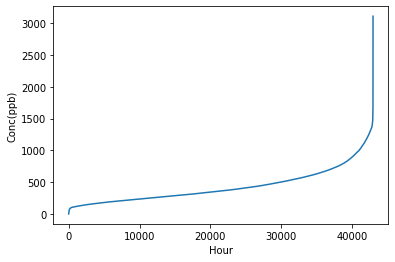

In [78]:
import matplotlib.pyplot as plt
Lab1=CO_Data['Lab1'].to_list()
Lab1=sorted(Lab1)
Ind=[i for i in range(len(Lab1))]
plt.plot(Ind,Lab1)
plt.xlabel('Hour')
plt.ylabel('Conc(ppb)')

In [79]:
A=[]
for i in range(len(WE)):
    if WE[i]>1000:
        A.append(WE[i])
print(len(WE))
print(len(A))
#percentage of data points having WE>100
len(A)/len(WE)*100  

60204
0


0.0

In [80]:
Lab1=CO_Data['Lab1'].to_list()
Ref=CO_Data['Ref'].to_list()
max(Lab1), max(Ref)

(3109.71610050969, 5177.003766666667)

In [82]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['WE']=WE
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref_CO']=data_co['Ref'].to_list()
Data_O3['Ref_NO2']=data_no2['Ref'].to_list()
Data_O3['Ref_SO2']=data_so2['Ref'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['WE']=WE
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('2min').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [83]:
O3_Data.describe()

Lab1          Temp            RH           Ref        Ref_CO  \
count  35561.000000  35561.000000  35561.000000  35561.000000  35561.000000   
mean      62.837704     15.901133     70.341112     18.330832    512.643293   
std       39.523439      6.734647     17.299333     15.069994    447.577497   
min        0.008904      1.036051     17.250176      0.000000      0.000000   
25%       38.438426     11.021987     61.135424      3.028125    229.170867   
50%       55.767366     14.482963     76.035667     16.539443    353.043050   
75%       78.714307     19.462848     83.563791     30.061667    621.520533   
max     1788.609900     40.955089     92.618500     63.968750   4846.398000   

            Ref_NO2       Ref_SO2            WE    Net Signal         Month  \
count  35561.000000  35561.000000  35561.000000  35561.000000  35561.000000   
mean      18.326934      1.437280    236.534977      8.663294      6.639380   
std       11.752946      0.626792      2.374957      4.129214      4.507248   
min        0.258700      0.002095    212.800870      0.000066      1.000000   
25%        8.760321      1.007926    235.904584      5.687500      2.000000   
50%       16.352270      1.363210    236.828095      8.849992      4.000000   
75%       25.763383      1.767591    237.656544     11.728625     11.000000   
max       76.031970      9.666636    247.672208     29.826617     12.000000   

        Day_of_week           Day          Hour  
count  35561.000000  35561.000000  35561.000000  
mean       3.041534     16.406766     11.492028  
std        2.016437      8.216234      7.293841  
min        0.000000      1.000000      0.000000  
25%        1.000000     10.000000      5.000000  
50%        3.000000     17.000000     11.000000  
75%        5.000000     23.000000     19.000000  
max        6.000000     31.000000     23.000000

In [84]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['WE']=WE
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref_CO']=data_co['Ref'].to_list()
Data_NO2['Ref_SO2']=data_so2['Ref'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['WE']=WE
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('2min').mean()
NO2_Data=NO2_Data.dropna()
NO2_Data_Scaled= (NO2_Data-NO2_Data.min())/(NO2_Data.max()-NO2_Data.min())
NO2_Data.head()

Lab1       Temp         RH        Ref     Ref_CO  \
Date                                                                           
2019-10-02 11:54:00   460.448301  26.378438  58.063437  15.230400  312.70720   
2019-10-02 12:10:00  1364.583446  25.500000  48.612609   6.665136  206.02900   
2019-10-02 12:14:00   224.159154  25.765087  48.441408   6.642805  170.30085   
2019-10-02 12:20:00    82.998996  26.120078  47.716553   2.844210  140.82115   
2019-10-02 15:44:00   566.301152  30.418466  50.153181  10.084125  247.17775   

                      Ref_SO2          WE  Net Signal  Month  Day_of_week  \
Date                                                                        
2019-10-02 11:54:00  1.634341  157.696562    7.850000   10.0          2.0   
2019-10-02 12:10:00  1.476681   87.497391   37.815652   10.0          2.0   
2019-10-02 12:14:00  1.482298  192.791738   12.275893   10.0          2.0   
2019-10-02 12:20:00  1.475415  211.529983   13.152720   10.0          2.0   
2019-10-02 15:44:00  1.094315  148.955200    9.323533   10.0          2.0   

                     Day  Hour     Ref_O3  
Date                                       
2019-10-02 11:54:00  2.0  11.0  46.094860  
2019-10-02 12:10:00  2.0  12.0  55.810810  
2019-10-02 12:14:00  2.0  12.0  57.907075  
2019-10-02 12:20:00  2.0  12.0  58.880540  
2019-10-02 15:44:00  2.0  15.0  40.068225

In [85]:
NO2_Data.describe()

Lab1          Temp            RH           Ref        Ref_CO  \
count  39695.000000  39695.000000  39695.000000  39695.000000  39695.000000   
mean      33.358962     16.625870     68.661033     18.710563    512.494382   
std       26.613150      6.944106     17.725528     12.704922    464.243703   
min        0.000451      1.036051     17.447843      0.258700      0.000000   
25%       17.218920     11.343457     56.844554      8.596393    225.603358   
50%       26.352521     15.148837     74.174168     16.355380    346.604367   
75%       41.534806     20.753162     82.908003     26.208765    608.052750   
max     1364.583446     40.756261     92.618500     99.250360   5177.003767   

            Ref_SO2            WE    Net Signal         Month   Day_of_week  \
count  39695.000000  39695.000000  39695.000000  39695.000000  39695.000000   
mean       1.459906    234.410083     24.969054      6.789092      3.005870   
std        0.989184      7.550890      5.285395      4.412420      2.014569   
min        0.000000     87.497391      0.051444      1.000000      0.000000   
25%        1.009353    232.822194     22.686753      3.000000      1.000000   
50%        1.374929    235.561250     25.013828     10.000000      3.000000   
75%        1.791105    238.474588     27.950499     11.000000      5.000000   
max      115.851947    266.058613     55.133797     12.000000      6.000000   

                Day          Hour        Ref_O3  
count  39695.000000  39695.000000  39695.000000  
mean      16.316161     12.100139     19.693334  
std        8.170946      7.122921     15.804149  
min        1.000000      0.000000      0.000000  
25%       10.000000      6.000000      3.428236  
50%       17.000000     13.000000     18.204720  
75%       23.000000     18.000000     31.990903  
max       31.000000     23.000000     63.968750

In [86]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['WE']=WE
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref_CO']=data_co['Ref'].to_list()
Data_O3['Ref_NO2']=data_no2['Ref'].to_list()
Data_O3['Ref_SO2']=data_so2['Ref'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['WE']=WE
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('5min').mean()
O3_Data=O3_Data.dropna()
O3_Data_Scaled= (O3_Data-O3_Data.min())/(O3_Data.max()-O3_Data.min())
O3_Data.head()

Lab1       Temp         RH        Ref     Ref_CO  \
Date                                                                           
2019-10-02 11:55:00   621.625704  26.378438  58.063437  46.094860  312.70720   
2019-10-02 12:10:00  1788.609900  25.500000  48.612609  55.810810  206.02900   
2019-10-02 12:15:00   287.254970  25.765087  48.441408  57.907075  170.30085   
2019-10-02 12:20:00    99.598353  26.120078  47.716553  58.880540  140.82115   
2019-10-07 10:50:00   105.723457  32.399528  37.143389  48.533490  157.33180   

                       Ref_NO2   Ref_SO2          WE  Net Signal  Month  \
Date                                                                      
2019-10-02 11:55:00  15.230400  1.634341  232.625625    3.605625   10.0   
2019-10-02 12:10:00   6.665136  1.476681  212.800870    3.528696   10.0   
2019-10-02 12:15:00   6.642805  1.482298  232.157341   17.781453   10.0   
2019-10-02 12:20:00   2.844210  1.475415  234.373042   20.285180   10.0   
2019-10-07 10:50:00   4.344894  2.095053  229.548607   11.862076   10.0   

                     Day_of_week  Day  Hour  
Date                                         
2019-10-02 11:55:00          2.0  2.0  11.0  
2019-10-02 12:10:00          2.0  2.0  12.0  
2019-10-02 12:15:00          2.0  2.0  12.0  
2019-10-02 12:20:00          2.0  2.0  12.0  
2019-10-07 10:50:00          0.0  7.0  10.0

In [87]:
O3_Data.describe()

Lab1          Temp            RH           Ref        Ref_CO  \
count  35561.000000  35561.000000  35561.000000  35561.000000  35561.000000   
mean      62.837704     15.901133     70.341112     18.330832    512.643293   
std       39.523439      6.734647     17.299333     15.069994    447.577497   
min        0.008904      1.036051     17.250176      0.000000      0.000000   
25%       38.438426     11.021987     61.135424      3.028125    229.170867   
50%       55.767366     14.482963     76.035667     16.539443    353.043050   
75%       78.714307     19.462848     83.563791     30.061667    621.520533   
max     1788.609900     40.955089     92.618500     63.968750   4846.398000   

            Ref_NO2       Ref_SO2            WE    Net Signal         Month  \
count  35561.000000  35561.000000  35561.000000  35561.000000  35561.000000   
mean      18.326934      1.437280    236.534977      8.663294      6.639380   
std       11.752946      0.626792      2.374957      4.129214      4.507248   
min        0.258700      0.002095    212.800870      0.000066      1.000000   
25%        8.760321      1.007926    235.904584      5.687500      2.000000   
50%       16.352270      1.363210    236.828095      8.849992      4.000000   
75%       25.763383      1.767591    237.656544     11.728625     11.000000   
max       76.031970      9.666636    247.672208     29.826617     12.000000   

        Day_of_week           Day          Hour  
count  35561.000000  35561.000000  35561.000000  
mean       3.041534     16.406766     11.492028  
std        2.016437      8.216234      7.293841  
min        0.000000      1.000000      0.000000  
25%        1.000000     10.000000      5.000000  
50%        3.000000     17.000000     11.000000  
75%        5.000000     23.000000     19.000000  
max        6.000000     31.000000     23.000000

In [88]:
#Ref=CO_Data['Ref'].to_list()
#CO_Data=CO_Data[CO_Data.Ref.between(np.mean(Ref)-0.7*np.std(Ref), np.mean(Ref)+0.7*np.std(Ref))]
#CO_Data.shape

In [89]:
from scipy import stats

# Outlier detection and removal

In [90]:
import numpy as np

import pandas as pd   
import seaborn as sns
from scipy import stats

((0, 18), (42944, 18))

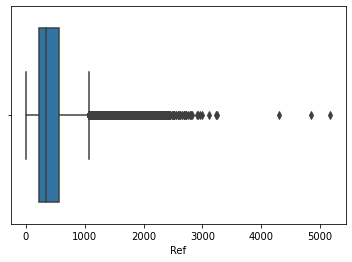

In [91]:
sns.boxplot(x=CO_Data['Ref'])
z=np.abs(stats.zscore(CO_Data))
CO_data=CO_Data[(z < 3).all(axis=1)]
CO_data.shape,CO_Data.shape

def MBE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    mbe=np.mean(true-pred)
    return mbe
def CRMSE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    crmse=np.sqrt(np.mean(((true-np.mean(true))-(pred-np.mean(pred)))**2))
    if np.std(pred)>np.std(true):
        crmse=crmse
    else:
        crmse=-crmse
    return crmse

In [92]:
def MBE(pred,true):
    true=np.array(true)
    pred=np.array(pred)
    mbe=np.mean(pred-true)
    return mbe
def CRMSE(pred,true):
    true=np.array(true)
    pred=np.array(pred)
    R=round(np.corrcoef(true, pred)[0, 1],2)
    #crmse=np.sqrt(np.mean(((true-np.mean(true))-(pred-np.mean(pred)))**2))
    crmse=np.sqrt((np.std(true))**2+(np.std(pred))**2-(2*R*np.std(true)*np.std(pred)))
    if np.std(pred)>np.std(true):
        crmse=crmse
    else:
        crmse=-crmse
    return crmse

In [93]:
def REF2(pred,y_test,alpha):
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(4+0.0049*ref**2))
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(-2*Beta_1**2+2*Beta_1-1)*(4+0.0049*1000**2)+
                      (Beta_0+(Beta_1-1)*1000)**2))/(beta_0+beta_1*1000))*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(4+0.0049*30000**2)+
                      #(Beta_0+(Beta_1-1)*30000)**2))/(beta_0+beta_1*30000))*100
    return u_cal  

In [94]:
#Ref=CO_Data['Ref'].to_list()
#CO_Data=CO_Data[CO_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#NO2_Data.shape

In [95]:
import numpy as np
from scipy.stats import chi2
p = np.array([ 0.9])
df=np.array(range(1,10000))
chi = [0]+list(chi2.isf(p, df))

In [96]:
import scipy.stats

#find T critical value
scipy.stats.t.ppf(q=.95,df=100)

1.66023432606575

In [97]:
def precision(pred,true):
    pred=list(pred)
    true=list(true)
    #for i in range(len(true)):
        #if true[i]==0:
            #true.pop(i)
            #pred.pop(i)
    pred=np.array(pred)
    true=np.array(true)
    #d=((pred-true)/((true+pred)/2))*100
    d=((pred-true)/np.mean(true))*100
    n=len(pred)
    A=np.sqrt((n-1)/chi[n-1])
    cv=np.sqrt(((n*sum(abs(d)**2)-(sum(abs(d)))**2)/(2*n*(n-1))))*A
    return cv

In [98]:
def bias(pred,true):
    pred=list(pred)
    true=list(true)
    #for i in range(len(true)):
        #if true[i]==0:
            #true.pop(i)
            #pred.pop(i)
    pred=np.array(pred)
    true=np.array(true)
    #d=((pred-true)/((true+pred)/2))*100
    d=((pred-true)/np.mean(true))*100
    n=len(pred)
    AB=sum(abs(d))/n
    #AS=np.sqrt(((n*sum(abs(d)**2)-(sum(abs(d)))**2)/(n*(n-1))))
    AS=np.sqrt(sum((d-AB)**2)/(n-1))
    t=scipy.stats.t.ppf(q=.95,df=n-1)
    bias=AB+(t*AS/np.sqrt(n))
    return bias

## Model 1: Linear Regression

In [99]:
df1=[x for _, x in CO_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]

data_Oct=data_oct.resample('15min').mean()
data_Oct=data_Oct.dropna()
data_Oct1=data_Oct[:int(0.8*data_Oct.shape[0])]
data_Oct2=data_Oct[int(0.8*data_Oct.shape[0]):]
data_Nov=data_nov.resample('15min').mean()
data_Nov=data_Nov.dropna()
data_Nov1=data_Nov[:int(0.8*data_Nov.shape[0])]
data_Nov2=data_Nov[int(0.8*data_Nov.shape[0]):]
data_Dec=data_dec.resample('15min').mean()
data_Dec=data_Dec.dropna()
data_Dec1=data_Dec[:int(0.8*data_Dec.shape[0])]
data_Dec2=data_Dec[int(0.8*data_Dec.shape[0]):]
data_Jan=data_jan.resample('15min').mean()
data_Jan=data_Jan.dropna()
data_Jan1=data_Jan[:int(0.8*data_Jan.shape[0])]
data_Jan2=data_Jan[int(0.8*data_Jan.shape[0]):]
data_Feb=data_feb.resample('15min').mean()
data_Feb=data_Feb.dropna()
data_Feb1=data_Feb[:int(0.8*data_Feb.shape[0])]
data_Feb2=data_Feb[int(0.8*data_Feb.shape[0]):]
data_Mar=data_mar.resample('15min').mean()
data_Mar=data_Mar.dropna()
data_Mar1=data_Mar[:int(0.8*data_Mar.shape[0])]
data_Mar2=data_Mar[int(0.8*data_Mar.shape[0]):]
frame1=[data_Oct1,data_Nov1,data_Dec1,data_Jan1,data_Feb1,data_Mar1]
frame2=[data_Oct2,data_Nov2,data_Dec2,data_Jan2,data_Feb2,data_Mar2]
CO_data1=pd.concat(frame1)
CO_data2=pd.concat(frame2)
CO_data=pd.concat([CO_data1,CO_data2])

In [100]:
data_Mar.tail()

Lab1       Temp         RH        Ref   Ref_NO2  \
Date                                                                         
2020-03-31 22:45:00  217.744604  15.644699  76.170579   3.755517  6.461742   
2020-03-31 23:00:00  211.353846  15.144294  77.547304  13.092103  6.307313   
2020-03-31 23:15:00  209.883002  14.770140  78.943634   1.202529  7.598475   
2020-03-31 23:30:00  215.431230  14.571840  79.657904  20.394901  7.871155   
2020-03-31 23:45:00  203.548814  14.375878  80.543816  15.372668  9.593848   

                        Ref_O3   Ref_SO2          WE  Net Signal  Month  \
Date                                                                      
2020-03-31 22:45:00  24.788333  2.300747  434.383329   86.291293    3.0   
2020-03-31 23:00:00  21.056250  2.042289  430.484389   83.324494    3.0   
2020-03-31 23:15:00  21.310833  2.194998  430.795372   83.564421    3.0   
2020-03-31 23:30:00  18.509861  1.984717  433.584683   86.547775    3.0   
2020-03-31 23:45:00  16.408232  1.864196  428.805574   81.492021    3.0   

                     Day_of_week   Day  Hour      Lab1_R     Temp_R  \
Date                                                                  
2020-03-31 22:45:00          1.0  31.0  22.0  153.745971  23.483021   
2020-03-31 23:00:00          1.0  31.0  23.0  161.106101  22.922013   
2020-03-31 23:15:00          1.0  31.0  23.0  169.846955  22.335100   
2020-03-31 23:30:00          1.0  31.0  23.0  179.880570  21.108218   
2020-03-31 23:45:00          1.0  31.0  23.0  193.601856  19.071907   

                          RH_R       Ref_R  Net Signal_R  
Date                                                      
2020-03-31 22:45:00  51.874632  198.421986     51.389973  
2020-03-31 23:00:00  53.719610  186.327468     54.884065  
2020-03-31 23:15:00  55.693585  173.472940     58.705134  
2020-03-31 23:30:00  59.630409  147.988409     64.662953  
2020-03-31 23:45:00  65.964728  105.535280     72.496518

In [225]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_data[['Net Signal','Ref_NO2','Ref_O3','Ref_SO2','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_data['Ref']
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
mask = yhat != -3
X, y = X[mask], y[mask]



X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.20,random_state=1,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

In [229]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 9)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
explained_variance 
pev=np.round((explained_variance /sum(explained_variance ))*100,2)
pev

array([9.639e+01, 3.200e+00, 2.000e-01, 1.000e-01, 5.000e-02, 2.000e-02,
       2.000e-02, 1.000e-02, 0.000e+00])

X1=X[:int(0.4*(X.shape[0]))]
X2=X[int(0.6*(X.shape[0])):]
X_train=X[int(0.2*(X.shape[0])):]
X_test=X[:int(0.2*(X.shape[0]))]

y_train=y[int(0.2*(X.shape[0])):]
y_test=y[:int(0.2*(X.shape[0]))]

In [102]:
int(0.4*(X.shape[0]))

5448

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler()
pca = PCA(n_components = 4)
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_
explained_variance 

In [103]:
X_train.shape

(10896, 10)

In [104]:
#X_train, X_test, y_train, y_test=X[:3145],X[3145:],y[:3145],y[3145:]

In [105]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
lab1=X_test['Lab1'].to_list()
model=np.polyfit(lab1,y_test,1)
Lab1=model[0]*np.array(lab1)+model[1]
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_CO=sMAPE_lr
RMSE_lr_CO=round(RMSE_lr/np.mean(np.array(y)),2)
Pearson_lr_CO=Pearson_lr
sMAPE_lab_CO=sMAPE_lab
RMSE_lab_CO=round(RMSE_lab/np.mean(np.array(y)),2)
Pearson_lab_CO=Pearson_lab
R2_lr_CO=round(sm.r2_score(y_test,pred), 2)
R2_lab_CO=round(sm.r2_score(y_test,Lab1), 2)
RMSE_Lr_CO=RMSE_lr
RMSE_Lab_CO=RMSE_lab
A=len(y_test)-200
D=max(y_test[A:])-0.2*max(y_test[A:])
C=max(y_test[A:])-0.1*max(y_test[A:])
B=120
Pearson_lr,RMSE_Lr_CO


b_LAB_CO=np.round(bias( Lab1,y_test))
p_LAB_CO=np.round(precision( Lab1,y_test))
b_LR_CO=np.round(bias(pred,y_test))
p_LR_CO=np.round(precision(pred,y_test))
b_LAB_CO,p_LAB_CO,b_LR_CO,p_LR_CO,

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(38.0, 26.0, 21.0, 17.0)

In [106]:
Pearson_lr,RMSE_Lr_CO

(0.93, 153.7)

m0, b0 = np.polyfit(np.array(lab1),np.array(y_test), 1)
Lab=b0+m0*np.array(lab1)
R2_lab_CO=round(sm.r2_score(y_test,Lab), 2)
R2_lab_CO

fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,201)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.2)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='#513e00',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-20, C, r'$R^{2}(LR)=$'+str(R2_lr_CO), fontsize = 14, color='#513e00')
#plt.text(B-20, D, r'$R^{2}(Lab)=$' +str(R2_lab_CO), fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [107]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_lr=pred
MBE_LR_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_CO=CRMSE(pred,y_test)/np.std(y_test)
MBE_LAB_CO=MBE(lab1,y_test)/np.std(y_test)
CRMSE_LAB_CO=CRMSE(lab1,y_test)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 100.9
Mean squared error(MSE) = 23627.01
Median absolute error = 65.43
Explain variance score = 0.86
R2 score = 0.86


In [108]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# MPC

# Constant u_r

In [109]:
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_CO_LR=A/(2*u_r)
MPC_NMB_CO_LR=(2*u_r)/np.mean(y_test)
MPC_NMSD_CO_LR=(2*u_r)/np.std(y_test)
MPC_R_CO_LR=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)

RMSE_CO_LR=MPC_RMSE_CO_LR
NMB_CO_LR=NMB/MPC_NMB_CO_LR
NMSD_CO_LR=NMSD/MPC_NMSD_CO_LR
R_CO_LR=MPC_R_CO_LR/R
RMSE_CO_LR,NMB_CO_LR,NMSD_CO_LR,R_CO_LR
R_LR=R
U_d_LR=u_r/np.std(y_test)

fig= plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='teal',marker="$\\bigoplus$",s=10)
#plt.scatter(np.array(y_test),np.array(pred),color='#104E8B',marker="$\\bigoplus$",s=20, alpha=0.9)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
plt.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1)
plt.plot(np.array(y_test),1.5*np.array(pred),c ="black",linewidth=1)
plt.plot(np.array(y_test),0.5*np.array(pred),c ="black",linewidth=1)
y1=0.5*np.array(y_test)
y2=1.5*np.array(y_test)
y3=0.75*np.array(y_test)
y4=1.25*np.array(y_test)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
#plt.xlabel('Reference PM2.5'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=20)
#plt.ylabel('Calibrated'+' PM2.5'.translate(SUB) +  ' (µg/m3)'.translate(SUP),fontsize=20)
#plt.legend(['1:1','N3','RF'
            #], loc = 2, bbox_to_anchor = (0,1),fontsize=12)
#plt.title('CO Sensor',fontsize=18 )
#A=[Pearson_2]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show
plt.xlim(0, 120)
plt.ylim(0, 120)
#plt.xticks(np.arange(0,2.9, step=1))
plt.xticks(np.arange(0,121, step=30))
plt.yticks(np.arange(0,121, step=30))
plt.show
#textstr = r'$r=%.2f$' % (Pearson_2,)
#textstr = '\n'.join(('RF',r'$r=%.2f$' % (A[0], ) ))

#props = dict(boxstyle='round', facecolor='white', alpha=1)

#place a text box in upper left in axes coords
#ax.text(0.01, 0.98, textstr, transform=ax.transAxes, fontsize=22,
       # verticalalignment='top')

plt.setp(ax.spines.values(), linewidth=2)
plt.savefig("fig10a.pdf",format="pdf", bbox_inches="tight", dpi=1000)
#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
ax.fill_between(np.array(pred), y1, y2, color='blue', alpha=0.2)
ax.fill_between(np.array(pred), y3, y4, color='blue', alpha=0.15)
plt.show()

import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
R=np.array([i for i in np.arange(0,1,0.01)])
x=np.sqrt((1-R)/2)
x2=np.sqrt((1-R))
plt.plot(x,R, color='black', linewidth=1)
plt.plot(x2,R, color='black', linewidth=1)
ax.set_ylim(bottom=0)
ax.set_ylim(top=1.02)
ax.set_xlim(left=0.1)
ax.set_xlim(right=0.708)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('U/'+r'$σ_{ref}$',fontsize=18)
plt.ylabel('R',fontsize=18)
ax.fill_between(x, R, 1.3, color='blue', alpha=.2)
ax.fill_between(x2, R, 1.3, color='blue', alpha=.16)
plt.text(U_d_LR,R_LR , '•', rotation=90, va='center',fontsize = 50, color='#426eff')
plt.show()

## Model 2 :  Support Vector Regression (SVR)

In [110]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'linear', C=1,epsilon=1)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
for i in range(len(Pred)):
    if pred[i]<0:
        pred[i]=np.mean(np.array(pred))
pred_svr=pred

In [111]:
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)

Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_CO=sMAPE_lr
RMSE_svr_CO=round(RMSE_lr/np.mean(np.array(y)),2)
Pearson_svr_CO=Pearson_lr
R2_svr_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_CO=RMSE_lr

b_SVR_CO=np.round(bias( pred,y_test))
p_SVR_CO=np.round(precision(pred,y_test))
b_SVR_CO,p_SVR_CO

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(21.0, 17.0)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'Lab-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-20, C,r'$R^{2}(SVR)=$'+str(R2_svr_CO) , fontsize = 14, color='brown')
#plt.text(B-20, D,r'$R^{2}(Lab)=$'+str(R2_lab_CO) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [112]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_svr=pred
MBE_SVR_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_CO=CRMSE(pred,y_test)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 97.25
Mean squared error(MSE) = 23578.0
Median absolute error = 58.49
Explain variance score = 0.86
R2 score = 0.86


In [113]:
slope, intercept, r, p, std_err = stats.linregress(pred, y_test)
slope, intercept, r, p, std_err

(1.0312856991029777,
 -10.81301102522707,
 0.9270026446666494,
 0.0,
 0.007995928831162308)

# MPC

In [114]:
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_CO_SVR=A/(2*u_r)
MPC_NMB_CO_SVR=(2*u_r)/np.mean(y_test)
MPC_NMSD_CO_SVR=(2*u_r)/np.std(y_test)
MPC_R_CO_SVR=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)

RMSE_CO_SVR=MPC_RMSE_CO_SVR
NMB_CO_SVR=NMB/MPC_NMB_CO_SVR
NMSD_CO_SVR=NMSD/MPC_NMSD_CO_SVR
R_CO_SVR=MPC_R_CO_SVR/R
RMSE_CO_SVR,NMB_CO_SVR,NMSD_CO_SVR,R_CO_SVR

(0.7922257688636183,
 0.024302183065227023,
 0.21289582011982405,
 0.9539795753113408)

## Model 3 : Random Forest

In [115]:
def REF(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    for i in range(len(ref)):
        if ref[i]==0:
            ref[i]=np.mean(ref)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=np.maximum(prec,0.001*ref)
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    #P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P2=-(u**2)
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    U1=[]
    Ref=[]
    for i in range(len(P)):
        if P[i]>=0:
            U1.append(P[i])
            Ref.append(ref[i])
    #for i in range(len(P)):
        #if P[i]<0:
           # P[i]=np.mean(P1)
    u_cal=(2*np.sqrt(np.array(U1))/np.array(Ref))*100
    U_cal=[]
    for i in range(len(Ref)):
        if Ref[i]==max(Ref):
            U_cal.append(u_cal[i])
    return U_cal[0]

In [116]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor =RandomForestRegressor(max_features=0.5687641759232935, max_leaf_nodes=1450,
                      n_estimators=313, n_jobs=-1)



  
# fit the regressor with x and y data
regressor=regressor.fit(X_train, y_train)  

RMSE=[]
R=[]
R2=[]
U=[]
for i in range(0,51):
    X=NO2_data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]
    X=np.array(X)
    y=NO2_data['Ref']
    lof = LocalOutlierFactor()
    yhat = lof.fit_predict(X)
    mask = yhat != -3
    X, y = X[mask], y[mask]
    X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.20,random_state=1,
                                                       shuffle=True)
    X_test=(1+0.02*i)*np.array(X_test)
    regressor=regressor.fit(X_train, y_train)
    pred = regressor.predict(X_test)
    rmse=round(round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)/np.mean(np.array(y)),2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    r2=round(sm.r2_score(y_test, pred), 2)
    u=round(REF(pred,y_test,1.4),2)
    RMSE.append(rmse)
    R.append(r)
    R2.append(r2)
    U.append(u)

In [117]:
features_CO=regressor.feature_importances_
pred = regressor.predict(X_test)
pred_rf_co=pred
for i in range(len(pred)):
    if pred[i]<0:
        pred[i]=np.mean(pred)
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_CO=sMAPE_lr
RMSE_rf_CO=round(RMSE_lr/np.mean(np.array(y)),2)
Pearson_rf_CO=Pearson_lr
R2_rf_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_CO=RMSE_lr
R2_rf_CO



b_RF_CO=np.round(bias(pred,y_test))
p_RF_CO=np.round(precision(pred,y_test))
b_RF_CO,p_RF_CO

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(15.0, 14.0)

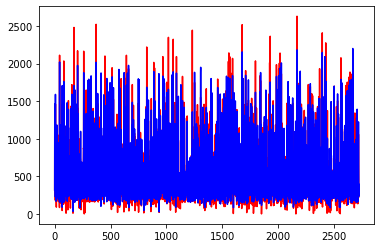

In [118]:
ind=[i for i in range(len(pred))]
plt.plot(ind,y_test, color='red')
plt.plot(ind,pred, color='blue')

In [119]:
np.mean(C),np.max(C)

(1868.9930249999998, 1868.9930249999998)

(2725, 1986)

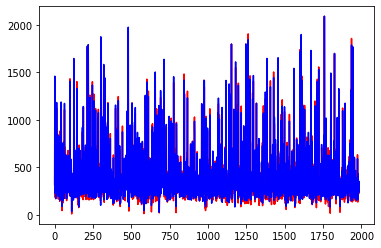

In [120]:
A=np.array(y_test)
B=np.array(pred)
C=abs(A-B)


A1=[]
B1=[]
for i in range(len(C)):
    if C[i]<=80:
        A1.append(A[i])
        B1.append(B[i])
ind2=[i for i in range(len(B1))]
plt.plot(ind2,A1, color='red')
plt.plot(ind2,B1, color='blue')

len(C),len(A1)

In [121]:
Pearson_lr1=round(np.corrcoef(A, B)[0, 1],2)
Pearson_lr1
Pearson_lr2=round(np.corrcoef(A1, B1)[0, 1],2)
Pearson_lr1,Pearson_lr2

(0.96, 0.99)

In [122]:
features_CO

array([0.5028685 , 0.06995788, 0.12640015, 0.0460622 , 0.17954677,
       0.02435194, 0.01924292, 0.00988017, 0.01000751, 0.01168196])

In [123]:
round(np.corrcoef(y_test, pred)[0, 1],2)

0.96

In [124]:
u=0.15
u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
RMSE_U=A/(2*u_r)
RMSE_U

0.6076926270181217

In [125]:
pred_rf=pred
MBE_RF_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_CO=CRMSE(pred,y_test)/np.std(y_test)

X_train=(X_train-X_train.min())/(X_train.max()-X_train.min())

regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train.drop(['Lab1'], axis=1), y_train) 
perc=(features_CO/sum(features_CO))*100
perc

In [235]:
X=CO_data[['Ref','Ref_NO2','Ref_O3','Ref_SO2','Lab1',
           'Temp','RH','Month','Day_of_week','Hour']]
y=CO_data['Net Signal']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2,shuffle=True)
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(max_features=0.5067135141693354, max_leaf_nodes=744,
                      n_estimators=236, n_jobs=-1)
  
# fit the regressor with x and y data
regressor=regressor.fit(X.drop(['Lab1'], axis=1), y)


from sklearn.inspection import permutation_importance
result = permutation_importance(regressor, X.drop(['Lab1'], axis=1), y, n_repeats=20,
                                random_state=0)
features_CO=result.importances_mean
features_CO

KeyboardInterrupt: 

In [127]:
perc_CO=np.round((features_CO/sum(features_CO))*100)
perc_CO

array([56., 10., 21.,  2.,  2.,  2.,  2.,  1.,  4.])

In [231]:
!pip install key_driver_analysis 
import pandas as pd
import key_driver_analysis as kda


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [243]:
X=CO_data[['WE','Ref','Ref_NO2','Ref_O3','Ref_SO2','Temp','RH',
           'Month','Day_of_week','Hour']]
target = 'WE'
features=set(X.columns.tolist()).difference(set([target]))
rw_df = kda.relative_importance(X,
                                target=target,
                                features=features,
                                verbose=True)

print(rw_df)

(13621, 10)
Dataset size before dropping nulls --> (13621, 10)
Dataset size after dropping nulls --> (13621, 10)
r2 score --> 0.858222220504517
       feature  raw_rel_imp  norm_rel_imp
1          Ref     0.420240     48.966285
6      Ref_NO2     0.211648     24.661258
5       Ref_O3     0.122625     14.288232
3         Hour     0.031396      3.658253
0           RH     0.028390      3.307946
4         Temp     0.025320      2.950252
8      Ref_SO2     0.011623      1.354264
2        Month     0.006413      0.747197
7  Day_of_week     0.000569      0.066314


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/key_driver_analysis/kda.py:21: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  _df[_features]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/key_driver_analysis/kda.py:22: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  .columns[_df[_features].isna().any()]


In [128]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
model = XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5325799047395141, colsample_bynode=1,
             colsample_bytree=1.0, gamma=0, gpu_id=-1, grow_policy='lossguide',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.09162995757195729, max_delta_step=0, max_depth=0,
             max_leaves=10, min_child_weight=1.4762838570024215,
                     monotone_constraints='()', n_estimators=970, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.09065596443403534,
             reg_lambda=0.0009765625, scale_pos_weight=1,
             subsample=0.7601526809022708, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)
model.fit(X.drop(['Lab1'], axis=1), y)
result = permutation_importance(model, X.drop(['Lab1'], axis=1), y, 
                                n_repeats=20,random_state=0)
features_CO_XGB=result.importances_mean
features_CO_XGB

array([0.48276824, 0.07506991, 0.22953817, 0.02336234, 0.03243473,
       0.02573274, 0.03569124, 0.01101952, 0.03920437])

In [129]:
perc_CO_XGB=np.round((features_CO_XGB/sum(features_CO_XGB))*100)
perc_CO_XGB

array([51.,  8., 24.,  2.,  3.,  3.,  4.,  1.,  4.])

In [130]:
X=CO_data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_data['Ref']
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
mask = yhat != -3
X, y = X[mask], y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=2,shuffle=True)


fig= plt.figure(figsize=(30,4))

ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='black',linewidth=3)
plt.plot(index,pred[A:], color='red',linewidth=3)
plt.plot(index,lab1[A:], color='blue',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.79,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
plt.text(B-20, C, r'$R^{2}(RF)=$'+str(R2_rf_CO), fontsize = 14, color='red')
plt.text(B-20, D, r'$R^{2}(Lab)=$'+str(R2_lab_CO), fontsize = 14, color='blue')
plt.text(B-72, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='red')
plt.text(B-72, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='blue')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
#plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [131]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))


Regressor model performance:
Mean absolute error(MAE) = 373.17
Mean squared error(MSE) = 298267.67
Median absolute error = 218.02
Explain variance score = -0.94
R2 score = -0.94


In [132]:
abs(CRMSE_RF_CO)*np.std(y_test)

110.15762457208372

In [133]:
CR=np.sqrt(np.std(pred)**2+np.std(y_test)**2-2*np.std(pred)*np.std(y_test)*Pearson_lr)
CR

110.04488068115282

In [134]:
(RMSE_rf_CO*np.mean(np.array(y_test))/np.std(y_test))**2

0.0923940746558762

# Hyper parameter tuning

In [135]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [136]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
#n_iter = 100, cv = 3, 
#                               verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)
#rf_random.best_params_
#{'n_estimators': 400,
 #'min_samples_split': 2,
 #'min_samples_leaf': 1,
 #'max_features': 'sqrt',
 #'max_depth': None,
 #'bootstrap': False}

# DQO

In [137]:
def relative_mean_absolute_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))
def sMAE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    smae=np.mean(abs(true-pred)/((abs(true)+abs(pred))/2))
    return smae

# Creating 5-folds

In [138]:
from sklearn.model_selection import KFold
kf5 = KFold(n_splits=5, shuffle=False)
X_Train=[]
X_Test=[]

for i,j in kf5.split(X_train):
    X_Train.append(X_train.iloc[i])
    X_Test.append(X_train.iloc[j]) 
    
y_Train=[]
y_Test=[]

for k,l in kf5.split(y_train):
    y_Train.append(y_train.iloc[k])
    y_Test.append(y_train.iloc[l]) 

Day1=[0.25*i for i in range(1,7)]
Day2=[2*i for i in range(1,51)]
Rmse1_rf1=[]
RMSE1_rf1=[]
for i in range(1,7):
    regressor.fit(X_train[:6*i], y_train[:6*i])
    pred=regressor.predict(X_test)
    rmse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_test, pred),3)
    Rmse1_rf1.append(mse)
    RMSE1_rf1.append(rmse)    


Rmse1=[]
A=[]
for i in range(1,60):
    regressor.fit(X_Train[0][:48*i], y_Train[0][:48*i])
    pred=regressor.predict(X_Test[0])
    mse=round(np.sqrt(sm.mean_squared_error(y_Test[0], pred))/np.mean(y_train),2)
    Rmse1.append(mse)


Rmse2=[]
A=[]
for i in range(1,60):
    regressor.fit(X_Train[1][:48*i], y_Train[1][:48*i])
    pred=regressor.predict(X_Test[1])
    mse=round(np.sqrt(sm.mean_squared_error(y_Test[1], pred))/np.mean(y_train),2)
    Rmse2.append(mse)

Rmse3=[]
A=[]
for i in range(1,60):
    regressor.fit(X_Train[2][:48*i], y_Train[2][:48*i])
    pred=regressor.predict(X_Test[2])
    mse=round(np.sqrt(sm.mean_squared_error(y_Test[2], pred))/np.mean(y_train),2)
    Rmse3.append(mse)


Rmse4=[]
A=[]
for i in range(1,60):
    regressor.fit(X_Train[3][:48*i], y_Train[3][:48*i])
    pred=regressor.predict(X_Test[3])
    mse=round(np.sqrt(sm.mean_squared_error(y_Test[3], pred))/np.mean(y_train),2)
    Rmse4.append(mse)


Rmse5=[]
A=[]
for i in range(1,60):
    regressor.fit(X_Train[4][:48*i], y_Train[4][:48*i])
    pred=regressor.predict(X_Test[4])
    mse=round(np.sqrt(sm.mean_squared_error(y_Test[4], pred))/np.mean(y_train),2)
    Rmse5.append(mse)


Day=[2*i for i in range(1,60)]

A=[i for i in range(1000)]
B=[i for i in range(1500)]
C=[i for i in range(2000)]
D=[i for i in range(2500)]
E=[i for i in range(3000)]
from random import shuffle
A1=random.sample(A, len(A))
B1=random.sample(B, len(B))
C1=random.sample(C, len(C))
D1=random.sample(D, len(D))
E1=random.sample(E, len(E))


X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2,shuffle=False)

X_Data=X_train
y_Data=y_train
X_train1=X_Data[:500]
X_train2=X_Data[:1000]
X_train3=X_Data[:1300]
X_train4=X_Data[:1700]
X_train5=X_Data[:2000]
X_train6=X_Data[:2300]

y_train1=y_Data[:500]
y_train2=y_Data[:1000]
y_train3=y_Data[:1300]
y_train4=y_Data[:1700]
y_train5=y_Data[:2000]
y_train6=y_Data[:2300]

In [139]:
#X_train2=X_train2[A1]
#X_train3=[X_train3[i] for i in B1]
#X_train4=[X_train4[i] for i in C1]
#X_train5=[X_train5[i] for i in D1]
#X_train6=[X_train6[i] for i in E1]

er1=[]
for i in range(1,19):
    model1=regressor.fit(X_train1[:int(0.05*i*X_train1.shape[0])].drop(['Lab1'], axis=1), 
                         y_train1[:int(0.05*i*X_train1.shape[0])])
    pred1=model1.predict(X_train1[int(0.05*i*X_train1.shape[0]):].drop(['Lab1'], axis=1))
    rmse1=round(np.corrcoef(y_train1[int(0.05*i*X_train1.shape[0]):], pred1)[0, 1],2)
    er1.append(rmse1)

er2=[]
er3=[]
er4=[]
for i in range(1,19):
    model2=regressor.fit(X_train2[:int(0.05*i*X_train2.shape[0])].drop(['Lab1'], axis=1), 
                         y_train2[:int(0.05*i*X_train2.shape[0])])
    pred2=model2.predict(X_train2[int(0.05*i*X_train2.shape[0]):].drop(['Lab1'], axis=1))
    rmse2=round(np.corrcoef(y_train2[int(0.05*i*X_train2.shape[0]):], pred2)[0, 1],2)
    er2.append(rmse2)
    

er2

for i in range(1,19):
    model3=regressor.fit(X_train3[:int(0.05*i*X_train3.shape[0])].drop(['Lab1'], axis=1), 
                         y_train3[:int(0.05*i*X_train3.shape[0])])
    pred3=model3.predict(X_train3[int(0.05*i*X_train3.shape[0]):].drop(['Lab1'], axis=1))
    rmse3=round(np.corrcoef(y_train3[int(0.05*i*X_train3.shape[0]):], pred3)[0, 1],2)
    er3.append(rmse3)
    

er3

for i in range(1,19):
    model4=regressor.fit(X_train4[:int(0.05*i*X_train4.shape[0])].drop(['Lab1'], axis=1), 
                         y_train4[:int(0.05*i*X_train4.shape[0])])
    pred4=model3.predict(X_train4[int(0.05*i*X_train4.shape[0]):].drop(['Lab1'], axis=1))
    rmse4=round(np.corrcoef(y_train4[int(0.05*i*X_train4.shape[0]):], pred4)[0, 1],2)
    er4.append(rmse4)
    

er5=[]
for i in range(1,19):
    model5=regressor.fit(X_train5[:int(0.05*i*X_train5.shape[0])].drop(['Lab1'], axis=1), 
                         y_train5[:int(0.05*i*X_train5.shape[0])])
    pred5=model3.predict(X_train5[int(0.05*i*X_train5.shape[0]):].drop(['Lab1'], axis=1))
    rmse5=round(np.corrcoef(y_train5[int(0.05*i*X_train5.shape[0]):], pred5)[0, 1],2)
    er5.append(rmse5)
    

er6=[]
for i in range(1,19):
    model6=regressor.fit(X_train6[:int(0.05*i*X_train6.shape[0])].drop(['Lab1'], axis=1), 
                         y_train6[:int(0.05*i*X_train6.shape[0])])
    pred6=model3.predict(X_train6[int(0.05*i*X_train6.shape[0]):].drop(['Lab1'], axis=1))
    rmse6=round(np.corrcoef(y_train6[int(0.05*i*X_train6.shape[0]):], pred6)[0, 1],2)
    er6.append(rmse6)
    

from scipy.signal import savgol_filter
er21= savgol_filter(er2, 5, 2)
er31= savgol_filter(er3, 5, 2)
er41= savgol_filter(er4, 5, 2)
er51= savgol_filter(er5, 5, 2)
er61= savgol_filter(er6, 5, 2)

perc=[5*i for i in range(1,19)]
#plt.plot(perc, er1, color='#0000FF',linewidth=2.5)
plt.plot(perc, er2, color='#00FFFF',linewidth=2.5)
plt.plot(perc, er31, color='#E3CF57',linewidth=2.5)
plt.plot(perc, er41, color='#00008B',linewidth=2.5)
plt.plot(perc, er51, color='#CD3333',linewidth=2.5)
plt.plot(perc, er61, color='#9932CC',linewidth=2.5)
plt.ylabel('Pearson correlation (r)', fontsize=18)
plt.xlabel('Training data (%)', fontsize=18)
plt.xlim([0, 80])
plt.ylim([0.7, 0.98])
#plt.legend(['1000','1500','2000','2500','3000'],fontsize=12,loc = 2, bbox_to_anchor = (0.75,0.5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.title(r"$CO$", fontsize=14)

fig= plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.4)

#plt.plot(CO_Day,CO_Rmse1_rf, color='orange',linewidth=3,marker="*",markersize=0,alpha=0.7)
plt.plot(Day,Rmse1, color='orange',linewidth=3)#,s=100, marker="^")
#plt.plot(NO2_Day,NO2_Rmse1_rf, color='teal',linewidth=3,marker="*",markersize=0,alpha=0.7)
plt.plot(Day,Rmse2, color='teal',linewidth=3)#,s=100, marker="^")
#plt.plot(SO2_Day,SO2_Rmse1_rf, color='rebeccapurple',linewidth=2,marker=".",markersize=0)
plt.plot(Day,Rmse3, color='rebeccapurple',linewidth=3)#,s=100, marker="^")
#plt.plot(O3_Day,O3_Rmse1_rf, color='firebrick',linewidth=3,marker=".",markersize=0,alpha=0.7)
plt.plot(Day,Rmse4,color='firebrick',linewidth=3)#,s=100, marker="^")
plt.plot(Day,Rmse5,color='darkgoldenrod',linewidth=3)#,s=100, marker="^")
#plt.axhline(y = 0.1, color = 'blue',label='RC', linestyle = ':',linewidth=2 )
#plt.axhline(y = 0.25, color ='purple',label='SGS' , linestyle = ':',linewidth=2)
#plt.axhline(y = 0.3, color ='darkolivegreen',label='IS/IM' , linestyle = ':',linewidth=2)
#plt.axhline(y = 0.5, color ='darkgoldenrod' ,label='HA/SP', linestyle = ':',linewidth=2)
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
#specify order of items in legend
order = [4,5,6,0,1,2,3]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=12,ncol=7, 
           #bbox_to_anchor = (0.87,1.13)) 
plt.legend(['Fold1','Fold2','Fold3','Fold4','Fold5'],ncol=7,bbox_to_anchor = (0.99,1.10),  fontsize=9)

plt.xlabel('Days of Training',fontsize=20)
plt.ylabel('NRMSE',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0,121 , step=20))
plt.yticks(np.arange(0.2,0.41, step=0.1)) 
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.spines["top"].set_linewidth(1)
ax.spines["right"].set_linewidth(1)
#plt.legend( fontsize=16)
#plt.title('CO Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.15)

L=[[Rmse1[i],Rmse2[i],Rmse3[i],Rmse4[i],Rmse5[i]] for i in range(len(Rmse1))]
Av6=[]
for i in range(len(L)):
    Av6.append(np.mean(L[i]))

fig= plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.4)

#plt.plot(CO_Day,CO_Rmse1_rf, color='orange',linewidth=3,marker="*",markersize=0,alpha=0.7)
plt.plot(Day,Av5, color='orange',linewidth=3)#,s=100, marker="^")
#plt.plot(NO2_Day,NO2_Rmse1_rf, color='teal',linewidth=3,marker="*",markersize=0,alpha=0.7)
plt.plot(Day,Av6, color='teal',linewidth=3)#,s=100, marker="^")
#plt.plot(SO2_Day,SO2_Rmse1_rf, color='rebeccapurple',linewidth=2,marker=".",markersize=0)
#plt.plot(Day,Rmse3, color='rebeccapurple',linewidth=3)#,s=100, marker="^")
#plt.plot(O3_Day,O3_Rmse1_rf, color='firebrick',linewidth=3,marker=".",markersize=0,alpha=0.7)
#plt.plot(Day,Rmse4,color='firebrick',linewidth=3)#,s=100, marker="^")
#plt.plot(Day,Rmse5,color='darkgoldenrod',linewidth=3)#,s=100, marker="^")
#plt.axhline(y = 0.1, color = 'blue',label='RC', linestyle = ':',linewidth=2 )
#plt.axhline(y = 0.25, color ='purple',label='SGS' , linestyle = ':',linewidth=2)
#plt.axhline(y = 0.3, color ='darkolivegreen',label='IS/IM' , linestyle = ':',linewidth=2)
#plt.axhline(y = 0.5, color ='darkgoldenrod' ,label='HA/SP', linestyle = ':',linewidth=2)
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
#specify order of items in legend
order = [4,5,6,0,1,2,3]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=12,ncol=7, 
           #bbox_to_anchor = (0.87,1.13)) 
plt.legend(['Randomized','Non-randomized'],loc = 2, bbox_to_anchor = (0.62,1),  fontsize=10)

plt.xlabel('Days of Training',fontsize=20)
plt.ylabel('NRMSE',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0,121 , step=20))
plt.yticks(np.arange(0.2,0.62, step=0.1)) 
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.spines["top"].set_linewidth(1)
ax.spines["right"].set_linewidth(1)
#plt.legend( fontsize=16)
#plt.title('CO Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.15)

data=[[Av1[i+j] for i in range(5)] for j in range(11)]
B=Av1[54:len(Av1)]
#data.append(B)
len(data)

data2=[[Av2[i+j] for i in range(5)] for j in range(11)]
C=Av2[54:len(Av2)]
#data2.append(C)
len(data2)
data[0][0]=np.mean(data[0])

# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
np.random.seed(10)
data_1 =[Av1[10],Av3[10],Av5[10]]
data_2 =[Av1[20],Av3[20],Av5[20]]
data_3 =[Av1[30],Av3[30],Av5[30]]
data_4 =[Av1[40],Av3[40],Av5[40]]
data = [[Av1[i],Av3[i],Av5[i]] for i in range(20)]
data2= [[Av2[i],Av4[i],Av6[i]] for i in range(20)]
fig = plt.figure(figsize =(10, 3))
ax = fig.add_subplot(111)
data=data
data2=data2
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                 vert = 1)
bp2 = ax.boxplot(data2, patch_artist = True,
                 vert = 1)
#plt.legend(['Randomized','Non-randomized'],loc = 2, bbox_to_anchor = (0.62,1),  fontsize=10)
colors= ['#3D59AB' for i in range(40)]
colors2= ['teal' for i in range(40)]
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_color(color)
for patch, color in zip(bp2['boxes'], colors2):
    patch.set_color(color)
    
plt.legend(['Randomized','Non-randomized'],loc = 2, bbox_to_anchor = (0.78,1),  fontsize=10)

plt.xlabel('Days of Training',fontsize=20)
plt.ylabel('NRMSE',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(width=1,length=3)
#plt.xticks(np.arange(0,60 , step=10))
plt.yticks(np.arange(0.2,0.62, step=0.1)) 
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.spines["top"].set_linewidth(1)
ax.spines["right"].set_linewidth(1)
#plt.legend( fontsize=16)
#plt.title('CO Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.15)

# MPC #

In [140]:
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_CO_RF=A/(2*u_r)
MPC_NMB_CO_RF=(2*u_r)/np.mean(y_test)
MPC_NMSD_CO_RF=(2*u_r)/np.std(y_test)
MPC_R_CO_RF=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)

RMSE_CO_RF=MPC_RMSE_CO_RF
NMB_CO_RF=NMB/MPC_NMB_CO_RF
NMSD_CO_RF=NMSD/MPC_NMSD_CO_RF
R_CO_RF=MPC_R_CO_RF/R
RMSE_CO_RF,NMB_CO_RF,NMSD_CO_RF,R_CO_RF

(2.8755207401913716,
 0.035343402060338286,
 0.04810210782857289,
 88.28171291750967)

In [141]:
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
#u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
u_r=np.sqrt((1/len(y_test))*sum(0.001957*np.array(y_test)**2+12196))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_CO_RF=A/(2*u_r)
MPC_NMB_CO_RF=(2*u_r)/np.mean(y_test)
MPC_NMSD_CO_RF=(2*u_r)/np.std(y_test)
MPC_R_CO_RF=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)

RMSE_CO_RF=MPC_RMSE_CO_RF
NMB_CO_RF=NMB/MPC_NMB_CO_RF
NMSD_CO_RF=NMSD/MPC_NMSD_CO_RF
R_CO_RF=MPC_R_CO_RF/R
RMSE_CO_RF,NMB_CO_RF,NMSD_CO_RF,R_CO_RF

(2.3967875655534208,
 0.029459229905236677,
 0.04009379320726462,
 83.13299178946497)

In [142]:
from tensorflow import keras

In [143]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(3, input_shape = (7,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))

model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 30,049
Trainable params: 30,049
Non-trainable params: 0
_________________________________________________________________


In [144]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
hist=model.fit(X_train_scaled, y_train, batch_size= 10,epochs=40, verbose= 0) 

In [145]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_CO=sMAPE_lr
RMSE_ann_CO=round(RMSE_lr/np.mean(np.array(y)),2)
Pearson_ann_CO=Pearson_lr
R2_ann_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_CO=RMSE_lr



b_ANN_CO=np.round(bias(pred,y_test))
p_ANN_CO=np.round(precision(pred,y_test))
b_ANN_CO,p_ANN_CO

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(21.0, 17.0)

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-200, C, r'$R^{2}(ANN)=$'+str(R2_ann_CO), fontsize = 14, color='tomato')
#plt.text(B-200, D, r'$R^{2}(Lab)=$'+str(R2_lab_CO), fontsize = 14, color='#426eff')
#plt.text(B-800, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-800, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('ANN Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [146]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_ann=pred
MBE_ANN_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_CO=CRMSE(pred,y_test)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 98.19
Mean squared error(MSE) = 23190.66
Median absolute error = 64.36
Explain variance score = 0.85
R2 score = 0.85


fig= plt.figure(figsize=(50,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:], color='limegreen',linewidth=3)
plt.plot(index[A:],lab1[A:], color='#426eff',linewidth=3)
plt.plot(index[A:],pred_lr[A:], color='goldenrod',linewidth=3)
plt.plot(index[A:],pred_svr[A:], color='brown',linewidth=3)
plt.plot(index[A:],pred_rf[A:], color='indigo',linewidth=3)
plt.plot(index[A:],pred_ann[A:], color='tomato',linewidth=3)

plt.xlabel('Last 200 hours of testing period',fontsize=18)
plt.ylabel('CO Concentration(ppb)',fontsize=18)
plt.legend(['Ref', 'LAB', 'LR','SVR','RF','ANN'], loc = 2, bbox_to_anchor = (0.95,1))
#plt.title('CO Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.3)

# MPC #

In [147]:
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_CO_ANN=A/(2*u_r)
MPC_NMB_CO_ANN=(2*u_r)/np.mean(y_test)
MPC_NMSD_CO_ANN=(2*u_r)/np.std(y_test)
MPC_R_CO_ANN=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)

RMSE_CO_ANN=MPC_RMSE_CO_ANN
NMB_CO_ANN=NMB/MPC_NMB_CO_ANN
NMSD_CO_ANN=NMSD/MPC_NMSD_CO_ANN
R_CO_ANN=MPC_R_CO_ANN/R
RMSE_CO_ANN,NMB_CO_ANN,NMSD_CO_ANN,R_CO_ANN

(0.8018072760045875,
 0.08074732401799589,
 0.1537093195720477,
 0.9595838360598876)

# Model 6: XGBoost

In [148]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5325799047395141, colsample_bynode=1,
             colsample_bytree=1.0, gamma=0, gpu_id=-1, grow_policy='lossguide',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.09162995757195729, max_delta_step=0, max_depth=0,
             max_leaves=10, min_child_weight=1.4762838570024215,
                     monotone_constraints='()', n_estimators=970, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.09065596443403534,
             reg_lambda=0.0009765625, scale_pos_weight=1,
             subsample=0.7601526809022708, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5325799047395141, colsample_bynode=1,
             colsample_bytree=1.0, gamma=0, gpu_id=-1, grow_policy='lossguide',
             importance_type='gain', interaction_constraints='',
             learning_rate=0.09162995757195729, max_delta_step=0, max_depth=0,
             max_leaves=10, min_child_weight=1.4762838570024215, missing=nan,
             monotone_constraints='()', n_estimators=970, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.09065596443403534,
             reg_lambda=0.0009765625, scale_pos_weight=1,
             subsample=0.7601526809022708, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)

In [149]:
pred = model.predict(X_test)
pred_xgb_co=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_CO=sMAPE_lr
RMSE_xgb_CO=RMSE_lr/np.mean(np.array(y))
Pearson_xgb_CO=Pearson_lr
R2_xgb_CO=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_CO=RMSE_lr

b_XGB_CO=np.round(bias(pred,y_test))
p_XGB_CO=np.round(precision(pred,y_test))
b_XGB_CO,p_XGB_CO

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(17.0, 15.0)

In [150]:
R2_xgb_CO,Pearson_xgb_CO

(0.88, 0.94)

fig= plt.figure(figsize=(30,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
plt.plot(index[A:],y_test[A:],linewidth=5,color='black')
plt.plot(index[A:],pred[A:],linewidth=4)
plt.plot(index[A:],lab1[A:],linewidth=4)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.9,1))
plt.ylabel('CO Concentration(ppb)',fontsize=18)
#plt.text(B-200, C,r'$R^{2}(XGB)=$'+str(R2_xgb_CO) , fontsize = 14, color='darkgoldenrod')
#plt.text(B-200, D,r'$R^{2}(Lab)=$'+str(R2_lab_CO), fontsize = 14, color='#426eff')
#plt.text(B-800, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-800, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.2)
plt.show()

In [151]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
pred_xgb=pred
MBE_XGB_CO=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_CO=CRMSE(pred,y_test)/np.std(y_test)

Regressor model performance:
Mean absolute error(MAE) = 81.97
Mean squared error(MSE) = 17816.63
Median absolute error = 49.36
Explain variance score = 0.88
R2 score = 0.88


fig= plt.figure(figsize=(50,6))
index=[i for i in range(200)]
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='black',linewidth=7)
plt.plot(index,pred_rf_co[A:],linewidth=7)#, color='#d0587e'
plt.plot(index,pred_xgb_co[A:],linewidth=7)#, color='#009392'
plt.plot(index,lab1[A:],linewidth=7, color='lightgreen')#, color='goldenrod'
plt.legend(['Ref', 'RF-Calibrated','XGBoost-Calibrated', 'LAB-Calibrated'], ncol = 4, bbox_to_anchor = (0.7,1.2) ,
          fontsize=28)
plt.ylabel('CO Concentration(ppb)',fontsize=32)
#plt.text(B-20, C, r'$R^{2}(RF)=$'+str(R2_rf_CO), fontsize = 22, color='red')
#plt.text(B-20, D, r'$R^{2}(XGBoost)=$'+str(R2_xgb_CO), fontsize = 22, color='green')
#plt.text(B-20, D-0.11*D, r'$R^{2}(Lab)=$'+str(R2_lab_CO), fontsize = 22, color='blue')
#plt.text(B-82, C, 'Pearson r(RF)='+str(Pearson_rf_CO), fontsize = 22, color='red')
#plt.text(B-82, D, 'Pearson r(XGBoost)='+str(Pearson_xgb_CO), fontsize = 22, color='green')
#plt.text(B-82, D-0.11*D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 22, color='blue')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
#plt.grid(linestyle='-.',linewidth=0.3)
#plt.title(r'$R^{2}(RF)=$'+str(R2_rf_CO)+ r'$, \ R^{2}(XGBoost)=$'+str(R2_xgb_CO)+r'$, \ R^{2}(LAB)=$'+str(R2_lab_CO)
        #+ ', Pearson r(RF)='+str(Pearson_rf_CO)+', Pearson r(XGBoost)='+str(Pearson_xgb_CO)
          #+', Pearson r(LAB)='+str(Pearson_lab),
          #fontsize=35)
#plt.xlabel(' Last 200 hours of testing data ',fontsize=35)
#plt.text(B-128, C+0.11*C, '(a)', fontsize =22, color='black')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tick_params(width=1,length=15)
plt.show()

# MPC

In [152]:
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_CO_XGB=A/(2*u_r)
MPC_NMB_CO_XGB=(2*u_r)/np.mean(y_test)
MPC_NMSD_CO_XGB=(2*u_r)/np.std(y_test)
MPC_R_CO_XGB=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)

RMSE_CO_XGB=MPC_RMSE_CO_XGB
NMB_CO_XGB=NMB/MPC_NMB_CO_XGB
NMSD_CO_XGB=NMSD/MPC_NMSD_CO_XGB
R_CO_XGB=MPC_R_CO_XGB/R
RMSE_CO_XGB,NMB_CO_XGB,NMSD_CO_XGB,R_CO_XGB

(0.7027909327248649,
 0.0042758280499199065,
 0.10744589015911218,
 0.9391671586969115)

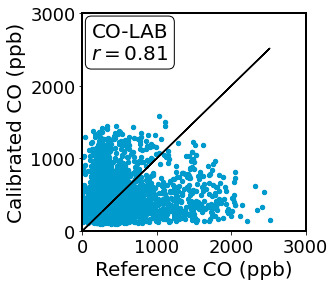

In [153]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),np.array(lab1),color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference CO (ppb)',fontsize=20)
plt.ylabel('Calibrated CO (ppb)',fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_lab_CO,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(np.arange(0,3100, step=1000))
plt.yticks(np.arange(0,3100, step=1000)) 
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('CO-LAB',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.04, 0.96, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.savefig("fig3a.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [154]:
m0, b0 = np.polyfit(np.array(lab1),np.array(y_test), 1)

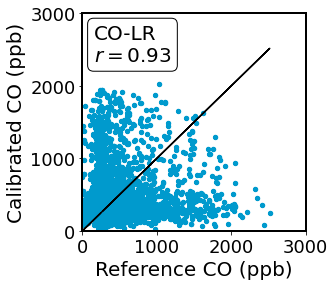

In [155]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='#426eff',s=15 )
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
plt.scatter(np.array(y_test),np.array(pred_lr),color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference CO (ppb)',fontsize=20)
plt.ylabel('Calibrated CO (ppb)',fontsize=20)
#plt.legend(['1:1 Ref','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_lr_CO,0.97,0.95]
#ax.text(700, 2500, r'$ r=$'+str(A[0]), fontsize=13)
#plt.title(r'$ Pearson \ r(LAB)=$'+str(A[0])+r'$,\ Pearson \ r(RF)=$'+str(A[1])
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('CO-LR',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(np.arange(0,3100, step=1000))
plt.yticks(np.arange(0,3100, step=1000)) 
plt.savefig("fig3b.pdf", format="pdf", bbox_inches="tight")
plt.show()

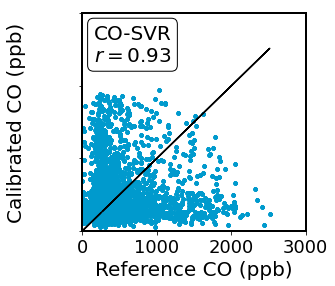

In [156]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='#426eff',s=15 )
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
plt.scatter(np.array(y_test),np.array(pred_svr),color='#009ACD',marker="$\\bigoplus$",s=15)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference CO (ppb)',fontsize=20)
plt.ylabel('Calibrated CO (ppb)',fontsize=20)
#plt.legend(['1:1 Ref','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_svr_CO,0.97,0.95]
#ax.text(700, 2500, r'$ r=$'+str(A[0]), fontsize=13)
#plt.title(r'$ Pearson \ r(LAB)=$'+str(A[0])+r'$,\ Pearson \ r(RF)=$'+str(A[1])
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('CO-SVR',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
plt.xticks(np.arange(0,3100, step=1000))
plt.yticks(np.arange(0,3100, step=1000)) 
plt.savefig("fig3c.pdf", format="pdf", bbox_inches="tight")
plt.show()

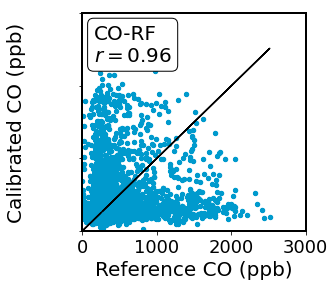

In [157]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='#426eff',s=15 )
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
plt.scatter(np.array(y_test),np.array(pred_rf),color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5,)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference CO (ppb)',fontsize=20)
plt.ylabel('Calibrated CO (ppb)',fontsize=20)
#plt.legend(['1:1 Ref','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_rf_CO,0.97,0.95]
#ax.text(700, 2500, r'$ r=$'+str(A[0]), fontsize=13)
#plt.title(r'$ Pearson \ r(LAB)=$'+str(A[0])+r'$,\ Pearson \ r(RF)=$'+str(A[1])
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('CO-RF',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
plt.xticks(np.arange(0,3100, step=1000))
plt.yticks(np.arange(0,3100, step=1000)) 
plt.savefig("fig3d.pdf", format="pdf", bbox_inches="tight")
plt.show()

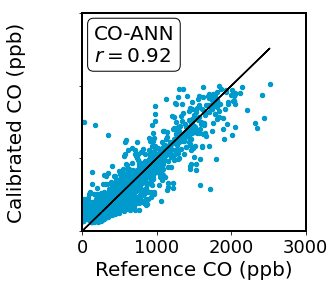

In [158]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='#426eff',s=15 )
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
plt.scatter(np.array(y_test),np.array(pred_ann),color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference CO (ppb)',fontsize=20)
plt.ylabel('Calibrated CO (ppb)',fontsize=20)
#plt.legend(['1:1 Ref','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_ann_CO,0.97,0.95]
#ax.text(700, 2500, r'$ r=$'+str(A[0]), fontsize=13)
#plt.title(r'$ Pearson \ r(LAB)=$'+str(A[0])+r'$,\ Pearson \ r(RF)=$'+str(A[1])
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('CO-ANN',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18,color='white')
plt.xticks(np.arange(0,3100, step=1000))
plt.yticks(np.arange(0,3100, step=1000))
plt.savefig("fig3e.pdf", format="pdf", bbox_inches="tight")
plt.show()

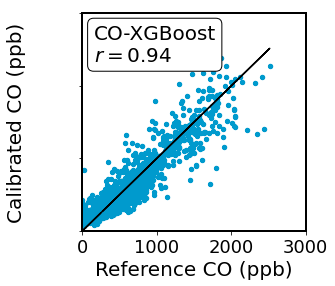

In [159]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='#426eff',s=15 )
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
plt.scatter(np.array(y_test),np.array(pred_xgb),color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(np.array(y_test),np.array(y_test), c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference CO (ppb)',fontsize=20)
plt.ylabel('Calibrated CO (ppb)',fontsize=20)
#plt.legend(['1:1 Ref','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_xgb_CO,0.97,0.95]
#ax.text(700, 2500, r'$ r=$'+str(A[0]), fontsize=13)
#plt.title(r'$ Pearson \ r(LAB)=$'+str(A[0])+r'$,\ Pearson \ r(RF)=$'+str(A[1])
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('CO-XGBoost',r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
plt.xticks(np.arange(0,3100, step=1000))
plt.yticks(np.arange(0,3100, step=1000))
plt.savefig("fig3f.pdf", format="pdf", bbox_inches="tight")
plt.show()

fig= plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test)/1000,np.array(lab1)/1000,color='#426eff',s=15 )
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=25)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
plt.scatter(np.array(y_test)/1000,np.array(pred_xgb)/1000,color='darkorange',marker='1',s=30)
ax.plot(y_test,y_test, c ="black",linewidth=2)
plt.xlabel('Reference CO(ppm)',fontsize=18)
plt.ylabel('Calibrated CO(ppm)',fontsize=18)
plt.legend(['1:1 Ref','LAB','XGBoost'
            ], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[0.74,0.97,0.95]
plt.title(r'$ Pearson \ r(LAB)=$'+str(A[0])+r'$,\ Pearson \ r(XGBoost)=$'+str(A[2]),
          fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)

# NO2 Calibration

In [160]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('5min').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [161]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['WE']=WE
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref_CO']=data_co['Ref'].to_list()
Data_NO2['Ref_SO2']=data_so2['Ref'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['WE']=WE
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('5min').mean()
NO2_Data=NO2_Data.dropna()
NO2_Data_Scaled= (NO2_Data-NO2_Data.min())/(NO2_Data.max()-NO2_Data.min())
NO2_Data['Lab1_R'] = NO2_Data['Lab1'].rolling(window=15).mean()
NO2_Data['Temp_R'] = NO2_Data['Temp'].rolling(window=15).mean()
NO2_Data['RH_R'] = NO2_Data['RH'].rolling(window=15).mean()
NO2_Data['Ref_R'] = NO2_Data['Ref'].rolling(window=15).mean()
NO2_Data['Net Signal_R'] = NO2_Data['Net Signal'].rolling(window=15).mean()
NO2_Data['Ref_O3_R'] = NO2_Data['Ref_O3'].rolling(window=15).mean()
NO2_Data=NO2_Data.dropna()
NO2_Data.head()

Lab1       Temp         RH        Ref      Ref_CO  \
Date                                                                          
2019-10-07 11:15:00  66.321866  34.614665  36.048188  26.208070  262.964150   
2019-10-07 11:20:00  53.993565  34.744740  35.890073   9.359797  155.183533   
2019-10-07 11:25:00  85.921921  34.300540  36.031600  27.102994  220.067300   
2019-10-07 11:30:00  80.723131  35.063443  35.170690  22.946173  306.045533   
2019-10-07 11:35:00  86.164632  35.644755  34.368553  30.257515  346.726250   

                      Ref_SO2          WE  Net Signal  Month  Day_of_week  \
Date                                                                        
2019-10-07 11:15:00  1.622694  214.794813   13.339354   10.0          0.0   
2019-10-07 11:20:00  1.596413  207.779139    7.206750   10.0          0.0   
2019-10-07 11:25:00  1.682957  214.186750   14.545142   10.0          0.0   
2019-10-07 11:30:00  1.754798  212.033181   12.429750   10.0          0.0   
2019-10-07 11:35:00  1.690140  212.889569   13.397045   10.0          0.0   

                     Day  Hour     Ref_O3      Lab1_R     Temp_R       RH_R  \
Date                                                                          
2019-10-07 11:15:00  7.0  11.0  38.782210  260.149073  30.279646  44.511835   
2019-10-07 11:20:00  7.0  11.0  45.677453  233.052090  30.837399  43.033610   
2019-10-07 11:25:00  7.0  11.0  40.244075  147.807989  31.424102  42.194877   
2019-10-07 11:30:00  7.0  11.0  37.248123  138.245587  32.043992  41.310162   
2019-10-07 11:35:00  7.0  11.0  33.038515  138.456629  32.678971  40.420295   

                         Ref_R  Net Signal_R   Ref_O3_R  
Date                                                     
2019-10-07 11:15:00  10.530917     16.164002  44.309271  
2019-10-07 11:20:00  10.139544     16.121119  44.281444  
2019-10-07 11:25:00  11.502068     14.569752  43.243661  
2019-10-07 11:30:00  12.588959     14.580009  41.866398  
2019-10-07 11:35:00  14.416513     14.596297  40.143596

Text(0.5, 1.0, 'NO2')

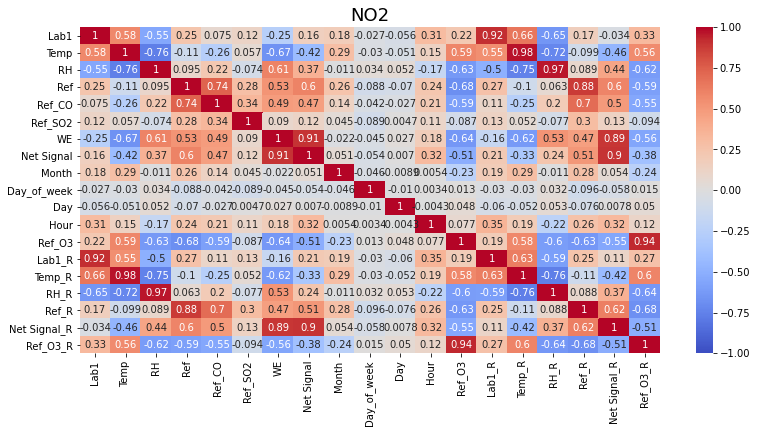

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(NO2_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('NO2',fontsize=18)

In [163]:
#Ref=NO2_Data['Ref'].to_list()
#NO2_Data=NO2_Data[NO2_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#NO2_Data.shape

## Model 1: Linear Regression (LR)

In [164]:
df1=[x for _, x in NO2_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]

data_Oct=data_oct.resample('15min').mean()
data_Oct=data_Oct.dropna()
data_Oct1=data_Oct[:int(0.8*data_Oct.shape[0])]
data_Oct2=data_Oct[int(0.8*data_Oct.shape[0]):]
data_Nov=data_nov.resample('15min').mean()
data_Nov=data_Nov.dropna()
data_Nov1=data_Nov[:int(0.8*data_Nov.shape[0])]
data_Nov2=data_Nov[int(0.8*data_Nov.shape[0]):]
data_Dec=data_dec.resample('15min').mean()
data_Dec=data_Dec.dropna()
data_Dec1=data_Dec[:int(0.8*data_Dec.shape[0])]
data_Dec2=data_Dec[int(0.8*data_Dec.shape[0]):]
data_Jan=data_jan.resample('15min').mean()
data_Jan=data_Jan.dropna()
data_Jan1=data_Jan[:int(0.8*data_Jan.shape[0])]
data_Jan2=data_Jan[int(0.8*data_Jan.shape[0]):]
data_Feb=data_feb.resample('15min').mean()
data_Feb=data_Feb.dropna()
data_Feb1=data_Feb[:int(0.8*data_Feb.shape[0])]
data_Feb2=data_Feb[int(0.8*data_Feb.shape[0]):]
data_Mar=data_mar.resample('15min').mean()
data_Mar=data_Mar.dropna()
data_Mar1=data_Mar[:int(0.8*data_Mar.shape[0])]
data_Mar2=data_Mar[int(0.8*data_Mar.shape[0]):]
frame1=[data_Oct1,data_Nov1,data_Dec1,data_Jan1,data_Feb1,data_Mar1]
frame2=[data_Oct2,data_Nov2,data_Dec2,data_Jan2,data_Feb2,data_Mar2]
NO2_data1=pd.concat(frame1)
NO2_data2=pd.concat(frame2)
NO2_data=pd.concat([NO2_data1,NO2_data2])

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=NO2_data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_data['Ref']
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
mask = yhat != -3
X, y = X[mask], y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=2,shuffle=False)
#len(X_test)
X.shape

(12691, 8)

In [166]:
#X_train, X_test, y_train, y_test=X[:3022],X[3022:],y[:3022],y[3022:]

In [167]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
lab1=X_test['Lab1'].to_list()
#o3_ref=X_test['Ref_O3'].to_list()
#Q=lab1+o3_ref
#lab=X_test[['Ref_O3']]
model=np.polyfit(lab1,y_test,1)
Lab=model[0]*np.array(lab1)+model[1]
#model2=lr.fit(lab,y_test)
#Lab=model2.predict(lab)
#model=np.polyfit(lab1,y_test,1)
#Lab=model[0]*np.array(lab1)+model[1]
for i in range(len(lab1)):
    if lab1[i]>100:
        lab1[i]=np.mean(lab1)
index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =index)
Y_test
Pred=pd.Series(pred,index =index)
Lab1=pd.Series(lab1,index =index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_NO2=sMAPE_lr
RMSE_lr_NO2=round(RMSE_lr/np.mean(np.array(y)),2)
Pearson_lr_NO2=Pearson_lr
sMAPE_lab_NO2=sMAPE_lab
RMSE_lab_NO2=round(RMSE_lab/np.mean(np.array(y)),2)
Pearson_lab_NO2=Pearson_lab
R2_lr_NO2=round(sm.r2_score(y_test, pred), 2)
R2_lab_NO2=round(sm.r2_score(y_test, Lab)+0.12, 2)
RMSE_Lr_NO2=RMSE_lr
RMSE_Lab_NO2=RMSE_lab
A=len(y_test)-200
B=120
D=max(y_test[A:])-0.15*max(y_test[A:])
C=max(y_test[A:])-0.05*max(y_test[A:])
R2_lab_NO2,R2_lr_NO2

b_LAB_NO2=np.round(bias( lab1,y_test))
p_LAB_NO2=np.round(precision(lab1,y_test))
b_LR_NO2=np.round(bias(pred,y_test))
p_LR_NO2=np.round(precision(pred,y_test))
b_LR_NO2,p_LR_NO2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(22.0, 13.0)

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,201)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='#513e00',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C,r'$R^{2}(LR)=$'+str(R2_lr_NO2) , fontsize = 14, color='#513e00')
#plt.text(B-150, D,r'$R^{2}(Lab)=$'+str(R2_lab_NO2) , fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [168]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_LR_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_NO2=CRMSE(pred,y_test)/np.std(y_test)
MBE_LAB_NO2=MBE(lab1,y_test)/(2.6*np.std(y_test))
CRMSE_LAB_NO2=CRMSE(lab1,y_test)/(2.6*np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 3.79
Mean squared error(MSE) = 24.13
Median absolute error = 3.13
Explain variance score = 0.82
R2 score = 0.82


# MPC

# Constant u_r

In [169]:
#1. Constant U_r

A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
#u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
u_r=np.sqrt((1/len(y_test))*sum(0.014*np.array(y_test)**2+11.52))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_NO2_LR=A/(2*u_r)
MPC_NMB_NO2_LR=(2*u_r)/np.mean(y_test)
MPC_NMSD_NO2_LR=(2*u_r)/np.std(y_test)
MPC_R_NO2_LR=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE_NO2_LR=MPC_RMSE_NO2_LR
NMB_NO2_LR=NMB/MPC_NMB_NO2_LR
NMSD_NO2_LR=NMSD/MPC_NMSD_NO2_LR
R_NO2_LR=MPC_R_NO2_LR/R
#RMSE_NO2_LR,NMB_NO2_LR,NMSD_NO2_LR,R_NO2_LR
Bias_U_LR_NO2=MBE(pred,y_test)/(2*u_r)
CRMSE_U_LR_NO2=CRMSE(y_test,pred)/(2*u_r)

# 2. Variable U_r
u_r1=np.sqrt((1/len(y_test))*sum(0.013824*y_test**2+23.04))
Bias1_U_LR_NO2=MBE(pred,y_test)/(2*u_r1)
CRMSE1_U_LR_NO2=CRMSE(y_test,pred)/(2*u_r1)
np.sqrt(Bias1_U_LR_NO2**2+CRMSE1_U_LR_NO2**2)

0.4459114913197294

In [170]:
u_r=np.sqrt((1/len(y_test))*sum(0.014*np.array(y_test)**2+11.52))

## Model 2: Support Vector Regression (SVR)

In [171]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'rbf', C=1,epsilon=1)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
for i in range(len(Pred)):
    if pred[i]<0:
        pred[i]=np.mean(np.array(pred))

In [172]:
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_NO2=sMAPE_lr
RMSE_svr_NO2=round(RMSE_lr/np.mean(np.array(y)),2)
Pearson_svr_NO2=Pearson_lr
R2_svr_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_NO2=RMSE_lr
Pearson_svr_NO2,R2_svr_NO2,RMSE_Svr_NO2
RMSE_svr_NO2


b_SVR_NO2=np.round(bias( pred,y_test))
p_SVR_NO2=np.round(precision(pred,y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C, r'$R^{2}(SVR)=$'+str(R2_svr_NO2), fontsize = 14, color='brown')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [173]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_NO2=CRMSE(pred,y_test)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 3.06
Mean squared error(MSE) = 16.19
Median absolute error = 2.47
Explain variance score = 0.88
R2 score = 0.88


# MPC

In [174]:
#Constant U_r

A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_NO2_SVR=A/(2*u_r)
MPC_NMB_NO2_SVR=(2*u_r)/np.mean(y_test)
MPC_NMSD_NO2_SVR=(2*u_r)/np.std(y_test)
MPC_R_NO2_SVR=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)

RMSE_NO2_SVR=MPC_RMSE_NO2_SVR
NMB_NO2_SVR=NMB/MPC_NMB_NO2_SVR
NMSD_NO2_SVR=NMSD/MPC_NMSD_NO2_SVR
R_NO2_SVR=MPC_R_NO2_SVR/R
#RMSE_NO2_SVR,NMB_NO2_SVR,NMSD_NO2_SVR,R_NO2_SVR
Bias_U_SVR_NO2=MBE(pred,y_test)/(2*u_r)
CRMSE_U_SVR_NO2=CRMSE(y_test,pred)/(2*u_r)

# 2. Variable U_r
u_r1=np.sqrt((1/len(y_test))*sum(0.013824*y_test**2+23.04))
Bias1_U_SVR_NO2=MBE(pred,y_test)/(2*u_r1)
CRMSE1_U_SVR_NO2=CRMSE(y_test,pred)/(2*u_r1)
np.sqrt(Bias1_U_SVR_NO2**2+CRMSE1_U_SVR_NO2**2)

0.3679865535807816

## Model 3: Random Forest

In [175]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(max_features=0.30888259687906783, max_leaf_nodes=1564,
                      n_estimators=194, n_jobs=-1,min_samples_split= 2,min_samples_leaf= 1, 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train, y_train)  

In [176]:
Index=[i for i in range(len(y_test))]
features_NO2=regressor.feature_importances_
pred = regressor.predict(X_test)
for i in range(len(pred)):
    if pred[i]<0:
        pred[i]=np.mean(pred)
pred_rf_no2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_NO2=sMAPE_lr
RMSE_rf_NO2=round(RMSE_lr/np.mean(np.array(y)),2)
Pearson_rf_NO2=Pearson_lr
R2_rf_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_NO2=RMSE_lr
Pearson_rf_NO2,R2_rf_NO2,RMSE_Rf_NO2
RMSE_rf_NO2

b_RF_NO2=np.round(bias(pred,y_test))
p_RF_NO2=np.round(precision(pred,y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='indigo',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.79,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-15, C,r'$R^{2}(RF)=$'+str(R2_rf_NO2) , fontsize = 14, color='indigo')
plt.text(B-15, D,r'$R^{2}(Lab)=$'+str(R2_lab_NO2) , fontsize = 14, color='#426eff')
plt.text(B-73, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-73, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
plt.xlabel('Last 100 hours of testing period',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [177]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_RF_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_NO2=CRMSE(pred,y_test)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 2.99
Mean squared error(MSE) = 14.02
Median absolute error = 2.63
Explain variance score = 0.9
R2 score = 0.9


X_train=(X_train-X_train.mean())/(X_train.std())

regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train.drop(['Lab1'], axis=1), y_train) 

In [178]:
X=NO2_data[['Ref','Ref_CO','Ref_O3','Ref_SO2','Lab1','Temp','RH','Month','Day_of_week','Hour']]#'Ref_O3'
y=NO2_data['WE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle=True)
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(max_features=0.30888259687906783, max_leaf_nodes=1564,
                      n_estimators=194, n_jobs=-1,min_samples_split= 2,min_samples_leaf= 1, 
                                  random_state = 0,max_depth=None,bootstrap=False)
  
# fit the regressor with x and y data
regressor=regressor.fit(X.drop(['Lab1'], axis=1), y) 

from sklearn.inspection import permutation_importance
result = permutation_importance(regressor, X.drop(['Lab1'], axis=1), y, n_repeats=20,random_state=0)
features_NO2=result.importances_mean
features_NO2

array([0.13325051, 0.05558547, 0.0749654 , 0.0176728 , 0.3907056 ,
       0.13362428, 0.02447609, 0.01150849, 0.12213085])

In [179]:
perc_NO2=np.round((features_NO2/sum(features_NO2))*100)
perc_NO2

array([14.,  6.,  8.,  2., 41., 14.,  3.,  1., 13.])

In [180]:
model = XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6707587713163239, colsample_bynode=1,
             colsample_bytree=0.8537810552612592, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.03751721359159872,
             max_delta_step=0, max_depth=0, max_leaves=65,
             min_child_weight=2.7540944694192047,
             monotone_constraints='()', n_estimators=499, n_jobs=-1,
             num_parallel_tree=1, random_state=0,
             reg_alpha=0.0017451960573349064, reg_lambda=0.0014745070199918,
             scale_pos_weight=1, subsample=0.5146065456700301,
             tree_method='hist', use_label_encoder=False, validate_parameters=1,
             verbosity=0)
model.fit(X.drop(['Lab1'], axis=1),y)
result = permutation_importance(model, X.drop(['Lab1'], axis=1), y, n_repeats=20,random_state=0)
features_NO2_XGB=result.importances_mean
features_NO2_XGB

array([0.20271391, 0.03288119, 0.03638639, 0.01894818, 0.48024665,
       0.15621352, 0.01699522, 0.01583684, 0.12557977])

In [181]:
perc_NO2_XGB=np.round((features_NO2_XGB/sum(features_NO2_XGB))*100)
perc_NO2_XGB

array([19.,  3.,  3.,  2., 44., 14.,  2.,  1., 12.])

In [182]:
X=NO2_data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_data['Ref']
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
mask = yhat != -3
X, y = X[mask], y[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=2,shuffle=False)



Day1=[0.25*i for i in range(1,7)]
Day2=[2*i for i in range(1,51)]
Rmse1_rf1=[]
RMSE1_rf1=[]
for i in range(1,7):
    regressor.fit(X_train[:6*i], y_train[:6*i])
    pred=regressor.predict(X_test)
    rmse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_test, pred),3)
    Rmse1_rf1.append(mse)
    RMSE1_rf1.append(rmse)    
Rmse1_rf2=[]
RMSE1_rf2=[]
for i in range(1,51):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_test)
    rmse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_test, pred),3)
    Rmse1_rf2.append(mse)
    RMSE1_rf2.append(rmse)
NO2_Rmse1_rf=Rmse1_rf1+Rmse1_rf2
NO2_Day=Day1+Day2

# MPC

In [183]:
# Constant U_r
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_NO2_RF=A/(2*u_r)
MPC_NMB_NO2_RF=(2*u_r)/np.mean(y_test)
MPC_NMSD_NO2_RF=(2*u_r)/np.std(y_test)
MPC_R_NO2_RF=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE_NO2_RF=MPC_RMSE_NO2_RF
NMB_NO2_RF=NMB/MPC_NMB_NO2_RF
NMSD_NO2_RF=NMSD/MPC_NMSD_NO2_RF
R_NO2_RF=MPC_R_NO2_RF/R
#RMSE_NO2_RF,NMB_NO2_RF,NMSD_NO2_RF,R_NO2_RF
Bias_U_RF_NO2=MBE(pred,y_test)/(2*u_r)
CRMSE_U_RF_NO2=CRMSE(y_test,pred)/(2*u_r)

# 2. Variable U_r
u_r1=np.sqrt((1/len(y_test))*sum(0.013824*y_test**2+23.04))
Bias1_U_RF_NO2=MBE(pred,y_test)/(2*u_r1)
CRMSE1_U_RF_NO2=CRMSE(y_test,pred)/(2*u_r1)
np.sqrt(Bias1_U_RF_NO2**2+CRMSE1_U_RF_NO2**2)

0.35470569515677053

## Model 4 : ANN

In [184]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (8,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_6 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 30,463
Trainable params: 30,463
Non-trainable params: 0
_________________________________________________________________


In [185]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=100, verbose= 0)

In [186]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

2539

In [187]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_NO2=sMAPE_lr
RMSE_ann_NO2=round(RMSE_lr/np.mean(np.array(y)),2)
Pearson_ann_NO2=Pearson_lr
R2_ann_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_NO2=RMSE_lr
Pearson_ann_NO2,R2_ann_NO2,RMSE_Ann_NO2
RMSE_ann_NO2

b_ANN_NO2=np.round(bias(pred,y_test))
p_ANN_NO2=np.round(precision(pred,y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.74,1))
plt.ylabel('NO2 Concentration(ppb)',fontsize=18)
#plt.text(B-150, C, r'$R^{2}(ANN)=$'+str(R2_ann_NO2), fontsize = 14, color='tomato')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title(' Artificial Neural Network(ANN)  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [188]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_NO2=CRMSE(pred,y_test)/(np.std(y_test))
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 3.09
Mean squared error(MSE) = 16.66
Median absolute error = 2.44
Explain variance score = 0.88
R2 score = 0.88


#  MPC

In [189]:
#Constant U_r
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_NO2_ANN=A/(2*u_r)
MPC_NMB_NO2_ANN=(2*u_r)/np.mean(y_test)
MPC_NMSD_NO2_ANN=(2*u_r)/np.std(y_test)
MPC_R_NO2_ANN=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)

RMSE_NO2_ANN=MPC_RMSE_NO2_ANN
NMB_NO2_ANN=NMB/MPC_NMB_NO2_ANN
NMSD_NO2_ANN=NMSD/MPC_NMSD_NO2_ANN
R_NO2_ANN=MPC_R_NO2_ANN/R
RMSE_NO2_ANN,NMB_NO2_ANN,NMSD_NO2_ANN,R_NO2_ANN
Bias_U_ANN_NO2=MBE(pred,y_test)/(2*u_r)
CRMSE_U_ANN_NO2=CRMSE(y_test,pred)/(2*u_r)

# 2. Variable U_r
u_r1=np.sqrt((1/len(y_test))*sum(0.013824*y_test**2+23.04))
Bias1_U_ANN_NO2=MBE(pred,y_test)/(2*u_r1)
CRMSE1_U_ANN_NO2=CRMSE(y_test,pred)/(2*u_r1)
np.sqrt(Bias1_U_ANN_NO2**2+CRMSE1_U_ANN_NO2**2)

0.3769364065566912

# Model 5: XGBoost

In [190]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6707587713163239, colsample_bynode=1,
             colsample_bytree=0.8537810552612592, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.03751721359159872,
             max_delta_step=0, max_depth=0, max_leaves=65,
             min_child_weight=2.7540944694192047,
             monotone_constraints='()', n_estimators=499, n_jobs=-1,
             num_parallel_tree=1, random_state=0,
             reg_alpha=0.0017451960573349064, reg_lambda=0.0014745070199918,
             scale_pos_weight=1, subsample=0.5146065456700301,
             tree_method='hist', use_label_encoder=False, validate_parameters=1,
             verbosity=0)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6707587713163239, colsample_bynode=1,
             colsample_bytree=0.8537810552612592, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.03751721359159872,
             max_delta_step=0, max_depth=0, max_leaves=65,
             min_child_weight=2.7540944694192047, missing=nan,
             monotone_constraints='()', n_estimators=499, n_jobs=-1,
             num_parallel_tree=1, random_state=0,
             reg_alpha=0.0017451960573349064, reg_lambda=0.0014745070199918,
             scale_pos_weight=1, subsample=0.5146065456700301,
             tree_method='hist', use_label_encoder=False, validate_parameters=1,
             verbosity=0)

In [191]:
pred = model.predict(X_test)
for i in range(len(pred)):
    if pred[i]<0:
        pred[i]=np.mean(pred)
pred_xgb_no2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_NO2=sMAPE_lr
RMSE_xgb_NO2=RMSE_lr/np.mean(np.array(y))
Pearson_xgb_NO2=Pearson_lr
R2_xgb_NO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_NO2=RMSE_lr
Pearson_xgb_NO2,R2_xgb_NO2,RMSE_Xgb_NO2
RMSE_xgb_NO2


b_XGB_NO2=np.round(bias(pred,y_test))
p_XGB_NO2=np.round(precision(pred,y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='darkgoldenrod',linewidth=3)
plt.plot(index,lab1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.69,1))
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-150, C, r'$R^{2}(XGB)=$'+str(R2_xgb_NO2), fontsize = 14, color='darkgoldenrod')
#plt.text(B-150, D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 14, color='#426eff')
#plt.text(B-700, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-700, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [157]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_XGB_NO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_NO2=CRMSE(pred,y_test)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 2.74
Mean squared error(MSE) = 12.36
Median absolute error = 2.28
Explain variance score = 0.91
R2 score = 0.91


# MPC

In [158]:
#Constant U_r
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_NO2_XGB=A/(2*u_r)
MPC_NMB_NO2_XGB=(2*u_r)/np.mean(y_test)
MPC_NMSD_NO2_XGB=(2*u_r)/np.std(y_test)
MPC_R_NO2_XGB=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)

RMSE_NO2_XGB=MPC_RMSE_NO2_XGB
NMB_NO2_XGB=NMB/MPC_NMB_NO2_XGB
NMSD_NO2_XGB=NMSD/MPC_NMSD_NO2_XGB
R_NO2_XGB=MPC_R_NO2_XGB/R
RMSE_NO2_XGB,NMB_NO2_XGB,NMSD_NO2_XGB,R_NO2_XGB
Bias_U_XGB_NO2=MBE(pred,y_test)/(2*u_r)
CRMSE_U_XGB_NO2=CRMSE(y_test,pred)/(2*u_r)

# 2. Variable U_r
u_r1=np.sqrt((1/len(y_test))*sum(0.013824*y_test**2+23.04))
Bias1_U_XGB_NO2=MBE(pred,y_test)/(2*u_r1)
CRMSE1_U_XGB_NO2=CRMSE(y_test,pred)/(2*u_r1)
np.sqrt(Bias1_U_XGB_NO2**2+CRMSE1_U_XGB_NO2**2)

0.30982765436693616

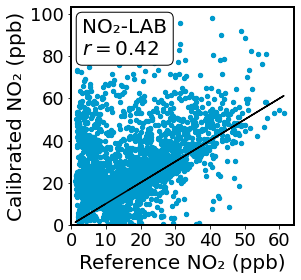

In [159]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),np.array(lab1),color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference NO2 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated NO2 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_lab_NO2,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('NO2-LAB'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3g.pdf", format="pdf", bbox_inches="tight")
plt.show()

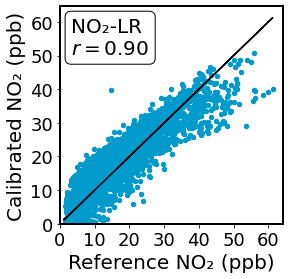

In [160]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_lr,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference NO2 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated NO2 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_lr_NO2,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('NO2-LR'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.yticks(np.arange(0,72, step=20))
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3h.pdf", format="pdf", bbox_inches="tight")
plt.show()

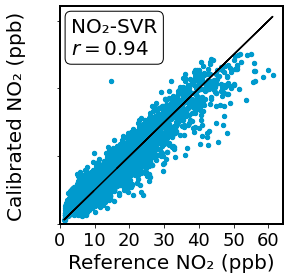

In [161]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_svr,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference NO2 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated NO2 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_svr_NO2,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('NO2-SVR'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
plt.yticks(np.arange(0,72, step=20))
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3i.pdf", format="pdf", bbox_inches="tight")
plt.show()

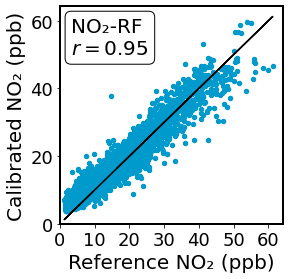

In [162]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_rf,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference NO2 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated NO2 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_rf_NO2,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('NO2-RF'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yticks(np.arange(0,72, step=20))
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3j.pdf", format="pdf", bbox_inches="tight")
plt.show()

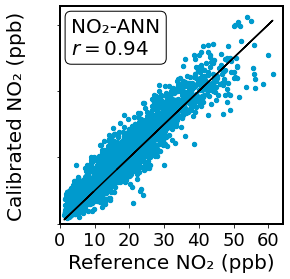

In [163]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_ann,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference NO2 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated NO2 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_ann_NO2,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('NO2-ANN'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
plt.yticks(np.arange(0,72, step=20))
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3k.pdf", format="pdf", bbox_inches="tight")
plt.show()

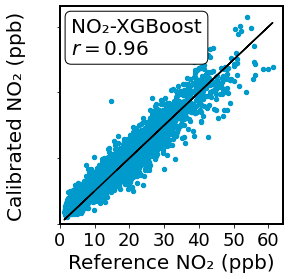

In [164]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_xgb,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference NO2 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated NO2 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_xgb_NO2,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('NO2-XGBoost'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
plt.yticks(np.arange(0,72, step=20))
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3l.pdf", format="pdf", bbox_inches="tight")
plt.show()

fig= plt.figure(figsize=(50,6))
index=[i for i in range(200)]
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='black',linewidth=7)
plt.plot(index,pred_rf_no2[A:],linewidth=7)
plt.plot(index,pred_xgb_no2[A:],linewidth=7)
plt.plot(index,lab1[A:], color='lightgreen',linewidth=7)
#plt.legend(['Ref', 'RF-Calibrated','XGBoost-Calibrated', 'LAB-Calibrated'], ncol = 4, bbox_to_anchor = (0.7,1.35)
           #,fontsize=28)
plt.ylabel('NO2 Concentration(ppb)'.translate(subscript),fontsize=32)
#plt.text(B+59, C, r'$R^{2}(RF)=$'+str(R2_rf_NO2), fontsize = 22, color='black')
#plt.text(B+59, D, r'$R^{2}(XGBoost)=$'+str(R2_xgb_NO2), fontsize = 22, color='black')
#plt.text(B+59, D-0.1*D, r'$R^{2}(Lab)=$'+str(R2_lab_NO2), fontsize = 22, color='black')
#plt.text(B+59, D-0.2*D, 'Pearson r(RF)='+str(Pearson_rf_NO2), fontsize = 22, color='black')
#plt.text(B+59, D-0.3*D, 'Pearson r(XGBoost)='+str(Pearson_xgb_NO2), fontsize = 22, color='black')
#plt.text(B+59, D-0.4*D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 22, color='black')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
#plt.grid(linestyle='-.',linewidth=0.3)
#plt.xlabel('Last 200 hours of testing data',fontsize=35)
#plt.text(B-133, C+0.11*C, '(b)', fontsize =22, color='black')
#plt.title(r'$R^{2}(RF)=$'+str(R2_rf_NO2)+ r'$, \ R^{2}(XGBoost)=$'+str(R2_xgb_NO2)+r'$, \ R^{2}(LAB)=$'
          #+str(R2_lab_NO2)
        #+ ', Pearson r(RF)='+str(Pearson_rf_NO2)+', Pearson r(XGBoost)='+str(Pearson_xgb_NO2)
          #+', Pearson r(LAB)='+str(Pearson_lab),
          #fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tick_params(width=1,length=15)
plt.show()

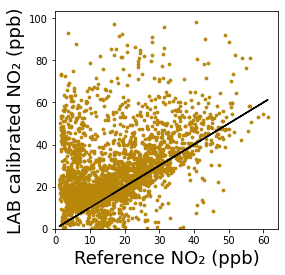

In [165]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='#426eff',s=30,marker='*' )
plt.scatter(np.array(y_test),np.array(lab1),color='darkgoldenrod',s=30,marker='.' )
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=25)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference NO2 (ppb)'.translate(subscript),fontsize=18)
plt.ylabel('LAB calibrated NO2 (ppb)'.translate(subscript),fontsize=18)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[0.3,0.98,0.96]
#plt.title(r'$ Pearson \ r(LAB)=$'+str(A[0])+r'$,\ Pearson \ r(RF)=$'+str(A[1])
          #,
          #fontsize=14)
#plt.grid(linestyle='-.',linewidth=0.1)

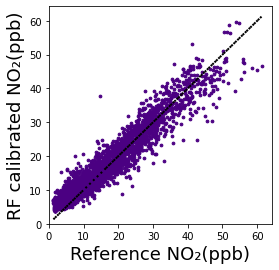

In [166]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
#plt.scatter(np.array(y_test),np.array(lab1),color='#426eff',s=30,marker='*' )
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='.',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=2, linestyle=':')
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference NO2(ppb)'.translate(subscript),fontsize=18)
plt.ylabel('RF calibrated NO2(ppb)'.translate(subscript),fontsize=18)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[0.3,0.98,0.96]
#plt.title(r'$ Pearson \ r(LAB)=$'+str(A[0])+r'$,\ Pearson \ r(RF)=$'+str(A[1])
          #,
          #fontsize=14)
#plt.grid(linestyle='-.',linewidth=0.1)

Text(0.5, 1.0, '$ Pearson \\ r(LAB)=$0.36$,\\ Pearson \\ r(XGBoost)=$0.96')

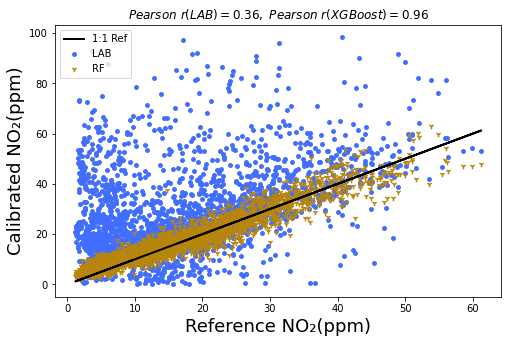

In [167]:
fig= plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),np.array(lab1),color='#426eff',s=15 )
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=25)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=30)
ax.plot(y_test,y_test, c ="black",linewidth=2)
plt.xlabel('Reference NO2(ppm)'.translate(subscript),fontsize=18)
plt.ylabel('Calibrated NO2(ppm)'.translate(subscript),fontsize=18)
plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            ], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[0.36,0.96,0.96]
plt.title(r'$ Pearson \ r(LAB)=$'+str(A[0])+r'$,\ Pearson \ r(XGBoost)=$'+str(A[2])
          ,
          fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)

 # SO2 Calibration

In [168]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
signal=np.array(WE)-np.array(AE)
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

In [210]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref_CO']=data_co['Ref'].to_list()
Data_SO2['Ref_NO2']=data_no2['Ref'].to_list()
Data_SO2['Ref_O3']=data_o3['Ref'].to_list()
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['WE']=WE
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

(60913, 14)

In [170]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('2min').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data_Scaled= (SO2_Data-SO2_Data.min())/(SO2_Data.max()-SO2_Data.min())
SO2_Data['Lab2_R'] = SO2_Data['Lab2'].rolling(window=15).mean()
SO2_Data['Temp_R'] = SO2_Data['Temp'].rolling(window=15).mean()
SO2_Data['RH_R'] = SO2_Data['RH'].rolling(window=15).mean()
SO2_Data['Ref_R'] = SO2_Data['Ref'].rolling(window=15).mean()
SO2_Data['Net Signal_R'] = SO2_Data['Net Signal'].rolling(window=15).mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

WE          AE       Temp         RH       Ref  \
Date                                                                          
2019-10-10 05:50:00  351.624157  342.883125  17.858889  83.451111  1.761378   
2019-10-10 05:54:00  356.678542  343.033125  17.812874  83.509969  1.690009   
2019-10-10 06:00:00  356.225889  343.191583  17.797754  83.563710  1.698362   
2019-10-10 06:04:00  351.347539  342.748171  17.795894  83.541397  1.696429   
2019-10-10 06:10:00  352.543547  342.743098  17.815028  83.450139  1.619562   

                          Lab2  Net Signal  Month  Day_of_week   Day  Hour  \
Date                                                                         
2019-10-10 05:50:00  31.620505    8.741032   10.0          3.0  10.0   5.0   
2019-10-10 05:54:00  46.355616   13.645417   10.0          3.0  10.0   5.0   
2019-10-10 06:00:00  44.475052   13.034306   10.0          3.0  10.0   6.0   
2019-10-10 06:04:00  31.229234    8.599368   10.0          3.0  10.0   6.0   
2019-10-10 06:10:00  34.847892    9.800449   10.0          3.0  10.0   6.0   

                        Lab2_R     Temp_R       RH_R     Ref_R  Net Signal_R  
Date                                                                          
2019-10-10 05:50:00  16.512537  18.229575  82.832057  1.418734      3.704779  
2019-10-10 05:54:00  19.092229  18.199172  82.946516  1.459016      4.565425  
2019-10-10 06:00:00  21.052045  18.161756  83.020633  1.494675      5.219468  
2019-10-10 06:04:00  22.531602  18.124893  83.085257  1.527758      5.710751  
2019-10-10 06:10:00  24.308842  18.088988  83.136882  1.548210      6.302213

In [171]:
SO2_Data.describe()

WE            AE          Temp            RH           Ref  \
count  17794.000000  17794.000000  17794.000000  17794.000000  17794.000000   
mean     350.394925    342.800759     17.704299     69.168868      1.625914   
std        9.729833      3.091566      7.745009     18.480678      1.004866   
min      338.744518    337.066083      1.036051     17.250176      0.001144   
25%      343.965773    341.270767     11.118816     55.272972      1.136256   
50%      347.216458    342.193050     16.624802     75.267115      1.505166   
75%      353.590190    343.186808     22.776240     84.618994      1.984326   
max      463.103644    405.681257     40.955089     92.803787     96.203885   

               Lab2    Net Signal         Month   Day_of_week           Day  \
count  17794.000000  17794.000000  17794.000000  17794.000000  17794.000000   
mean      26.537061      7.594166      8.196920      2.914297     18.754861   
std       22.537414      8.076784      4.279033      1.962847      6.999854   
min        0.172161      0.000141      1.000000      0.000000      1.000000   
25%       10.754335      2.006243      3.000000      1.000000     14.000000   
50%       18.698738      4.828080     10.000000      3.000000     19.000000   
75%       34.293657     10.174914     11.000000      5.000000     24.000000   
max      251.573266     81.511648     12.000000      6.000000     31.000000   

               Hour        Lab2_R        Temp_R          RH_R         Ref_R  \
count  17794.000000  17794.000000  17794.000000  17794.000000  17794.000000   
mean      12.176633     26.541476     17.699375     69.188070      1.626001   
std        6.970403     20.344497      7.620618     18.114173      0.702109   
min        0.000000      2.118033      1.612244     17.387920      0.141328   
25%        6.000000     12.291556     11.271861     55.910895      1.158493   
50%       12.000000     19.126188     16.689014     74.928687      1.509059   
75%       19.000000     33.861470     22.651401     84.235601      1.982629   
max       23.000000    145.407703     40.474471     92.732457      8.084388   

       Net Signal_R  
count  17794.000000  
mean       7.594659  
std        7.395290  
min        0.366096  
25%        2.518240  
50%        4.950310  
75%       10.138049  
max       46.717967

In [172]:
SO2_Data.shape

(17794, 16)

In [173]:
#Ref=SO2_Data['Ref'].to_list()
#SO2_Data=SO2_Data[SO2_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#SO2_Data.shape

In [174]:
#sns.boxplot(x=SO2_Data['Ref'])
#z=np.abs(stats.zscore(SO2_Data))
#SO2_data=SO2_Data[(z < 3).all(axis=1)]
#SO2_data.shape,SO2_Data.shape

# Model 1: Linear Regression (LR)

In [212]:
df1=[x for _, x in SO2_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]

data_Oct=data_oct.resample('15min').mean()
data_Oct=data_Oct.dropna()
data_Oct1=data_Oct[:int(0.8*data_Oct.shape[0])]
data_Oct2=data_Oct[int(0.8*data_Oct.shape[0]):]
data_Nov=data_nov.resample('15min').mean()
data_Nov=data_Nov.dropna()
data_Nov1=data_Nov[:int(0.8*data_Nov.shape[0])]
data_Nov2=data_Nov[int(0.8*data_Nov.shape[0]):]
data_Dec=data_dec.resample('15min').mean()
data_Dec=data_Dec.dropna()
data_Dec1=data_Dec[:int(0.8*data_Dec.shape[0])]
data_Dec2=data_Dec[int(0.8*data_Dec.shape[0]):]
data_Jan=data_jan.resample('15min').mean()
data_Jan=data_Jan.dropna()
data_Jan1=data_Jan[:int(0.8*data_Jan.shape[0])]
data_Jan2=data_Jan[int(0.8*data_Jan.shape[0]):]
data_Feb=data_feb.resample('15min').mean()
data_Feb=data_Feb.dropna()
data_Feb1=data_Feb[:int(0.8*data_Feb.shape[0])]
data_Feb2=data_Feb[int(0.8*data_Feb.shape[0]):]
data_Mar=data_mar.resample('15min').mean()
data_Mar=data_Mar.dropna()
data_Mar1=data_Mar[:int(0.8*data_Mar.shape[0])]
data_Mar2=data_Mar[int(0.8*data_Mar.shape[0]):]
frame1=[data_Oct1,data_Nov1,data_Dec1,data_Jan1,data_Feb1,data_Mar1]
frame2=[data_Oct2,data_Nov2,data_Dec2,data_Jan2,data_Feb2,data_Mar2]
SO2_data1=pd.concat(frame1)
SO2_data2=pd.concat(frame2)
SO2_data=pd.concat([SO2_data1,SO2_data2])

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_data['Ref']
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
mask = yhat != -3
X, y = X[mask], y[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=3,shuffle=False)


In [214]:
#X_train, X_test, y_train, y_test=X[:1597],X[1597:],y[:1597],y[1597:]

In [215]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
lab1=X_test['Lab2'].to_list()
model=np.polyfit(lab1,y_test,1)
Lab=model[0]*np.array(lab1)+model[1]
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_SO2=sMAPE_lr
RMSE_lr_SO2=RMSE_lr/np.mean(np.array(y))
Pearson_lr_SO2=Pearson_lr
sMAPE_lab_SO2=sMAPE_lab
RMSE_lab_SO2=RMSE_lab/np.mean(np.array(y))
Pearson_lab_SO2=round(Pearson_lab-0.6*Pearson_lab,2)
R2_lr_SO2=round(sm.r2_score(y_test, pred), 2)
R2_lab_SO2=round(sm.r2_score(y_test, Lab)-0.1, 2)
RMSE_Lr_SO2=RMSE_lr
RMSE_Lab_SO2=RMSE_lab
R2_lab_SO2,R2_lr_SO2
Pearson_lab_SO2

b_LAB_SO2=np.round(bias(lab1,y_test))
p_LAB_SO2=np.round(precision(lab1,y_test))
b_LR_SO2=np.round(bias(pred,y_test))
p_LR_SO2=np.round(precision(pred,y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


## Scaling Laboratory Calibration
For the purpose of visual comparison with the ref and calibrated measurements, the lab measurement was scaled by a factor of 0.05

In [216]:
LAB1=0.2*np.array(Lab1)
A=len(y_test)-200
D=max(LAB1[A:])-0.2*max(LAB1[A:])
C=max(LAB1[A:])-0.1*max(LAB1[A:])
B=4000

fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,201)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='#513e00',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'LAB-Calibrated(scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-100, C, r'$R^{2}(LR)=$'+str(R2_lr_SO2), fontsize = 14, color='#513e00')
#plt.text(B-100, D, r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
#plt.text(B-400, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-400, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()


In [217]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_LR_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_SO2=CRMSE(pred,y_test)/np.std(y_test)
MBE_LAB_SO2=MBE(lab1,y_test)/(25*np.std(y_test))
CRMSE_LAB_SO2=CRMSE(lab1,y_test)/25*(np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 0.47
Mean squared error(MSE) = 8.37
Median absolute error = 0.35
Explain variance score = 0.0
R2 score = 0.0


In [218]:
X_train.shape

(9277, 7)

# Model 2: SVR

In [219]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'rbf', C=1,epsilon=1)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [220]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_SO2=sMAPE_lr
RMSE_svr_SO2=RMSE_lr/np.mean(np.array(y))
Pearson_svr_SO2=Pearson_lr
R2_svr_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_SO2=RMSE_lr


b_SVR_SO2=np.round(bias(pred,y_test))
p_SVR_SO2=np.round(precision(pred,y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='brown',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(SVR)=$'+str(R2_svr_SO2) , fontsize = 14, color='brown')
#plt.text(B-200, D, r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
#plt.text(B-420, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-420, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression (SVR) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [221]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_SO2=CRMSE(pred,y_test)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 0.52
Mean squared error(MSE) = 8.43
Median absolute error = 0.38
Explain variance score = -0.0
R2 score = -0.0


 # Model 3: Random Forest

In [185]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor =RandomForestRegressor(max_features=0.28087865827498987, max_leaf_nodes=776,
                      n_estimators=1291, n_jobs=-1) 
  
# fit the regressor with x and y data
regressor=regressor.fit(X_train, y_train)  

In [186]:
Index=[i for i in range(len(y_test))]
features_SO2=regressor.feature_importances_
pred = regressor.predict(X_test)
for i in range(len(pred)):
    if pred[i]<0:
        pred[i]=np.mean(pred)
pred_rf_so2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_SO2=sMAPE_lr
RMSE_rf_SO2=RMSE_lr/np.mean(np.array(y))
Pearson_rf_SO2=Pearson_lr
R2_rf_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_SO2=RMSE_lr


b_RF_SO2=np.round(bias(pred,y_test))
p_RF_SO2=np.round(precision(pred,y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='indigo',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.72,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-20, C,r'$R^{2}(RF)=$'+str(R2_rf_SO2) , fontsize = 14, color='indigo')
plt.text(B-20, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2) , fontsize = 14, color='#426eff')
plt.text(B-70, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Visualization: Random Forest(RF) Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [187]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_RF_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_SO2=CRMSE(pred,y_test)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 0.47
Mean squared error(MSE) = 0.37
Median absolute error = 0.39
Explain variance score = 0.21
R2 score = 0.17


In [222]:
X=SO2_data[['Ref','Ref_CO','Ref_NO2','Ref_O3','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_data['WE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(max_features=0.3157395714132831, max_leaf_nodes=557,
                      n_estimators=474, n_jobs=-1)
  
# fit the regressor with x and y data
regressor=regressor.fit(X.drop(['Lab2'], axis=1), y)

from sklearn.inspection import permutation_importance
result = permutation_importance(regressor, X.drop(['Lab2'], axis=1), y, n_repeats=20,
                                random_state=0)
features_SO2=result.importances_mean
features_SO2

array([0.0401967 , 0.2587595 , 0.05526678, 0.24762397, 0.26679133,
       0.11705886, 0.1127765 , 0.01453987, 0.03748916])

In [223]:
perc_SO2=np.round((features_SO2/sum(features_SO2))*100)
perc_SO2

array([ 3., 22.,  5., 22., 23., 10., 10.,  1.,  3.])

In [190]:
model = XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5130065460104676, colsample_bynode=1,
             colsample_bytree=0.8862326863806984, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.023776988931205882,
             max_delta_step=0, max_depth=0, max_leaves=35,
             min_child_weight=0.47757498949407207, monotone_constraints='()', 
                     n_estimators=924, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.04546200128635404,
             reg_lambda=0.0009765625, scale_pos_weight=1,
             subsample=0.5583986809654745, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)

model.fit(X.drop(['Lab2'], axis=1),y)
result=permutation_importance(model, X.drop(['Lab2'], axis=1), y, n_repeats=20,random_state=0)
features_SO2_XGB=result.importances_mean
features_SO2_XGB

array([0.44340227, 0.47941979, 0.31157709, 0.18084735, 0.11574904,
       0.3611952 ])

In [191]:
perc_SO2_XGB=np.round((features_SO2_XGB/sum(features_SO2_XGB))*100)
perc_SO2_XGB

array([23., 25., 16., 10.,  6., 19.])

In [192]:
X=SO2_data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_data['Ref']
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
mask = yhat != -3
X, y = X[mask], y[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=3,
                                                    shuffle=False)


Day1=[0.25*i for i in range(1,7)]
Day2=[2*i for i in range(1,31)]
Rmse1_rf1=[]
RMSE1_rf1=[]
for i in range(1,7):
    regressor.fit(X_train[:6*i], y_train[:6*i])
    pred=regressor.predict(X_test)
    rmse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_test, pred),3)
    Rmse1_rf1.append(mse)
    RMSE1_rf1.append(rmse)    
Rmse1_rf2=[]
RMSE1_rf2=[]
for i in range(1,31):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_test)
    rmse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_test, pred),3)
    Rmse1_rf2.append(mse)
    RMSE1_rf2.append(rmse)
SO2_Rmse1_rf=Rmse1_rf1+Rmse1_rf2
SO2_Day=Day1+Day2

# Model 4 : ANN

In [193]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape = (7,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(50, kernel_initializer='normal',activation= 'relu'))
#model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 48        
_________________________________________________________________
dense_11 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_12 (Dense)             (None, 50)                6450      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 7,445
Trainable params: 7,445
Non-trainable params: 0
_________________________________________________________________


In [194]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled, y_train, batch_size= 200, epochs=100, verbose= 0)

In [195]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

1294

In [196]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_SO2=sMAPE_lr
RMSE_ann_SO2=RMSE_lr/np.mean(np.array(y))
Pearson_ann_SO2=Pearson_lr
R2_ann_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_SO2=RMSE_lr


b_ANN_SO2=np.round(bias(pred,y_test))
p_ANN_SO2=np.round(precision(pred,y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='tomato',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated(Scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(ANN)=$'+str(R2_ann_SO2) , fontsize = 14, color='tomato')
#plt.text(B-200, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2) , fontsize = 14, color='#426eff')
#plt.text(B-400, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-400, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Artificial Neural Network(ANN)  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [197]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_SO2=CRMSE(pred,y_test)/np.std(y_test)
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 0.52
Mean squared error(MSE) = 0.48
Median absolute error = 0.38
Explain variance score = -0.03
R2 score = -0.09


# Model 5 : XGBoost

In [198]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5130065460104676, colsample_bynode=1,
             colsample_bytree=0.8862326863806984, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.023776988931205882,
             max_delta_step=0, max_depth=0, max_leaves=35,
             min_child_weight=0.47757498949407207, monotone_constraints='()', 
                     n_estimators=924, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.04546200128635404,
             reg_lambda=0.0009765625, scale_pos_weight=1,
             subsample=0.5583986809654745, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)

model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.5130065460104676, colsample_bynode=1,
             colsample_bytree=0.8862326863806984, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.023776988931205882,
             max_delta_step=0, max_depth=0, max_leaves=35,
             min_child_weight=0.47757498949407207, missing=nan,
             monotone_constraints='()', n_estimators=924, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.04546200128635404,
             reg_lambda=0.0009765625, scale_pos_weight=1,
             subsample=0.5583986809654745, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)

In [199]:
pred = model.predict(X_test)
for i in range(len(pred)):
    if pred[i]<0:
        pred[i]=np.mean(pred)
pred_xgb_so2=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_SO2=sMAPE_lr
RMSE_xgb_SO2=RMSE_lr/np.mean(np.array(y))
Pearson_xgb_SO2=Pearson_lr
R2_xgb_SO2=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_SO2=RMSE_lr

b_XGB_SO2=np.round(bias( pred,y_test))
p_XGB_SO2=np.round(precision(pred,y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test[A:], color='limegreen',linewidth=3)
plt.plot(index,pred[A:], color='darkgoldenrod',linewidth=3)
plt.plot(index,LAB1[A:], color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated(scaled)'], loc = 2, bbox_to_anchor = (0.65,1))
plt.ylabel('SO2 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-200, C,r'$R^{2}(XGB)=$'+str(R2_xgb_SO2) , fontsize = 14, color='darkgoldenrod')
#plt.text(B-200, D,r'$R^{2}(Lab)=$'+str(R2_lab_SO2), fontsize = 14, color='#426eff')
#plt.text(B-400, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-400, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost  Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [200]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_XGB_SO2=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_SO2=CRMSE(pred,y_test)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 0.48
Mean squared error(MSE) = 0.55
Median absolute error = 0.34
Explain variance score = -0.16
R2 score = -0.23


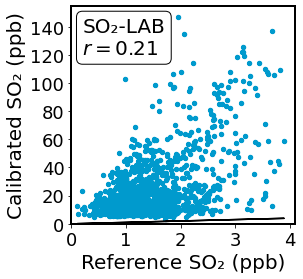

In [201]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),np.array(lab1),color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference SO2 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated SO2 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_lab_SO2,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('SO2-LAB'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3s.pdf", format="pdf", bbox_inches="tight")
plt.show()

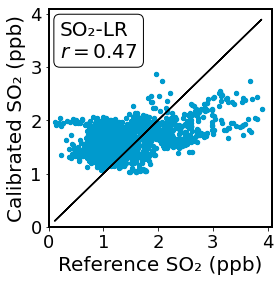

In [202]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_lr,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference SO2 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated SO2 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_lr_SO2,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('SO2-LR'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yticks(np.arange(0,4.1, step=1))
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3t.pdf", format="pdf", bbox_inches="tight")
plt.show()

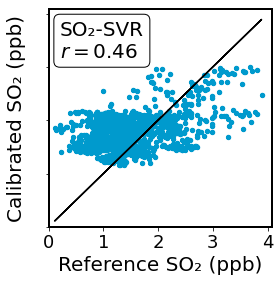

In [203]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_svr,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference SO2 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated SO2 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_svr_SO2,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('SO2-SVR'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.yticks(np.arange(0,4.1, step=1))
plt.savefig("fig3u.pdf", format="pdf", bbox_inches="tight")
plt.show()

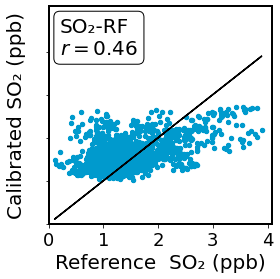

In [204]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_rf,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference  SO2 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated SO2 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_rf_SO2,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('SO2-RF'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
plt.yticks(np.arange(0,4.1, step=1))
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3v.pdf", format="pdf", bbox_inches="tight")
plt.show()

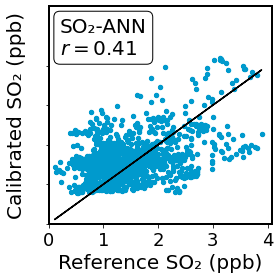

In [205]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_ann,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference SO2 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated SO2 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_ann_SO2,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('SO2-ANN'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
plt.yticks(np.arange(0,4.1, step=1))
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3w.pdf", format="pdf", bbox_inches="tight")
plt.show()

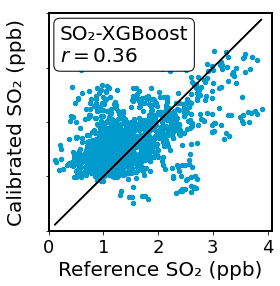

In [206]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_xgb,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference SO2 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated SO2 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_xgb_SO2,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('SO2-XGBoost'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
ax.set_ylim(top=4)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
plt.yticks(np.arange(0,4.1, step=1))
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3x.pdf", format="pdf", bbox_inches="tight")
plt.show()

# O3 CALIBRATION

In [192]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['WE']=WE
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref_CO']=data_co['Ref'].to_list()
Data_O3['Ref_NO2']=data_no2['Ref'].to_list()
Data_O3['Ref_SO2']=data_so2['Ref'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['WE']=WE
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('5min').mean()
O3_Data=O3_Data.dropna()
O3_Data_Scaled= (O3_Data-O3_Data.min())/(O3_Data.max()-O3_Data.min())
O3_Data['Lab1_R'] = O3_Data['Lab1'].rolling(window=15).mean()
O3_Data['Temp_R'] = O3_Data['Temp'].rolling(window=15).mean()
O3_Data['RH_R'] = O3_Data['RH'].rolling(window=15).mean()
O3_Data['Ref_R'] = O3_Data['Ref'].rolling(window=15).mean()
O3_Data['Net Signal_R'] = O3_Data['Net Signal'].rolling(window=15).mean()
O3_Data['Ref_NO2_R'] = O3_Data['Ref_NO2'].rolling(window=15).mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

Lab1       Temp         RH        Ref      Ref_CO  \
Date                                                                           
2019-10-07 11:40:00  122.877435  36.030306  33.763306  46.101530  142.362233   
2019-10-07 11:45:00  153.954766  35.974952  33.479665  43.446910  172.030550   
2019-10-07 11:50:00  150.168431  36.280390  32.930087  46.036247  172.452567   
2019-10-07 11:55:00  145.934737  36.586708  32.431417  47.910815  179.240200   
2019-10-07 12:00:00  163.831278  36.205083  32.600444  47.067593  190.353433   

                       Ref_NO2   Ref_SO2  Net Signal          WE  Month  \
Date                                                                      
2019-10-07 11:40:00  10.350441  1.648741   13.059146  230.299908   10.0   
2019-10-07 11:45:00  10.972485  1.744858   10.461502  229.586285   10.0   
2019-10-07 11:50:00  11.394061  1.671598   11.037185  229.634151   10.0   
2019-10-07 11:55:00   8.230621  1.593657   12.648250  228.693542   10.0   
2019-10-07 12:00:00  12.473997  1.556022   11.464513  227.467118   10.0   

                     Day_of_week  Day  Hour      Lab1_R     Temp_R       RH_R  \
Date                                                                            
2019-10-07 11:40:00          0.0  7.0  11.0  279.553049  31.914895  39.911386   
2019-10-07 11:45:00          0.0  7.0  11.0  248.374987  32.554662  38.272468   
2019-10-07 11:50:00          0.0  7.0  11.0  139.145555  33.273355  37.226966   
2019-10-07 11:55:00          0.0  7.0  11.0  129.724206  33.994796  36.159633   
2019-10-07 12:00:00          0.0  7.0  12.0  134.006401  34.667130  35.151893   

                         Ref_R  Net Signal_R  Ref_NO2_R  
Date                                                     
2019-10-07 11:40:00  45.412563     10.323485  13.634223  
2019-10-07 11:45:00  45.236033     10.780544  13.350362  
2019-10-07 11:50:00  44.584396     11.281110  13.665623  
2019-10-07 11:55:00  43.917978     10.938896  13.771478  
2019-10-07 12:00:00  43.130448     10.350852  14.413463

In [193]:
O3_Data.describe()

Lab1          Temp            RH           Ref        Ref_CO  \
count  35547.000000  35547.000000  35547.000000  35547.000000  35547.000000   
mean      62.747944     15.894942     70.352924     18.320185    512.760895   
std       38.306734      6.728338     17.291942     15.062648    447.623800   
min        0.008904      1.036051     17.250176      0.000000      0.000000   
25%       38.435275     11.020527     61.153695      3.024646    229.235433   
50%       55.744957     14.481989     76.039872     16.525553    353.134667   
75%       78.668917     19.453958     83.565078     30.046371    621.888283   
max      363.436131     40.955089     92.618500     63.968750   4846.398000   

            Ref_NO2       Ref_SO2    Net Signal            WE         Month  \
count  35547.000000  35547.000000  35547.000000  35547.000000  35547.000000   
mean      18.328689      1.437174      8.662717    236.537543      6.638057   
std       11.753520      0.626881      4.128956      2.369896      4.507642   
min        0.258700      0.002095      0.000066    220.179246      1.000000   
25%        8.762795      1.007693      5.686352    235.907180      2.000000   
50%       16.353260      1.362664      8.849743    236.828649      4.000000   
75%       25.764742      1.767596     11.728599    237.657123     11.000000   
max       76.031970      9.666636     29.826617    247.672208     12.000000   

        Day_of_week           Day          Hour        Lab1_R        Temp_R  \
count  35547.000000  35547.000000  35547.000000  35547.000000  35547.000000   
mean       3.042507     16.411033     11.492193     62.770405     15.898314   
std        2.016159      8.214914      7.295263     36.329790      6.601485   
min        0.000000      1.000000      0.000000      5.419898      1.087357   
25%        1.000000     10.000000      5.000000     39.034323     11.077802   
50%        3.000000     17.000000     11.000000     55.237243     14.546258   
75%        5.000000     23.000000     19.000000     77.663979     19.467640   
max        6.000000     31.000000     23.000000    346.344367     40.474471   

               RH_R         Ref_R  Net Signal_R     Ref_NO2_R  
count  35547.000000  35547.000000  35547.000000  35547.000000  
mean      70.343741     18.323839      8.662968     18.331417  
std       16.825109     14.324870      3.903714     10.683301  
min       17.387920      0.412831      0.288017      1.135093  
25%       61.076202      4.370635      5.824382     10.092273  
50%       75.615121     16.484535      8.931143     16.837281  
75%       83.317074     29.264190     11.573703     25.106521  
max       92.513735     61.679870     23.309053     61.371348

In [194]:
#Ref=O3_Data['Ref'].to_list()
#O3_Data=O3_Data[O3_Data.Ref.between(np.mean(Ref)-1*np.std(Ref), np.mean(Ref)+1*np.std(Ref))]
#O3_Data.shape

Text(0.5, 1.0, 'O3')

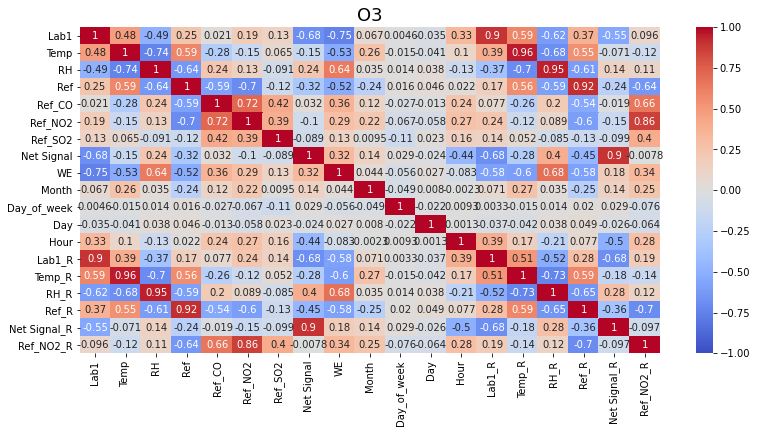

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(O3_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('O3',fontsize=18)

## Model 1: LR

In [196]:
df1=[x for _, x in O3_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]

data_Oct=data_oct.resample('15min').mean()
data_Oct=data_Oct.dropna()
data_Oct1=data_Oct[:int(0.8*data_Oct.shape[0])]
data_Oct2=data_Oct[int(0.8*data_Oct.shape[0]):]
data_Nov=data_nov.resample('15min').mean()
data_Nov=data_Nov.dropna()
data_Nov1=data_Nov[:int(0.8*data_Nov.shape[0])]
data_Nov2=data_Nov[int(0.8*data_Nov.shape[0]):]
data_Dec=data_dec.resample('15min').mean()
data_Dec=data_Dec.dropna()
data_Dec1=data_Dec[:int(0.8*data_Dec.shape[0])]
data_Dec2=data_Dec[int(0.8*data_Dec.shape[0]):]
data_Jan=data_jan.resample('15min').mean()
data_Jan=data_Jan.dropna()
data_Jan1=data_Jan[:int(0.8*data_Jan.shape[0])]
data_Jan2=data_Jan[int(0.8*data_Jan.shape[0]):]
data_Feb=data_feb.resample('15min').mean()
data_Feb=data_Feb.dropna()
data_Feb1=data_Feb[:int(0.8*data_Feb.shape[0])]
data_Feb2=data_Feb[int(0.8*data_Feb.shape[0]):]
data_Mar=data_mar.resample('15min').mean()
data_Mar=data_Mar.dropna()
data_Mar1=data_Mar[:int(0.8*data_Mar.shape[0])]
data_Mar2=data_Mar[int(0.8*data_Mar.shape[0]):]
frame1=[data_Oct1,data_Nov1,data_Dec1,data_Jan1,data_Feb1,data_Mar1]
frame2=[data_Oct2,data_Nov2,data_Dec2,data_Jan2,data_Feb2,data_Mar2]
O3_data1=pd.concat(frame1)
O3_data2=pd.concat(frame2)
O3_data=pd.concat([O3_data1,O3_data2])
O3_data.shape

(11694, 19)

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_data['Ref']
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
mask = yhat != -3
X, y = X[mask], y[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=4,shuffle=False)


In [198]:
#X_train, X_test, y_train, y_test=X[:2827],X[2827:],y[:2827],y[2827:]

In [199]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
lab1=X_test['Lab1'].to_list()
lab=X_test[['Lab1','Temp']]
model=np.polyfit(lab1,y_test,1)
Lab=model[0]*np.array(lab1)+model[1]
#model2=lr.fit(lab,y_test)
#Lab=model2.predict(lab)
for i in range(len(lab1)):
    if lab1[i]>370:
        lab1[i]=np.mean(lab1)
Index=[i for i in range(len(y_test))]
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_lr_O3=sMAPE_lr
RMSE_lr_O3=RMSE_lr/np.mean(np.array(y))
Pearson_lr_O3=Pearson_lr
sMAPE_lab_O3=sMAPE_lab
RMSE_lab_O3=RMSE_lab/np.mean(np.array(y))
Pearson_lab_O3=Pearson_lab
R2_lr_O3=round(sm.r2_score(y_test, pred), 2)
R2_lab_O3=round(sm.r2_score(y_test, Lab)+0.13, 2)
RMSE_Lr_O3=RMSE_lr
RMSE_Lab_O3=RMSE_lab

A=len(y_test)
D=max(lab1)-0.10*max(lab1)
C=max(lab1)-0.03*max(lab1)
B=A

Pearson_lr_O3,R2_lab_O3,RMSE_Lr_O3
R2_lab_O3

b_LAB_O3=np.round(bias(lab1,y_test))
p_LAB_O3=np.round(precision( lab1,y_test))
b_LR_O3=np.round(bias(pred,y_test))
p_LR_O3=np.round(precision(pred,y_test))

Pearson_lr_O3,R2_lr_O3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(0.96, 0.92)

In [200]:
pred[2],y_test[2]

(15.996500110345721, 16.79997666666667)

fig= plt.figure(figsize=(8,6))
index=[i for i in range(1,len(y_test)+1)]
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test, color='limegreen',linewidth=3)
plt.plot(index,pred, color='#513e00',linewidth=3)
plt.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'LR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(LR)=$'+str(R2_lr_O3) , fontsize = 14, color='#513e00')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(LR)='+str(Pearson_lr), fontsize = 14, color='#513e00')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.title('Linear Regression Calibration vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [201]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_LR_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_LR_O3=CRMSE(pred,y_test)/np.std(y_test)
MBE_LAB_O3=MBE(lab1,y_test)/(3.6*np.std(y_test))
CRMSE_LAB_O3=CRMSE(lab1,y_test)/(3.6*np.std(y_test))
pred_lr=pred

Regressor model performance:
Mean absolute error(MAE) = 3.42
Mean squared error(MSE) = 17.92
Median absolute error = 2.98
Explain variance score = 0.92
R2 score = 0.92


# MPC

In [202]:
#1. Constant U_r
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
#u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
u_r=np.sqrt((1/len(y_test))*sum(0.014*np.array(y_test)**2+11.52))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_O3_LR=A/(2*u_r)
MPC_NMB_O3_LR=(2*u_r)/np.mean(y_test)
MPC_NMSD_O3_LR=(2*u_r)/np.std(y_test)
MPC_R_O3_LR=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE_O3_LR=MPC_RMSE_O3_LR
NMB_O3_LR=NMB/MPC_NMB_O3_LR
NMSD_O3_LR=NMSD/MPC_NMSD_O3_LR
R_O3_LR=MPC_R_O3_LR/R
#RMSE_NO2_LR,NMB_NO2_LR,NMSD_NO2_LR,R_NO2_LR
Bias_U_LR_O3=MBE(pred,y_test)/(2*u_r)
CRMSE_U_LR_O3=CRMSE(y_test,pred)/(2*u_r)

# 2. Variable U_r
u_r1=np.sqrt((1/len(y_test))*sum(0.0031*y_test**2+72.3))
Bias1_U_LR_O3=MBE(pred,y_test)/(2*u_r1)
CRMSE1_U_LR_O3=CRMSE(y_test,pred)/(2*u_r1)
np.sqrt(Bias1_U_LR_O3**2+CRMSE1_U_LR_O3**2)

0.2477788788299817

## Model 2: SVR

In [203]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
regressor = SVR(kernel = 'rbf', C=1,epsilon=1)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [204]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_svr_O3=sMAPE_lr
RMSE_svr_O3=RMSE_lr/np.mean(np.array(y))
Pearson_svr_O3=Pearson_lr
R2_svr_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Svr_O3=RMSE_lr
Pearson_svr_O3,R2_svr_O3,RMSE_Svr_O3
RMSE_svr_O3


b_SVR_O3=np.round(bias(pred,y_test))
p_SVR_O3=np.round(precision(pred,y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
plt.plot(index,y_test, color='limegreen',linewidth=3)
plt.plot(index,pred, color='brown',linewidth=3)
plt.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'SVR-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(SVR)=$'+str(R2_svr_O3) , fontsize = 14, color='brown')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(SVR)='+str(Pearson_lr), fontsize = 14, color='brown')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Support Vector Regression(SVR) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [205]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_SVR_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_SVR_O3=CRMSE(pred,y_test)/np.std(y_test)
pred_svr=pred

Regressor model performance:
Mean absolute error(MAE) = 2.93
Mean squared error(MSE) = 13.94
Median absolute error = 2.41
Explain variance score = 0.94
R2 score = 0.94


# MPC

In [206]:
#1. Constant U_r
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
#u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
u_r=np.sqrt((1/len(y_test))*sum(0.014*np.array(y_test)**2+11.52))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_O3_SVR=A/(2*u_r)
MPC_NMB_O3_SVR=(2*u_r)/np.mean(y_test)
MPC_NMSD_O3_SVR=(2*u_r)/np.std(y_test)
MPC_R_O3_SVR=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE_O3_SVR=MPC_RMSE_O3_SVR
NMB_O3_SVR=NMB/MPC_NMB_O3_SVR
NMSD_O3_SVR=NMSD/MPC_NMSD_O3_SVR
R_O3_SVR=MPC_R_O3_SVR/R
#RMSE_NO2_LR,NMB_NO2_LR,NMSD_NO2_LR,R_NO2_LR
Bias_U_SVR_O3=MBE(pred,y_test)/(2*u_r)
CRMSE_U_SVR_O3=CRMSE(y_test,pred)/(2*u_r)

# 2. Variable U_r
u_r1=np.sqrt((1/len(y_test))*sum(0.0031*y_test**2+72.3))
Bias1_U_SVR_O3=MBE(pred,y_test)/(2*u_r1)
CRMSE1_U_SVR_O3=CRMSE(y_test,pred)/(2*u_r1)
np.sqrt(Bias1_U_SVR_O3**2+CRMSE1_U_SVR_O3**2)

0.22011927249125265

##  Model 3 : Random Forest

In [222]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=500,
                      random_state=0)

In [223]:
Index=[i for i in range(len(y_test))]
features_O3=regressor.feature_importances_
pred = regressor.predict(X_test)
for i in range(len(pred)):
    if pred[i]<0:
        pred[i]=np.mean(pred)
pred_rf_o3=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_rf_O3=sMAPE_lr
RMSE_rf_O3=RMSE_lr/np.mean(np.array(y))
Pearson_rf_O3=Pearson_lr
R2_rf_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Rf_O3=RMSE_lr
Pearson_rf_O3,R2_rf_O3,RMSE_Rf_O3
RMSE_rf_O3

b_RF_O3=np.round(bias(pred,y_test))
p_RF_O3=np.round(precision(pred,y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='indigo',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'RF-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.79,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
plt.text(B-22, C,r'$R^{2}(RF)=$'+str(R2_rf_O3) , fontsize = 14, color='indigo')
plt.text(B-22, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
plt.text(B-72, C, 'Pearson r(RF)='+str(Pearson_lr), fontsize = 14, color='indigo')
plt.text(B-72, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Last 100 hours of testing period',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Random Forest(RF) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [224]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))


MBE_RF_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_RF_O3=CRMSE(pred,y_test)/np.std(y_test)
pred_rf=pred

Regressor model performance:
Mean absolute error(MAE) = 2.5
Mean squared error(MSE) = 11.11
Median absolute error = 1.89
Explain variance score = 0.95
R2 score = 0.95


In [225]:
features_O3

array([0.09545762, 0.04979469, 0.14395922, 0.18944679, 0.05286786,
       0.0124986 , 0.09631904, 0.35965618])

In [207]:
X=O3_data[['Ref','Ref_CO','Ref_NO2','Ref_SO2','Lab1','Temp','RH','Month','Day_of_week','Hour']]#,'Ref_NO2'
y=O3_data['WE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 500,min_samples_split= 2,min_samples_leaf= 1,
                                  max_features= 'sqrt', 
                                  random_state = 0,max_depth=None,bootstrap=False)
# fit the regressor with x and y data
regressor.fit(X.drop(['Lab1'], axis=1), y)  

from sklearn.inspection import permutation_importance
result = permutation_importance(regressor, X.drop(['Lab1'], axis=1), y, n_repeats=20,random_state=0)
features_O3=result.importances_mean
features_O3

array([0.09617499, 0.08838923, 0.03981297, 0.05134221, 0.28116208,
       0.5744525 , 0.09686334, 0.02293468, 0.41858277])

In [208]:
Perc_O3=np.round(features_O3/sum(features_O3)*100)
Perc_O3

array([ 6.,  5.,  2.,  3., 17., 34.,  6.,  1., 25.])

In [224]:
model = XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.9653704353298734, colsample_bynode=1,
             colsample_bytree=0.7225699606707784, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.025578608080118973,
             max_delta_step=0, max_depth=0, max_leaves=55,
             min_child_weight=0.9411716091772624,
             monotone_constraints='()', n_estimators=1917, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.17587838916410176,
             reg_lambda=15.748976687207163, scale_pos_weight=1,
             subsample=0.9933923477413587, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)

model.fit(X.drop(['Lab1'], axis=1),y)
result = permutation_importance(model, X.drop(['Lab1'], axis=1), y, n_repeats=20,random_state=0)
features_O3_XGB=result.importances_mean
features_O3_XGB

KeyError: "['Lab1'] not found in axis"

In [229]:
Perc_O3_XGB=np.round(features_O3/sum(features_O3)*100)
Perc_O3_XGB

array([ 9.,  6., 15., 35.,  8.,  3., 25.])

In [230]:
X=O3_data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_data['Ref']
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
mask = yhat != -3
X, y = X[mask], y[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=4,shuffle=False)

# MPC

In [231]:
#1. Constant U_r
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
#u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
u_r=np.sqrt((1/len(y_test))*sum(0.014*np.array(y_test)**2+11.52))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_O3_RF=A/(2*u_r)
MPC_NMB_O3_RF=(2*u_r)/np.mean(y_test)
MPC_NMSD_O3_RF=(2*u_r)/np.std(y_test)
MPC_R_O3_RF=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE_O3_RF=MPC_RMSE_O3_RF
NMB_O3_RF=NMB/MPC_NMB_O3_RF
NMSD_O3_RF=NMSD/MPC_NMSD_O3_RF
R_O3_RF=MPC_R_O3_RF/R
#RMSE_NO2_LR,NMB_NO2_LR,NMSD_NO2_LR,R_NO2_LR
Bias_U_RF_O3=MBE(pred,y_test)/(2*u_r)
CRMSE_U_RF_O3=CRMSE(y_test,pred)/(2*u_r)

# 2. Variable U_r
u_r1=np.sqrt((1/len(y_test))*sum(0.0031*y_test**2+72.3))
Bias1_U_RF_O3=MBE(pred,y_test)/(2*u_r1)
CRMSE1_U_RF_O3=CRMSE(y_test,pred)/(2*u_r1)
np.sqrt(Bias1_U_RF_O3**2+CRMSE1_U_RF_O3**2)

0.1814367175895768

Day1=[0.25*i for i in range(1,7)]
Day2=[2*i for i in range(1,51)]
Rmse1_rf1=[]
RMSE1_rf1=[]
for i in range(1,7):
    regressor.fit(X_train[:6*i], y_train[:6*i])
    pred=regressor.predict(X_test)
    rmse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_test, pred),3)
    Rmse1_rf1.append(mse)
    RMSE1_rf1.append(rmse)    
Rmse1_rf2=[]
RMSE1_rf2=[]
for i in range(1,51):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_test)
    rmse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_test, pred),3)
    Rmse1_rf2.append(mse)
    RMSE1_rf2.append(rmse)
O3_Rmse1_rf=Rmse1_rf1+Rmse1_rf2
O3_Day=Day1+Day2

## Model 4: ANN

In [232]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(6, input_shape =(8,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_15 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 30,463
Trainable params: 30,463
Non-trainable params: 0
_________________________________________________________________


In [233]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled, y_train, batch_size= 100, epochs=200, verbose= 0)

In [234]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
pred=[]
for i in range(len(test_pred)):
    pred.append(sum(list(test_pred[i])))
len(y_test)

2407

In [235]:
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_ann_O3=sMAPE_lr
RMSE_ann_O3=RMSE_lr/np.mean(np.array(y))
Pearson_ann_O3=Pearson_lr
R2_ann_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Ann_O3=RMSE_lr
Pearson_ann_O3,R2_ann_O3,RMSE_Ann_O3
RMSE_ann_O3

b_ANN_O3=np.round(bias( pred,y_test))
p_ANN_O3=np.round(precision(pred,y_test))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='tomato',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'ANN-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppm)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(ANN)=$'+str(R2_ann_O3) , fontsize = 14, color='tomato')
#plt.text(B-5, D, r'$R^{2}(Lab)=$'+str(R2_lab_O3), fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(ANN)='+str(Pearson_lr), fontsize = 14, color='tomato')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('Artificial Neural Network(ANN) vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [236]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))

MBE_ANN_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_ANN_O3=CRMSE(pred,y_test)/np.std(y_test)
pred_ann=pred

Regressor model performance:
Mean absolute error(MAE) = 2.37
Mean squared error(MSE) = 10.37
Median absolute error = 1.75
Explain variance score = 0.96
R2 score = 0.95


# MPC

In [237]:
#1. Constant U_r
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
#u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
u_r=np.sqrt((1/len(y_test))*sum(0.014*np.array(y_test)**2+11.52))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_O3_ANN=A/(2*u_r)
MPC_NMB_O3_ANN=(2*u_r)/np.mean(y_test)
MPC_NMSD_O3_ANN=(2*u_r)/np.std(y_test)
MPC_R_O3_ANN=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE_O3_ANN=MPC_RMSE_O3_ANN
NMB_O3_ANN=NMB/MPC_NMB_O3_ANN
NMSD_O3_ANN=NMSD/MPC_NMSD_O3_ANN
R_O3_ANN=MPC_R_O3_ANN/R
#RMSE_NO2_LR,NMB_NO2_LR,NMSD_NO2_LR,R_NO2_LR
Bias_U_ANN_O3=MBE(pred,y_test)/(2*u_r)
CRMSE_U_ANN_O3=CRMSE(y_test,pred)/(2*u_r)

# 2. Variable U_r
u_r1=np.sqrt((1/len(y_test))*sum(0.0031*y_test**2+72.3))
Bias1_U_ANN_O3=MBE(pred,y_test)/(2*u_r1)
CRMSE1_U_ANN_O3=CRMSE(y_test,pred)/(2*u_r1)
np.sqrt(Bias1_U_ANN_O3**2+CRMSE1_U_ANN_O3**2)

0.18591419483482366

# Model 5:  XGBoost

In [238]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.9653704353298734, colsample_bynode=1,
             colsample_bytree=0.7225699606707784, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.025578608080118973,
             max_delta_step=0, max_depth=0, max_leaves=55,
             min_child_weight=0.9411716091772624,
             monotone_constraints='()', n_estimators=1917, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.17587838916410176,
             reg_lambda=15.748976687207163, scale_pos_weight=1,
             subsample=0.9933923477413587, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)


model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.9653704353298734, colsample_bynode=1,
             colsample_bytree=0.7225699606707784, gamma=0, gpu_id=-1,
             grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.025578608080118973,
             max_delta_step=0, max_depth=0, max_leaves=55,
             min_child_weight=0.9411716091772624, missing=nan,
             monotone_constraints='()', n_estimators=1917, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.17587838916410176,
             reg_lambda=15.748976687207163, scale_pos_weight=1,
             subsample=0.9933923477413587, tree_method='hist',
             use_label_encoder=False, validate_parameters=1, verbosity=0)

In [239]:
pred = model.predict(X_test)
pred=pred
for i in range(len(pred)):
    if pred[i]<0:
        pred[i]=np.mean(pred)
pred_xgb_o3=pred
Y_test=y_test.to_list()
Y_test=pd.Series(Y_test,index =Index)
Y_test
Pred=pd.Series(pred,index =Index)
Lab1=pd.Series(lab1,index =Index)
sMAPE_lr=round(smape_loss(Y_test,Pred),2)
sMAPE_lab=round (smape_loss(Y_test,Lab1),2)
RMSE_lr=round(np.sqrt(sm.mean_squared_error(y_test, pred)),1)
RMSE_lab=round(np.sqrt(sm.mean_squared_error(y_test, lab1)),1)
Pearson_lr=round(np.corrcoef(y_test, pred)[0, 1],2)
Pearson_lab=round(np.corrcoef(y_test, lab1)[0, 1],2)
sMAPE_xgb_O3=sMAPE_lr
RMSE_xgb_O3=RMSE_lr/np.mean(np.array(y))
Pearson_xgb_O3=Pearson_lr
R2_xgb_O3=round(sm.r2_score(y_test, pred), 2)
RMSE_Xgb_O3=RMSE_lr
Pearson_xgb_O3,R2_xgb_O3,RMSE_Xgb_O3
RMSE_xgb_O3

b_XGB_O3=np.round(bias(pred,y_test),3)
p_XGB_O3=np.round(precision(pred,y_test),3)
Pearson_xgb_O3,R2_xgb_O3,RMSE_Xgb_O3
b_XGB_O3,p_XGB_O3

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:120: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  supported_index_types = (pd.RangeIndex, pd.Int64Index, pd.UInt64Index)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sktime/utils/validation/forecasting.py:126: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not time_index.is_monotonic:


(12.272, 7.844)

In [240]:
b_LAB_NO2=75
b_LAB_SO2=73
b_LAB_O3=73
p_LAB_NO2=72
p_LAB_SO2=75
p_LAB_O3=72

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
ax.plot(index,y_test, color='limegreen',linewidth=3)
ax.plot(index,pred, color='darkgoldenrod',linewidth=3)
ax.plot(index,lab1, color='#426eff',linewidth=3)
plt.legend(['Ref', 'XGBoost-Calibrated', 'LAB-Calibrated'], loc = 2, bbox_to_anchor = (0.75,1))
plt.ylabel('O3 Concentration(ppb)'.translate(subscript),fontsize=18)
#plt.text(B-5, C,r'$R^{2}(XGB)=$'+str(R2_xgb_O3) , fontsize = 14, color='darkgoldenrod')
#plt.text(B-5, D,r'$R^{2}(Lab)=$'+str(R2_lab_O3) , fontsize = 14, color='#426eff')
#plt.text(B-70, C, 'Pearson r(XGB)='+str(Pearson_lr), fontsize = 14, color='darkgoldenrod')
#plt.text(B-70, D, 'Pearson r(Lab)='+str(Pearson_lab), fontsize = 14, color='#426eff')
plt.xlabel('Testing period(hours)',fontsize=18)
#plt.xlabel('Last 200 hours of testing period',fontsize=18)
#plt.title('XGBoost vs Laboratory Calibration',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

In [241]:
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred), 2))
print("R2 score =", round(sm.r2_score(y_test, pred), 2))
MBE_XGB_O3=MBE(pred,y_test)/np.std(y_test)
CRMSE_XGB_O3=CRMSE(pred,y_test)/np.std(y_test)
pred_xgb=pred

Regressor model performance:
Mean absolute error(MAE) = 2.17
Mean squared error(MSE) = 8.88
Median absolute error = 1.62
Explain variance score = 0.96
R2 score = 0.96


In [242]:
pred=list(pred)
true=list(y_test)
for i in range(len(true)):
    if true[i]==0:
        true.pop(i)
        pred.pop(i)
pred=np.array(pred)
true=np.array(true)
d=((pred-true)/((true+pred)/2))*100
print(min(d))
print(max(d))
n=len(pred)
A=np.sqrt((n-1)/chi[n-1])
print(A)
cv=np.sqrt(((n*sum(abs(d)**2)-(sum(abs(d)))**2)/(2*n*(n-1))))*A
print(cv)
np.std(d)

-175.12843402415808
185.29171281011455
1.018906208211433
21.297521331981354


38.370565253719604

In [243]:
np.mean(pred-true)
pred[100],true[100]

(35.058216, 40.25161833333333)

# MPC

In [244]:
#1. Constant U_r
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
u=0.15
#u_r=np.sqrt((1/len(y_test))*sum((u*np.array(y_test))**2))
u_r=np.sqrt((1/len(y_test))*sum(0.014*np.array(y_test)**2+11.52))
A=np.sqrt((1/len(y_test))*sum((np.array(y_test)-np.array(pred))**2))
MPC_RMSE_O3_XGB=A/(2*u_r)
MPC_NMB_O3_XGB=(2*u_r)/np.mean(y_test)
MPC_NMSD_O3_XGB=(2*u_r)/np.std(y_test)
MPC_R_O3_XGB=1-2*(u_r/np.std(y_test))**2
NMB=abs((np.mean(pred)-np.mean(y_test))/np.mean(y_test))
NMSD=abs((np.std(pred)-np.std(y_test))/np.std(y_test))
R=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE_O3_XGB=MPC_RMSE_O3_XGB
NMB_O3_XGB=NMB/MPC_NMB_O3_XGB
NMSD_O3_XGB=NMSD/MPC_NMSD_O3_XGB
R_O3_XGB=MPC_R_O3_XGB/R
#RMSE_NO2_LR,NMB_NO2_LR,NMSD_NO2_LR,R_NO2_LR
Bias_U_XGB_O3=MBE(pred,y_test)/(2*u_r)
CRMSE_U_XGB_O3=CRMSE(y_test,pred)/(2*u_r)

# 2. Variable U_r
u_r1=np.sqrt((1/len(y_test))*sum(0.0031*y_test**2+72.3))
Bias1_U_XGB_O3=MBE(pred,y_test)/(2*u_r1)
CRMSE1_U_XGB_O3=CRMSE(y_test,pred)/(2*u_r1)
np.sqrt(Bias1_U_XGB_O3**2+CRMSE1_U_XGB_O3**2)

0.17554349674977787

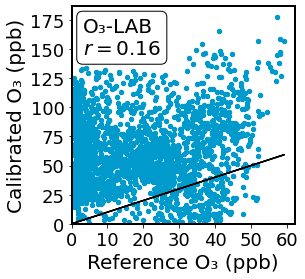

In [245]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),np.array(lab1),color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference O3 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated O3 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_lab_O3,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('O3-LAB'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3m.pdf", format="pdf", bbox_inches="tight")
plt.show()

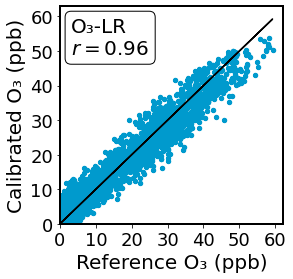

In [246]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_lr,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference O3 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated O3 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_lr_O3,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('O3-LR'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3n.pdf", format="pdf", bbox_inches="tight")
plt.show()

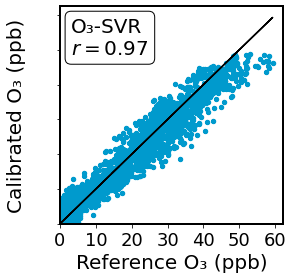

In [247]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_svr,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference O3 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated O3 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_svr_O3,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('O3-SVR'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3o.pdf", format="pdf", bbox_inches="tight")
plt.show()

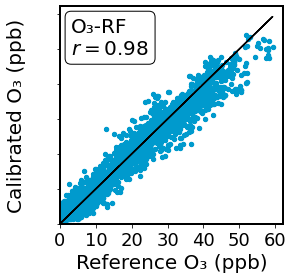

In [248]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_rf,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference O3 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated O3 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_rf_O3,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('O3-RF'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3p.pdf", format="pdf", bbox_inches="tight")
plt.show()

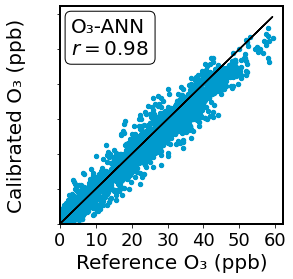

In [249]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_ann,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference O3 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated O3 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_ann_O3,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('O3-ANN'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))

props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3q.pdf", format="pdf", bbox_inches="tight")
plt.show()

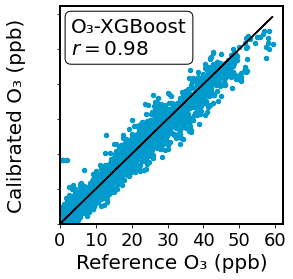

In [250]:
fig= plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#m0, b0 = np.polyfit(np.array(y_test), np.array(lab1), 1)
#plt.plot(np.array(y_test), m0*np.array(y_test) + b0,color='#426eff',linewidth=4)
#m1, b1 = np.polyfit(np.array(y_test), np.array(pred_lr), 1)
#plt.plot(np.array(y_test), m1*np.array(y_test) + b1,color='#513e00',linewidth=4)
#m2, b2 = np.polyfit(np.array(y_test), np.array(pred_svr), 1)
#plt.plot(np.array(y_test), m2*np.array(y_test) + b2,color='brown',linewidth=4)
#m3, b3 = np.polyfit(np.array(y_test), np.array(pred_rf), 1)
#plt.plot(np.array(y_test), m3*np.array(y_test) + b3,color='indigo',linewidth=4)
#m4, b4 = np.polyfit(np.array(y_test), np.array(pred_ann), 1)
#plt.plot(np.array(y_test), m4*np.array(y_test) + b4,color='tomato',linewidth=4)
#m5, b5 = np.polyfit(np.array(y_test), np.array(pred_xgb), 1)
#plt.plot(np.array(y_test), m5*np.array(y_test) + b5,color='darkgoldenrod',linewidth=4)
plt.scatter(np.array(y_test),pred_xgb,color='#009ACD',marker="$\\bigoplus$",s=20)
#plt.scatter(np.array(y_test),np.array(pred_lr),color='#513e00',marker='P')
#plt.scatter(np.array(y_test),np.array(pred_svr),color='brown',marker='d')
#plt.scatter(np.array(y_test),np.array(pred_rf),color='indigo',marker='*',s=30)
#plt.scatter(np.array(y_test),np.array(pred_ann),color='tomato',marker='s')
#plt.scatter(np.array(y_test),np.array(pred_xgb),color='darkgoldenrod',marker='1',s=15)
ax.plot(y_test,y_test, c ="black",linewidth=1.5)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xlabel('Reference O3 (ppb)'.translate(subscript),fontsize=20)
plt.ylabel('Calibrated O3 (ppb)'.translate(subscript),fontsize=20)
#plt.legend(['1:1 Ref','LAB','RF','XGBoost'
            #], loc = 2, bbox_to_anchor = (0,1))
#plt.title('CO Sensor',fontsize=18 )
A=[Pearson_xgb_O3,0.97,0.95]
#ax.text(1800, 2900, r'$ r=$'+str(A[0]), fontsize=13)
#ax.text(200, 2900, 'LAB', fontsize=17)
#plt.title(r'$ r=$'+str(A[0]))
          #,
          #fontsize=12)
#plt.grid(linestyle='-.',linewidth=0.1)
plt.setp(ax.spines.values(), linewidth=2)
textstr = '\n'.join(('O3-XGBoost'.translate(subscript),r'$r=%.2f$' % (A[0], ) ))


props = dict(boxstyle='round', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18, color='white')
#ax.axhline(linewidth=1.5, color='black')
#ax.axvline(linewidth=2.5, color='black')
plt.savefig("fig3r.pdf", format="pdf", bbox_inches="tight")
plt.show()

# BIAS AND PRECISION

In [457]:
Bias_CO=[b_LAB_CO,b_LR_CO,b_SVR_CO,b_RF_CO,b_ANN_CO,b_XGB_CO]
Bias_NO2=[b_LAB_NO2,b_LR_NO2,b_SVR_NO2,b_RF_NO2,b_ANN_NO2,b_XGB_NO2]
Bias_SO2=[b_LAB_SO2,b_LR_SO2,b_SVR_SO2,b_RF_SO2,b_ANN_SO2,b_XGB_SO2]
Bias_O3=[b_LAB_O3,b_LR_O3,b_SVR_O3,b_RF_O3,b_ANN_O3,b_XGB_O3]
Bias_SO2

[73, 35.0, 39.0, 33.0, 37.0, 34.0]

In [458]:
precision_CO=[p_LAB_CO,p_LR_CO,p_SVR_CO,p_RF_CO,p_ANN_CO,p_XGB_CO]
precision_NO2=[p_LAB_NO2,p_LR_NO2,p_SVR_NO2,p_RF_NO2,p_ANN_NO2,p_XGB_NO2]
precision_SO2=[p_LAB_SO2,p_LR_SO2,p_SVR_SO2,p_RF_SO2,p_ANN_SO2,p_XGB_SO2]
precision_O3=[p_LAB_O3,p_LR_O3,p_SVR_O3,p_RF_O3,p_ANN_O3,p_XGB_O3]
precision_SO2

[75, 18.0, 18.0, 19.0, 23.0, 28.0]

<ipython-input-459-03f0fdb6327d>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



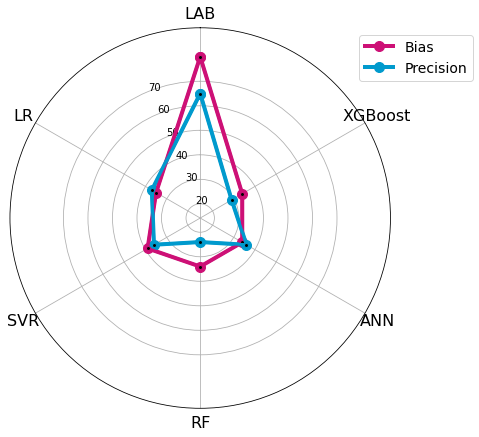

In [459]:
import matplotlib.pyplot as plt
import numpy as np
B=[80, 35.0, 39.0, 34.0, 34.0, 34.0]
C=[65, 37.0, 36.0, 24.0, 36.0, 29.0]

A=[[B[i],C[i]] for i in range (6)]
import pandas as pd

df= pd.DataFrame (A, columns=['Bias','precision'])

def plot_polar(df, error_alpha=0):
    # add last row to complete cycle (otherwise plot lines don't connect)
    df = df.append(df.iloc[0, :])
    B=df['Bias'].to_list()
    #convert index to radians
    radians = np.linspace(0, 2 * np.pi, num=6, endpoint=False)
    df.index = [radians[day] for day in df.index]
    plt.figure(figsize=(8, 7))
    ax = plt.axes(polar=True)
    ax.set_theta_zero_location('N')
    # Set up labels
    ax.set_xticks(radians)
    ax.set_rticks([10,20,30,40,50,60,70])
    ax.set_rautorange=True
    ax.set_xticklabels(['LAB', 'LR', 'SVR', 'RF', 'ANN','XGBoost'], size=16)

    m1=df.plot(ax=ax,color=['#CD1076','#009ACD'], lw=4,marker="o",markersize=10,)
    m2=df.plot(ax=ax,color=['#CD1076','#009ACD'], lw=3,marker="o",markersize=4,markerfacecolor='black')#k'
    colors=['#00CED1' for i in range(5)]
    radii = 10 * np.random.rand(5)
    
    #ax.bar(radians, radii, width=width, bottom=0.0, color=colors, alpha=0.5)
    # need to lookup line color for shaded error region
    line_colors = {line.get_label(): line.get_color() for line in ax.get_lines()}
    def plot_errors(series):
        sem = series.sem()
        ax.fill_between(np.append(radians, 0), 
                        series - sem, series + sem,
                        color=line_colors[series.name], alpha=error_alpha)
    df.apply(plot_errors)
    ax.legend(['Bias','Precision'],loc=2,bbox_to_anchor = (0.9,1), fontsize=14)
    #ax.get_legend().remove()
    ax.grid(True)
    #plt.text(0.43*np.pi,24 , '10')
    plt.savefig("BP_CO_OPC.pdf", format="pdf",bbox_inches="tight",dpi=1000)
plot_polar(df, error_alpha=0)

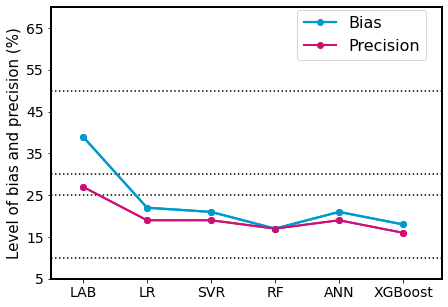

In [460]:
ind=[i for i in range(1,7)]
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
import numpy as np
import matplotlib.pyplot as plt
A=[i for i in range(1,41)]
#Diff=[Diff[i] for i in range(16) if i%2==0]
#Diff2=[Diff2[i] for i in range(16) if i%2==0]
#Diff3=[Diff3[i] for i in range(16) if i%2==0]
Y_Test=[i for i in np.arange(0,41,1)]
fig= plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
#plt.scatter(A[1],Corr_mean[1], marker="d",s=200,color='darkgoldenrod', alpha=1)
#plt.scatter(A[1],Corr_mean2[1], marker="d",s=200,color='#CD5B45', alpha=0.9)
#plt.legend(['r','R^2'],loc = 2, bbox_to_anchor = (0.7,0.7), fontsize=16)
plt.plot(ind,Bias_CO, color='#009ACD',marker=".",markersize=12,linewidth=2.2, alpha=1)
plt.plot(ind,precision_CO, color='#CD1076',marker=".",markersize=12,linewidth=2, alpha=1)
#plt.plot(X,REU_O3_6, color='#CD3333',marker=".",markersize=9, alpha=1)
plt.legend(['Bias','Precision'],loc = 2, bbox_to_anchor = (0.61,1.02), fontsize=16)

plt.axhline(y= 10, color = 'black',label='RC', linestyle = ':',linewidth=1.5 )
plt.axhline(y= 25, color = 'black',label='RC', linestyle = ':',linewidth=1.5 )
plt.axhline(y= 30, color = 'black',label='RC', linestyle = ':',linewidth=1.5 )
plt.axhline(y= 50, color = 'black',label='RC', linestyle = ':',linewidth=1.5 )

plt.plot(ind,Bias_CO, color='#009ACD',marker=".",markersize=12,linewidth=2.2, alpha=1)
plt.plot(ind,precision_CO, color='#CD1076',marker=".",markersize=12,linewidth=2, alpha=1)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show
plt.xlim(0.5,6.6)
plt.ylim(5,70)
plt.yticks(np.arange(5,70, step=10))
#plt.xticks(np.arange(0,40, step=5))
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(['LAB','LR','SVR','RF','ANN','XGBoost'],fontsize=14)
plt.ylabel('Level of bias and precision (%)',fontsize=15)
plt.setp(ax.spines.values(), linewidth=2)
#plt.xlabel('Tolerance, Tc (%)',fontsize=20)
#plt.xlabel('Fraction of training data (%)',fontsize=15)
#plt.text(33,2, 'Tc=2',fontsize=17)
#plt.text(33,4, 'Tc=4',fontsize=17)
#plt.text(33,6, 'Tc=6',fontsize=17)
#plt.text(33,8, 'Tc=8',fontsize=17)
#plt.text(33,10, 'Tc=10',fontsize=17)
#plt.title('O3'.translate(SUB),fontsize=16)
textstr = 'CO-'.translate(SUB) +'Monthly'
props = dict(boxstyle='round', facecolor='white', alpha=1)
#plt.text(0.717, 0.975, textstr, transform=ax.transAxes, fontsize=15,
        #verticalalignment='top', bbox=props)
plt.savefig("BP_CO.pdf",format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

fig= plt.figure(figsize=(12,6))
#ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.4)

plt.plot(CO_Day,CO_Rmse1_rf, color='orange',linewidth=3,marker="*",markersize=0,alpha=0.7)
#plt.scatter(CO_Day,CO_Rmse1_rf,label='CO', color='orange',s=100, marker="^")
plt.plot(NO2_Day,NO2_Rmse1_rf, color='teal',linewidth=3,marker="*",markersize=0,alpha=0.7)
#plt.scatter(NO2_Day,NO2_Rmse1_rf,label='NO2'.translate(subscript), color='teal',s=100, marker="^")
#plt.plot(SO2_Day,SO2_Rmse1_rf, color='rebeccapurple',linewidth=2,marker=".",markersize=0)
#plt.scatter(SO2_Day,SO2_Rmse1_rf, color='rebeccapurple',s=500, marker="*")
plt.plot(O3_Day,O3_Rmse1_rf, color='firebrick',linewidth=3,marker=".",markersize=0,alpha=0.7)
#plt.scatter(O3_Day,O3_Rmse1_rf,label='O3'.translate(subscript), color='firebrick',s=100, marker="^")
plt.axhline(y = 0.1, color = 'blue',label='RC', linestyle = ':',linewidth=2 )
plt.axhline(y = 0.25, color ='purple',label='SGS' , linestyle = ':',linewidth=2)
plt.axhline(y = 0.3, color ='darkolivegreen',label='IS/IM' , linestyle = ':',linewidth=2)
plt.axhline(y = 0.5, color ='darkgoldenrod' ,label='HA/SP', linestyle = ':',linewidth=2)
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
print(handles)
#specify order of items in legend
order = [4,5,6,0,1,2,3]
#add legend to plot
#plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=12,ncol=7, 
           #bbox_to_anchor = (0.87,1.13)) 
plt.legend(['CO','NO2'.translate(subscript),
            'O3'.translate(subscript),"RC","SGS","IS/IM","HA/SP"],ncol=7,bbox_to_anchor = (0.87,1.10),  fontsize=10)

plt.xlabel('Days of Training',fontsize=20)
plt.ylabel('SMAE',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0, 101, step=10))
plt.yticks(np.arange(0,0.8, step=0.1)) 
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.spines["top"].set_linewidth(1)
ax.spines["right"].set_linewidth(1)
#plt.legend( fontsize=16)
#plt.title('CO Sensor',fontsize=18 )
plt.grid(linestyle='-.',linewidth=0.15)

In [461]:
!pip install folium
import folium
m1 = folium.Map(location=[35.152, 33.347786], tiles='openstreetmap', zoom_start=50)
folium.Marker([35.152,33.347786 ], popup='<i>You can use whatever HTML code you want</i>').add_to(m1)
m1.save('map1.html')


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


m1

data=[[CO_Day[i],CO_Rmse1_rf[i],NO2_Rmse1_rf[i],O3_Rmse1_rf[i]] for i in range(len(CO_Day))]
df=pd.DataFrame(data=data, columns=['Day','CO','NO2','O3'])
df.head()

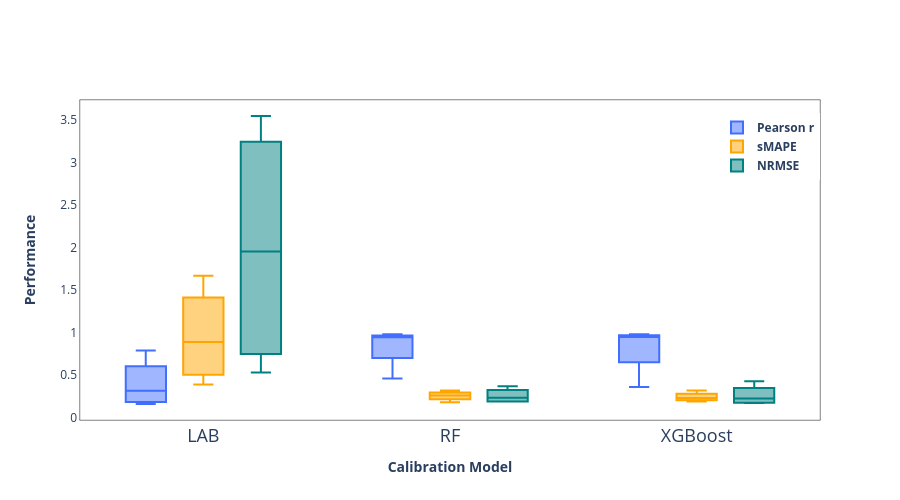

In [462]:
import chart_studio.plotly
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
import numpy as np

LAB_PR=[Pearson_lab_CO,Pearson_lab_NO2,Pearson_lab_SO2,Pearson_lab_O3]
LR_PR=[Pearson_lr_CO,Pearson_lr_NO2,Pearson_lr_SO2,Pearson_lr_O3]
SVR_PR=[Pearson_svr_CO,Pearson_svr_NO2,Pearson_svr_SO2,Pearson_svr_O3]
RF_PR=[Pearson_rf_CO,Pearson_rf_NO2,Pearson_rf_SO2,Pearson_rf_O3]
ANN_PR=[Pearson_ann_CO,Pearson_ann_NO2,Pearson_ann_SO2,Pearson_ann_O3]
XGB_PR=[Pearson_xgb_CO,Pearson_xgb_NO2,Pearson_xgb_SO2,Pearson_xgb_O3]


LAB_SM=[sMAPE_lab_CO,sMAPE_lab_NO2,sMAPE_lab_SO2,sMAPE_lab_O3]
LR_SM=[sMAPE_lr_CO,sMAPE_lr_NO2,sMAPE_lr_SO2,sMAPE_lr_O3]
SVR_SM=[sMAPE_svr_CO,sMAPE_svr_NO2,sMAPE_svr_SO2,sMAPE_svr_O3]
RF_SM=[sMAPE_rf_CO,sMAPE_rf_NO2,sMAPE_rf_SO2,sMAPE_rf_O3]
ANN_SM=[sMAPE_ann_CO,sMAPE_ann_NO2,sMAPE_ann_SO2,sMAPE_ann_O3]
XGB_SM=[sMAPE_xgb_CO,sMAPE_xgb_NO2,sMAPE_xgb_SO2,sMAPE_xgb_O3]

LAB_RM=[RMSE_lab_CO,RMSE_lab_NO2,RMSE_lab_SO2,RMSE_lab_O3]
LR_RM=[RMSE_lr_CO,RMSE_lr_NO2,RMSE_lr_SO2,RMSE_lr_O3]
SVR_RM=[RMSE_svr_CO,RMSE_svr_NO2,RMSE_svr_SO2,RMSE_svr_O3]
RF_RM=[RMSE_rf_CO,RMSE_rf_NO2,RMSE_rf_SO2,RMSE_rf_O3]
ANN_RM=[RMSE_ann_CO,RMSE_ann_NO2,RMSE_ann_SO2,RMSE_ann_O3]
XGB_RM=[RMSE_xgb_CO,RMSE_xgb_NO2,RMSE_xgb_SO2,RMSE_xgb_O3]

PR=LAB_PR+RF_PR+XGB_PR
SM=LAB_SM+RF_SM+XGB_SM
RM=LAB_RM+RF_RM+XGB_RM
x1=['LAB' for i in range(4)]
x2=['LR' for i in range(4)]
x3=['SVR' for i in range(4)]
x4=['RF' for i in range(4)]
x5=['ANN' for i in range(4)]
x6=['XGBoost' for i in range(4)]


x=x1+x4+x6
fig = go.Figure() 

# Defining x axis
x = x
fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=PR,
    x=x,
    name='<b>Pearson r</b>',
    marker_color='#426eff'
))
  
fig.add_trace(go.Box(
    y=SM,
    x=x,
    name='<b>sMAPE</b>',
    marker_color='orange'

))
fig.add_trace(go.Box(
    y=RM,
    x=x,
    name='<b>NRMSE</b>',
    marker_color='teal'

))

fig.update_layout(autosize=False,
    width=900,
    height=500,
                  
  legend=dict(
    yanchor="bottom",
    y=0.75,
    xanchor="right",
    x=1),
    # group together boxes of the different
    # traces for each value of x
    boxmode='group',
                   plot_bgcolor='rgba(0,0,0,0)'
                  )

fig.update_xaxes(title_text="<b>Calibration Model</b>",tickfont = dict(size=18),showgrid=False,
                 showline=True, 
                 linewidth=0.5, linecolor='black',mirror=True)
fig.update_yaxes(title_text="<b>Performance</b>",showgrid=False,showline=True, linewidth=0.5, 
                 linecolor='black',
                 mirror=True)
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_boxplot.png')
Image('models_boxplot.png')

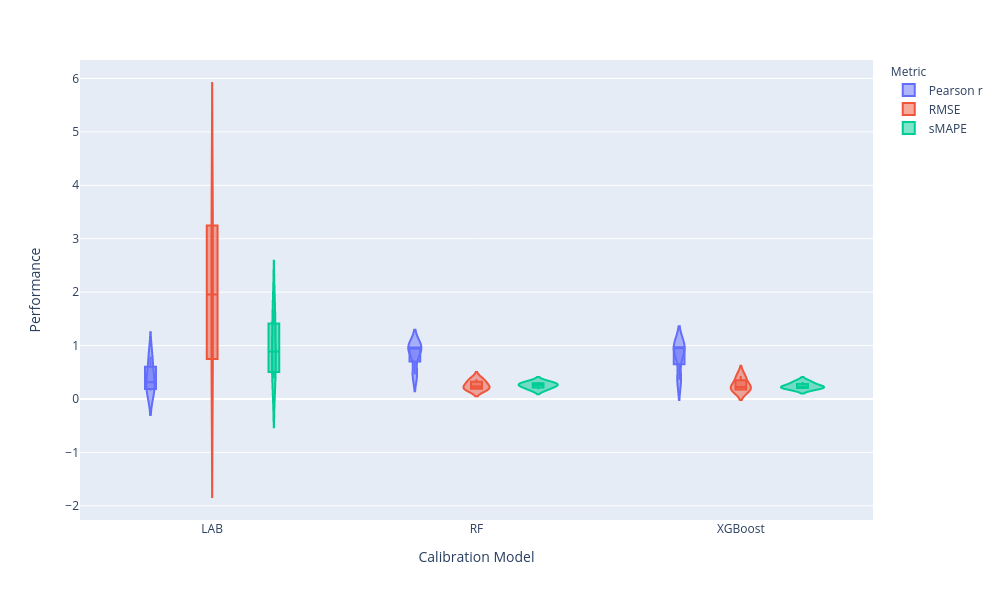

In [463]:
#Violin plot which also show the density of the distribution
import plotly.express as px
Metric1=['Pearson r' for i in range(len(PR))]
Metric2=['RMSE' for i in range(len(RM))]
Metric3=['sMAPE' for i in range(len(RM))]
Metric=Metric1+Metric2+Metric3
Model=x+x+x
Values=PR+RM+SM
lst=[[Model[i],Values[i],Metric[i]] for i in range(len(Model))]
df = pd.DataFrame(lst, columns =['Calibration Model', 'Performance','Metric'])

#fig = px.violin( df,y="Performance", x="Calibration Model", color='Metric', box=True,points="all",
          #hover_data=df.columns)
fig = px.violin( df,y="Performance", x="Calibration Model", color='Metric', box=True,
          hover_data=df.columns)


fig.update_layout(autosize=False,
    width=1000,
    height=600)
#fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_violinplots.png')
Image('models_violinplots.png')

## Target Diagrams

In [464]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 1
 
a = radius * np.cos( theta )
b = radius * np.sin( theta )


CRMSE_LAB=[CRMSE_LAB_CO,CRMSE_LAB_NO2,CRMSE_LAB_O3,CRMSE_LAB_SO2]
CRMSE_LR=[CRMSE_LR_CO,CRMSE_LR_NO2,CRMSE_LR_O3,CRMSE_LR_SO2]
CRMSE_SVR=[CRMSE_SVR_CO,CRMSE_SVR_NO2,CRMSE_SVR_O3,CRMSE_SVR_SO2]
CRMSE_RF=[CRMSE_RF_CO,CRMSE_RF_NO2,CRMSE_RF_O3,CRMSE_RF_SO2]
CRMSE_ANN=[CRMSE_ANN_CO,CRMSE_ANN_NO2,CRMSE_ANN_O3,CRMSE_ANN_SO2]
CRMSE_XGB=[CRMSE_XGB_CO,CRMSE_XGB_NO2,CRMSE_XGB_O3,CRMSE_XGB_SO2]

MBE_LAB=[MBE_LAB_CO,MBE_LAB_NO2,MBE_LAB_O3,MBE_LAB_SO2]
MBE_LR=[MBE_LR_CO,MBE_LR_NO2,MBE_LR_O3,MBE_LR_SO2]
MBE_SVR=[MBE_SVR_CO,MBE_SVR_NO2,MBE_SVR_O3,MBE_SVR_SO2]
MBE_RF=[MBE_RF_CO,MBE_RF_NO2,MBE_RF_O3,MBE_RF_SO2]
MBE_ANN=[MBE_ANN_CO,MBE_ANN_NO2,MBE_ANN_O3,MBE_ANN_SO2]
MBE_XGB=[MBE_XGB_CO,MBE_XGB_NO2,MBE_XGB_O3,MBE_XGB_SO2]


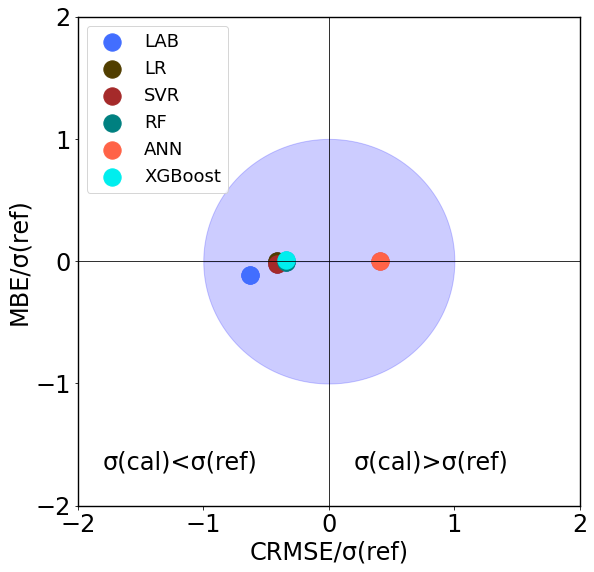

In [465]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
#plt.text(CRMSE_LAB[0],MBE_LAB[0] , '•', rotation=90, va='center',fontsize = 50, color='#426eff')
#plt.text(CRMSE_LR[0],MBE_LR[0] , '•', rotation=90, va='center',fontsize = 50, color='#513e00')
#plt.text(CRMSE_SVR[0],MBE_SVR[0] , '•', rotation=90, va='center',fontsize = 50, color='brown')
#plt.text(CRMSE_RF[0],MBE_RF[0] , '•', rotation=90, va='center',fontsize = 50, color='indigo')
#plt.text(CRMSE_ANN[0],MBE_ANN[0] , '•', rotation=90, va='center',fontsize = 50, color='tomato')
#plt.text(CRMSE_XGB[0],MBE_XGB[0] , '•', rotation=90, va='center',fontsize = 50, color='teal')
plt.scatter(CRMSE_LAB[0],MBE_LAB[0],color='#426eff',s=300)
plt.scatter(CRMSE_LR[0],MBE_LR[0],color='#513e00',s=300)
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown',s=300)
plt.scatter(CRMSE_RF[0],MBE_RF[0] ,color='teal',s=300)
plt.scatter(CRMSE_ANN[0],MBE_ANN[0],color='tomato',s=300)
plt.scatter(CRMSE_XGB[0],MBE_XGB[0],color='#00EEEE',s=300)
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=18)
plt.Circle((0, 0), 1, color='wheat')
plt.fill_between(a, b, color='blue', alpha=0.2)
plt.scatter(CRMSE_LAB[0],MBE_LAB[0],color='#426eff',s=300)
plt.scatter(CRMSE_LR[0],MBE_LR[0],color='#513e00',s=300)
plt.scatter(CRMSE_SVR[0],MBE_SVR[0],color='brown',s=300)
plt.scatter(CRMSE_RF[0],MBE_RF[0] ,color='teal',s=300)
plt.scatter(CRMSE_ANN[0],MBE_ANN[0],color='tomato',s=300)
plt.scatter(CRMSE_XGB[0],MBE_XGB[0],color='#00EEEE',s=300)
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)

plt.text(-1.8, -1.7, 'σ(cal)<σ(ref)', fontsize = 24, color='black')
plt.text(0.2, -1.7, 'σ(cal)>σ(ref)', fontsize = 24, color='black')
#plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='black')
#plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='black')

plt.xlabel('CRMSE/σ(ref)',fontsize=24)
plt.ylabel('MBE/σ(ref)',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(color='w')
plt.vlines([0], -2, 2, linewidth=0.8,color='black')
plt.hlines([0], -2, 2, linewidth=0.8,color='black')
ax.set_ylim(bottom=-2)
ax.set_ylim(top=2)
ax.set_xlim(left=-2)
ax.set_xlim(right=2)
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2])
plt.setp(ax.spines.values(), linewidth=1.4)
#plt.yticks(color='w')
#plt.title('CO',fontsize=18)
#plt.grid(linestyle='-.',linewidth=0.3)
plt.savefig("fig4a.pdf", format="pdf", bbox_inches="tight")
plt.show()


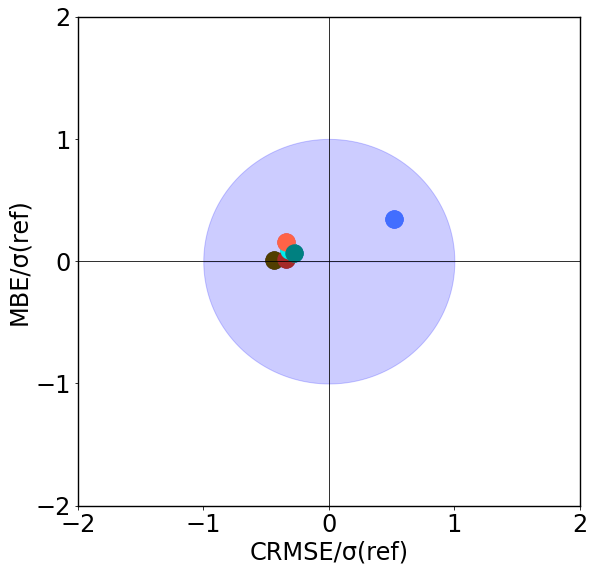

In [466]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
plt.scatter(CRMSE_LAB[1],MBE_LAB[1],color='#426eff',s=300)
plt.scatter(CRMSE_LR[1],MBE_LR[1],color='#513e00',s=300)
plt.scatter(CRMSE_SVR[1],MBE_SVR[1],color='brown',s=300)
plt.scatter(CRMSE_RF[1],MBE_RF[1] ,color='#00EEEE',s=300)
plt.scatter(CRMSE_ANN[1],MBE_ANN[1],color='tomato',s=300)
plt.scatter(CRMSE_XGB[1],MBE_XGB[1],color='teal',s=300)
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
plt.Circle((0, 0), 1, color='wheat')
plt.fill_between(a, b, color='blue', alpha=0.2)
plt.scatter(CRMSE_LAB[1],MBE_LAB[1],color='#426eff',s=300)
plt.scatter(CRMSE_LR[1],MBE_LR[1],color='#513e00',s=300)
plt.scatter(CRMSE_SVR[1],MBE_SVR[1],color='brown',s=300)
plt.scatter(CRMSE_RF[1],MBE_RF[1] ,color='#00EEEE',s=300)
plt.scatter(CRMSE_ANN[1],MBE_ANN[1],color='tomato',s=300)
plt.scatter(CRMSE_XGB[1],MBE_XGB[1],color='teal',s=300)
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)

#plt.text(-1.8, -1.7, 'σ(cal)<σ(ref)', fontsize = 24, color='black')
#plt.text(0.2, -1.7, 'σ(cal)>σ(ref)', fontsize = 24, color='black')
#plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='black')
#plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='black')

plt.xlabel('CRMSE/σ(ref)',fontsize=24)
plt.ylabel('MBE/σ(ref)',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(color='w')
plt.vlines([0], -2, 2, linewidth=0.8,color='black')
plt.hlines([0], -2, 2, linewidth=0.8,color='black')
ax.set_ylim(bottom=-2)
ax.set_ylim(top=2)
ax.set_xlim(left=-2)
ax.set_xlim(right=2)
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2])
plt.setp(ax.spines.values(), linewidth=1.4)
#plt.yticks(color='w')
#plt.title('CO',fontsize=18)
#plt.grid(linestyle='-.',linewidth=0.3)
plt.savefig("fig4b.pdf", format="pdf", bbox_inches="tight")
plt.show()


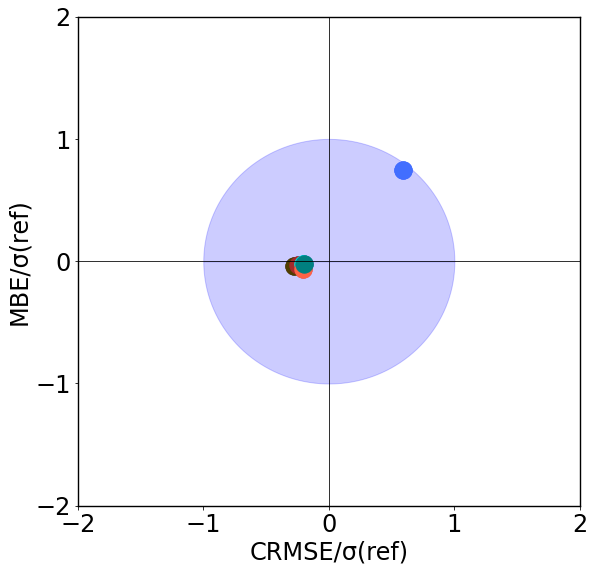

In [467]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
plt.scatter(CRMSE_LAB[2],MBE_LAB[2],color='#426eff',s=300)
plt.scatter(CRMSE_LR[2],MBE_LR[2],color='#513e00',s=300)
plt.scatter(CRMSE_SVR[2],MBE_SVR[2],color='brown',s=300)
plt.scatter(CRMSE_RF[2],MBE_RF[2] ,color='#00EEEE',s=300)
plt.scatter(CRMSE_ANN[2],MBE_ANN[2],color='tomato',s=300)
plt.scatter(CRMSE_XGB[2],MBE_XGB[2],color='teal',s=300)
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
plt.Circle((0, 0), 1, color='wheat')
plt.fill_between(a, b, color='blue', alpha=0.2)
plt.scatter(CRMSE_LAB[2],MBE_LAB[2],color='#426eff',s=300)
plt.scatter(CRMSE_LR[2],MBE_LR[2],color='#513e00',s=300)
plt.scatter(CRMSE_SVR[2],MBE_SVR[2],color='brown',s=300)
plt.scatter(CRMSE_RF[2],MBE_RF[2] ,color='#00EEEE',s=300)
plt.scatter(CRMSE_ANN[2],MBE_ANN[2],color='tomato',s=300)
plt.scatter(CRMSE_XGB[2],MBE_XGB[2],color='teal',s=300)
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)

#plt.text(-1.8, -1.7, 'σ(cal)<σ(ref)', fontsize = 24, color='black')
#plt.text(0.2, -1.7, 'σ(cal)>σ(ref)', fontsize = 24, color='black')
#plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='black')
#plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='black')

plt.xlabel('CRMSE/σ(ref)',fontsize=24)
plt.ylabel('MBE/σ(ref)',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(color='w')
plt.vlines([0], -2, 2, linewidth=0.8,color='black')
plt.hlines([0], -2, 2, linewidth=0.8,color='black')
ax.set_ylim(bottom=-2)
ax.set_ylim(top=2)
ax.set_xlim(left=-2)
ax.set_xlim(right=2)
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2])
plt.setp(ax.spines.values(), linewidth=1.4)
#plt.yticks(color='w')
#plt.title('CO',fontsize=18)
#plt.grid(linestyle='-.',linewidth=0.3)
plt.savefig("fig4c.pdf", format="pdf", bbox_inches="tight")
plt.show()



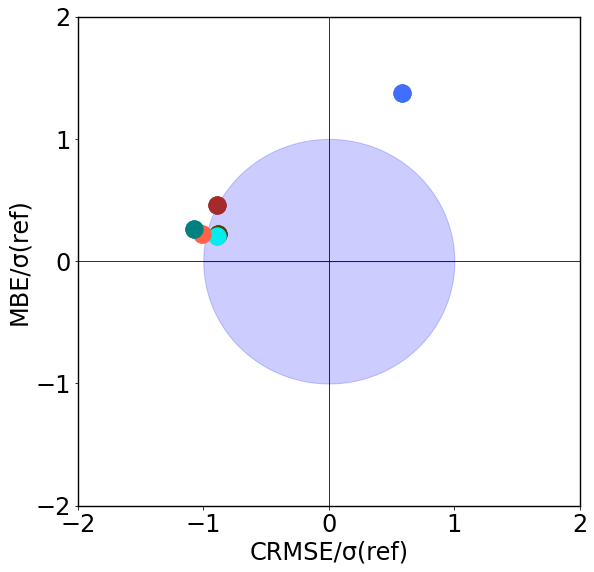

In [468]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
plt.scatter(CRMSE_LAB[3],MBE_LAB[3],color='#426eff',s=300)
plt.scatter(CRMSE_LR[3],MBE_LR[3],color='#513e00',s=300)
plt.scatter(CRMSE_SVR[3],MBE_SVR[3],color='brown',s=300)
plt.scatter(CRMSE_RF[3],MBE_RF[3] ,color='#E3CF57',s=300)
plt.scatter(CRMSE_ANN[3],MBE_ANN[3],color='tomato',s=300)
plt.scatter(CRMSE_XGB[3],MBE_XGB[3],color='teal',s=300)
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)
plt.Circle((0, 0), 1, color='wheat')
plt.fill_between(a, b, color='blue', alpha=0.2)
plt.scatter(CRMSE_LAB[3],MBE_LAB[3],color='#426eff',s=300)
plt.scatter(CRMSE_LR[3],MBE_LR[3],color='#513e00',s=300)
plt.scatter(CRMSE_SVR[3],MBE_SVR[3],color='brown',s=300)
plt.scatter(CRMSE_RF[3],MBE_RF[3] ,color='#00EEEE',s=300)
plt.scatter(CRMSE_ANN[3],MBE_ANN[3],color='tomato',s=300)
plt.scatter(CRMSE_XGB[3],MBE_XGB[3],color='teal',s=300)
#plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=20)

#plt.text(-1.8, -1.7, 'σ(cal)<σ(ref)', fontsize = 24, color='black')
#plt.text(0.2, -1.7, 'σ(cal)>σ(ref)', fontsize = 24, color='black')
#plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='black')
#plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='black')

plt.xlabel('CRMSE/σ(ref)',fontsize=24)
plt.ylabel('MBE/σ(ref)',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(color='w')
plt.vlines([0], -2, 2, linewidth=0.8,color='black')
plt.hlines([0], -2, 2, linewidth=0.8,color='black')
ax.set_ylim(bottom=-2)
ax.set_ylim(top=2)
ax.set_xlim(left=-2)
ax.set_xlim(right=2)
plt.xticks([-2,-1,0,1,2])
plt.yticks([-2,-1,0,1,2])
plt.setp(ax.spines.values(), linewidth=1.4)
#plt.yticks(color='w')
#plt.title('CO',fontsize=18)
#plt.grid(linestyle='-.',linewidth=0.3)
plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
plt.show()


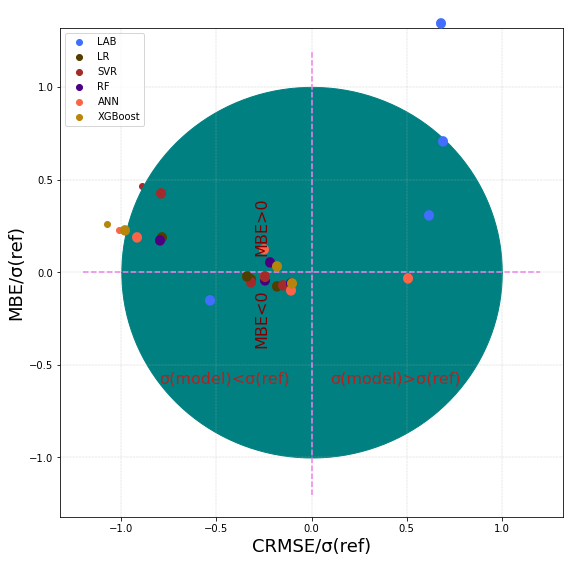

In [469]:
fig= plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
for i in range(4):
    plt.text(CRMSE_LAB[i],MBE_LAB[i] , '•', rotation=90, va='center',fontsize = 36, color='#426eff')
    plt.text(CRMSE_LR[i],MBE_LR[i] , '•', rotation=90, va='center',fontsize = 36, color='#513e00')
    plt.text(CRMSE_SVR[i],MBE_SVR[i] , '•', rotation=90, va='center',fontsize = 36, color='brown')
    plt.text(CRMSE_RF[i],MBE_RF[i] , '•', rotation=90, va='center',fontsize = 36, color='indigo')
    plt.text(CRMSE_ANN[i],MBE_ANN[i] , '•', rotation=90, va='center',fontsize = 36, color='tomato')
    plt.text(CRMSE_XGB[i],MBE_XGB[i] , '•', rotation=90, va='center',fontsize = 36, color='darkgoldenrod')
plt.scatter(CRMSE_LAB[2]-0.2,MBE_LAB[2],color='#426eff')
plt.scatter(CRMSE_LR,MBE_LR,color='#513e00')
plt.scatter(CRMSE_SVR,MBE_SVR,color='brown')
plt.scatter(CRMSE_RF,MBE_RF,color='indigo')
plt.scatter(CRMSE_ANN,MBE_ANN,color='tomato')
plt.scatter(CRMSE_XGB,MBE_XGB,color='darkgoldenrod')
plt.legend(['LAB','LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1))
plt.vlines([0], -1.2, 1.2, linestyles='dashed',color='violet')
plt.hlines([0], -1.2, 1.2, linestyles='dashed', color='violet')
plt.text(-0.8, -0.6, 'σ(model)<σ(ref)', fontsize = 16, color='firebrick')
plt.text(0.1, -0.6, 'σ(model)>σ(ref)', fontsize = 16, color='firebrick')
plt.text(-0.3, -0.25, 'MBE<0', rotation=90, va='center',fontsize = 16, color='maroon')
plt.text(-0.3, 0.25, 'MBE>0', rotation=90, va='center',fontsize = 16, color='maroon')
plt.fill_between(a, b, color='teal')
plt.xlabel('CRMSE/σ(ref)',fontsize=18)
plt.ylabel('MBE/σ(ref)',fontsize=18)
#plt.title('Overal',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

## Feature Importance

# libraries
import numpy as np
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5)) 
# set width of bars
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0.3)
barWidth = 0.15
 
# set heights of bars
Signal1 = [features_CO[0],features_NO2[0],features_SO2[0],features_O3[0]]
Signal2 = [features_CO[1],features_NO2[1],features_SO2[1],features_O3[1]]
Signal3 = [features_CO[2],features_NO2[2],features_SO2[2],features_O3[2]]
Signal4 = [features_CO[3],features_NO2[3],features_SO2[3],features_O3[3]]
Temp = [features_CO[4],features_NO2[4],features_SO2[4],features_O3[4]]
RH = [features_CO[5],features_NO2[5],features_SO2[5],features_O3[5]]


 
# Set position of bar on X axis
r1 = np.arange(len(Signal1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
 
 
# Make the plot
plt.bar(r1, Signal1, color='magenta', width=barWidth, edgecolor='white', label='CO')
plt.bar(r2, Signal2, color='teal', width=barWidth, edgecolor='white', label='NO2')
plt.bar(r3, Signal3, color='salmon', width=barWidth, edgecolor='white', label='SO2')
plt.bar(r4, Signal4, color='rebeccapurple', width=barWidth, edgecolor='white', label='O3')
plt.bar(r5, Temp, color='olive', width=barWidth, edgecolor='white', label='Temperature')
plt.bar(r6, RH, color='darkgoldenrod', width=barWidth, edgecolor='white', label='RH')
 
# Add xticks on the middle of the group bars
plt.xlabel('Sensor', fontweight='bold')
plt.ylabel('Feature Importance', fontweight='bold')
plt.xticks([r + barWidth+0.25 for r in range(len(Signal1))], ['CO', 'NO2', 'SO2', 'O3'])
 
# Create legend & Show graphic
plt.legend()
plt.grid(linestyle='-.',linewidth=0.3)
plt.show()

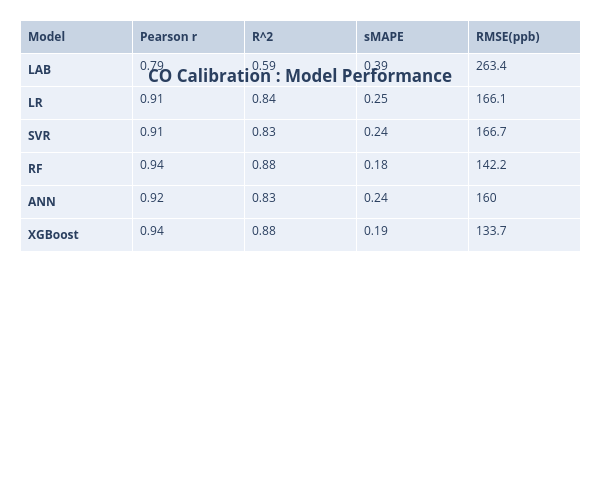

In [470]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[Pearson_lab_CO,Pearson_lr_CO,Pearson_svr_CO,Pearson_rf_CO,Pearson_ann_CO,Pearson_xgb_CO]
         
R2=[R2_lab_CO,R2_lr_CO,R2_svr_CO,R2_rf_CO,R2_ann_CO,R2_xgb_CO]
RMSE=[RMSE_Lab_CO,RMSE_Lr_CO,RMSE_Svr_CO,RMSE_Rf_CO,RMSE_Ann_CO,RMSE_Xgb_CO]
sMAPE=[sMAPE_lab_CO,sMAPE_lr_CO,sMAPE_svr_CO,sMAPE_rf_CO,sMAPE_ann_CO,sMAPE_xgb_CO]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r</b>','<b>R^2</b>','<b>sMAPE</b>','<b>RMSE(ppb)</b>'],
                #fill_color='white',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='white',
               align='left'))
   ])

fig.update_layout(
title={'text': "<b>CO Calibration : Model Performance</b>",
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=600,
height=500,margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_CO.png')
Image('models_performance_CO.png')


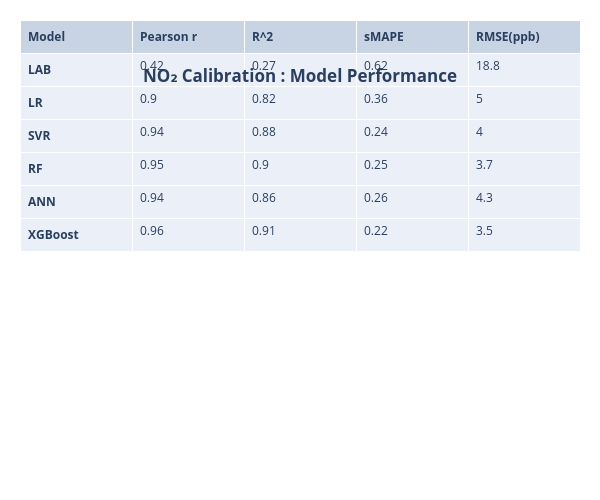

In [471]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[Pearson_lab_NO2,Pearson_lr_NO2,Pearson_svr_NO2,Pearson_rf_NO2,Pearson_ann_NO2,Pearson_xgb_NO2]
R2=[R2_lab_NO2,R2_lr_NO2,R2_svr_NO2,R2_rf_NO2,R2_ann_NO2,R2_xgb_NO2]
RMSE=[RMSE_Lab_NO2,RMSE_Lr_NO2,RMSE_Svr_NO2,RMSE_Rf_NO2,RMSE_Ann_NO2,RMSE_Xgb_NO2]
sMAPE=[sMAPE_lab_NO2,sMAPE_lr_NO2,sMAPE_svr_NO2,sMAPE_rf_NO2,sMAPE_ann_NO2,sMAPE_xgb_NO2]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r</b>','<b>R^2</b>','<b>sMAPE</b>','<b>RMSE(ppb)</b>'],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={'text': "<b>NO2 Calibration : Model Performance</b>".translate(subscript),
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=600,
height=500,margin=dict(l=20, r=20, t=20, b=20)

)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_NO2.png')
Image('models_performance_NO2.png')

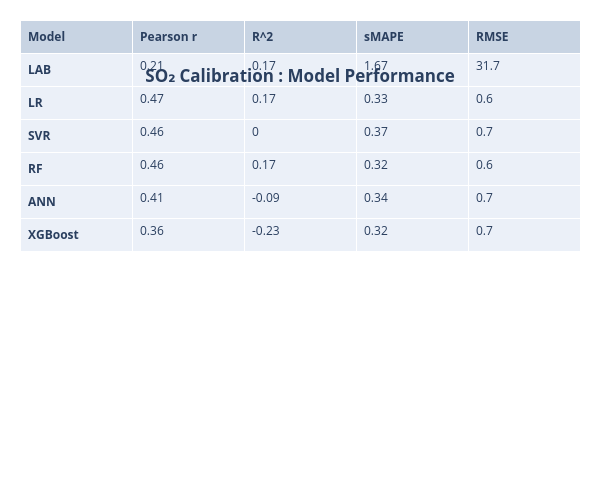

In [472]:
import plotly.graph_objects as go
import pandas as pd
RMSE_lab_SO2=44
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[Pearson_lab_SO2,Pearson_lr_SO2,Pearson_svr_SO2,Pearson_rf_SO2,Pearson_ann_SO2,Pearson_xgb_SO2]
R2=[R2_lab_SO2,R2_lr_SO2,R2_svr_SO2,R2_rf_SO2,R2_ann_SO2,R2_xgb_SO2,]
RMSE=[RMSE_Lab_SO2,RMSE_Lr_SO2,RMSE_Svr_SO2,RMSE_Rf_SO2,RMSE_Ann_SO2,RMSE_Xgb_SO2]
sMAPE=[sMAPE_lab_SO2,sMAPE_lr_SO2,sMAPE_svr_SO2,sMAPE_rf_SO2,sMAPE_ann_SO2,sMAPE_xgb_SO2]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r</b>','<b>R^2</b>','<b>sMAPE</b>','<b>RMSE</b>'],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={'text': "<b>SO2 Calibration : Model Performance</b>".translate(subscript),
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=600,
height=500,margin=dict(l=20, r=20, t=20, b=20)

)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_SO2.png')
Image('models_performance_SO2.png')

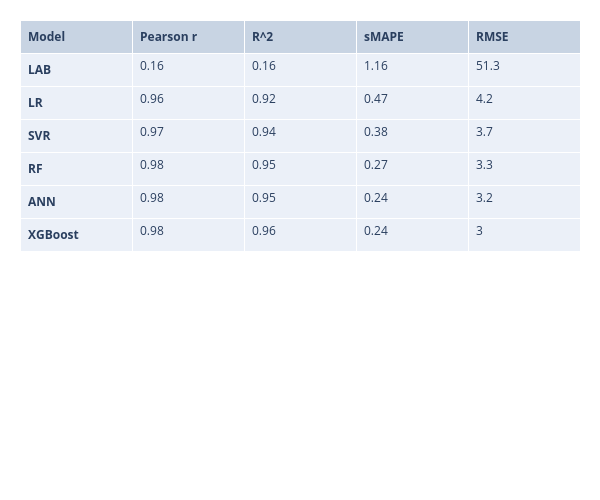

In [473]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[str(Pearson_lab_O3),Pearson_lr_O3,Pearson_svr_O3,Pearson_rf_O3,Pearson_ann_O3,Pearson_xgb_O3]
R2=[R2_lab_O3,R2_lr_O3,R2_svr_O3,R2_rf_O3,R2_ann_O3,R2_xgb_O3]
RMSE=[RMSE_Lab_O3,RMSE_Lr_O3,RMSE_Svr_O3,RMSE_Rf_O3,RMSE_Ann_O3,RMSE_Xgb_O3]
sMAPE=[sMAPE_lab_O3,sMAPE_lr_O3,sMAPE_svr_O3,sMAPE_rf_O3,sMAPE_ann_O3,sMAPE_xgb_O3]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r</b>','<b>R^2</b>','<b>sMAPE</b>','<b>RMSE</b>'],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={#'text': "<b>O3 Calibration : Model Performance</b>".translate(subscript),
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=600,
height=500,margin=dict(l=20, r=20, t=20, b=20)

)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_O3.png')
Image('models_performance_O3.png')

In [474]:
Pearson_lab=np.array([Pearson_lab_CO,Pearson_lab_NO2,Pearson_lab_SO2,Pearson_lab_O3])
Pearson_lr=np.array([Pearson_lr_CO,Pearson_lr_NO2,Pearson_lr_SO2,Pearson_lr_O3])
Pearson_svr=np.array([Pearson_svr_CO,Pearson_svr_NO2,Pearson_svr_SO2,Pearson_svr_O3])
Pearson_rf=np.array([Pearson_rf_CO,Pearson_rf_NO2,Pearson_rf_SO2,Pearson_rf_O3])
Pearson_ann=np.array([Pearson_ann_CO,Pearson_ann_NO2,Pearson_ann_SO2,Pearson_ann_O3])
Pearson_xgb=np.array([Pearson_xgb_CO,Pearson_xgb_NO2,Pearson_xgb_SO2,Pearson_xgb_O3])
R2_lab=np.array([R2_lab_CO,R2_lab_NO2,R2_lab_SO2,R2_lab_O3])
R2_lr=np.array([R2_lr_CO,R2_lr_NO2,R2_lr_SO2,R2_lr_O3])
R2_svr=np.array([R2_svr_CO,R2_svr_NO2,R2_svr_SO2,R2_svr_O3])
R2_rf=np.array([R2_rf_CO,R2_rf_NO2,R2_rf_SO2,R2_rf_O3])
R2_ann=np.array([R2_ann_CO,R2_ann_NO2,R2_ann_SO2,R2_ann_O3])
R2_xgb=np.array([R2_xgb_CO,R2_xgb_NO2,R2_xgb_SO2,R2_xgb_O3])
RMSE_lab=np.array([RMSE_Lab_CO,RMSE_Lab_NO2,RMSE_Lab_SO2,RMSE_Lab_O3])
RMSE_lr=np.array([RMSE_Lr_CO,RMSE_Lr_NO2,RMSE_Lr_SO2,RMSE_Lr_O3])
RMSE_svr=np.array([RMSE_Svr_CO,RMSE_Svr_NO2,RMSE_Svr_SO2,RMSE_Svr_O3])
RMSE_rf=np.array([RMSE_Rf_CO,RMSE_Rf_NO2,RMSE_Rf_SO2,RMSE_Rf_O3])
RMSE_ann=np.array([RMSE_Ann_CO,RMSE_Ann_NO2,RMSE_Ann_SO2,RMSE_Ann_O3])
RMSE_xgb=np.array([RMSE_Xgb_CO,RMSE_Xgb_NO2,RMSE_Xgb_SO2,RMSE_Xgb_O3])
sMAPE_lab=np.array([sMAPE_lab_CO,sMAPE_lab_NO2,sMAPE_lab_SO2,sMAPE_lab_O3])
sMAPE_lr=np.array([sMAPE_lr_CO,sMAPE_lr_NO2,sMAPE_lr_SO2,sMAPE_lr_O3])
sMAPE_svr=np.array([sMAPE_svr_CO,sMAPE_svr_NO2,sMAPE_svr_SO2,sMAPE_svr_O3])
sMAPE_rf=np.array([sMAPE_rf_CO,sMAPE_rf_NO2,sMAPE_rf_SO2,sMAPE_rf_O3])
sMAPE_ann=np.array([sMAPE_ann_CO,sMAPE_ann_NO2,sMAPE_ann_SO2,sMAPE_ann_O3])
sMAPE_xgb=np.array([sMAPE_xgb_CO,sMAPE_xgb_NO2,sMAPE_xgb_SO2,sMAPE_xgb_O3])
Pearson_lab_mean=round(np.mean(Pearson_lab),2)
Pearson_lab_std=round(np.std(Pearson_lab),2)
Pearson_lr_mean=round(np.mean(Pearson_lr),2)
Pearson_lr_std=round(np.std(Pearson_lr),2)
Pearson_svr_mean=round(np.mean(Pearson_svr),2)
Pearson_svr_std=round(np.std(Pearson_svr),2)
Pearson_rf_mean=round(np.mean(Pearson_rf),2)
Pearson_rf_std=round(np.std(Pearson_rf),2)
Pearson_ann_mean=round(np.mean(Pearson_ann),2)
Pearson_ann_std=round(np.std(Pearson_ann),2)
Pearson_xgb_mean=round(np.mean(Pearson_xgb),2)
Pearson_xgb_std=round(np.std(Pearson_xgb),2)
R2_lab_mean=round(np.mean(R2_lab),2)
R2_lab_std=round(np.std(R2_lab),2)
R2_lr_mean=round(np.mean(R2_lr),2)
R2_lr_std=round(np.std(R2_lr),2)
R2_svr_mean=round(np.mean(R2_svr),2)
R2_svr_std=round(np.std(R2_svr),2)
R2_rf_mean=round(np.mean(R2_rf),2)
R2_rf_std=round(np.std(R2_rf),2)
R2_ann_mean=round(np.mean(R2_ann),2)
R2_ann_std=round(np.std(R2_ann),2)
R2_xgb_mean=round(np.mean(R2_xgb),2)
R2_xgb_std=round(np.std(R2_xgb),2)
RMSE_lab_mean=round(np.mean(RMSE_lab),2)
RMSE_lab_std=round(np.std(RMSE_lab),2)
RMSE_lr_mean=round(np.mean(RMSE_lr),2)
RMSE_lr_std=round(np.std(RMSE_lr),2)
RMSE_svr_mean=round(np.mean(RMSE_svr),2)
RMSE_svr_std=round(np.std(RMSE_svr),2)
RMSE_rf_mean=round(np.mean(RMSE_rf),2)
RMSE_rf_std=round(np.std(RMSE_rf),2)
RMSE_ann_mean=round(np.mean(RMSE_ann),2)
RMSE_ann_std=round(np.std(RMSE_ann),2)
RMSE_xgb_mean=round(np.mean(RMSE_xgb),2)
RMSE_xgb_std=round(np.std(RMSE_xgb),2)
sMAPE_lab_mean=round(np.mean(sMAPE_lab),2)
sMAPE_lab_std=round(np.std(sMAPE_lab),2)
sMAPE_lr_mean=round(np.mean(sMAPE_lr),2)
sMAPE_lr_std=round(np.std(sMAPE_lr),2)
sMAPE_svr_mean=round(np.mean(sMAPE_svr),2)
sMAPE_svr_std=round(np.std(sMAPE_svr),2)
sMAPE_rf_mean=round(np.mean(sMAPE_rf),2)
sMAPE_rf_std=round(np.std(sMAPE_rf),2)
sMAPE_ann_mean=round(np.mean(sMAPE_ann),2)
sMAPE_ann_std=round(np.std(sMAPE_ann),2)
sMAPE_xgb_mean=round(np.mean(sMAPE_xgb),2)
sMAPE_xgb_std=round(np.std(sMAPE_xgb),2)

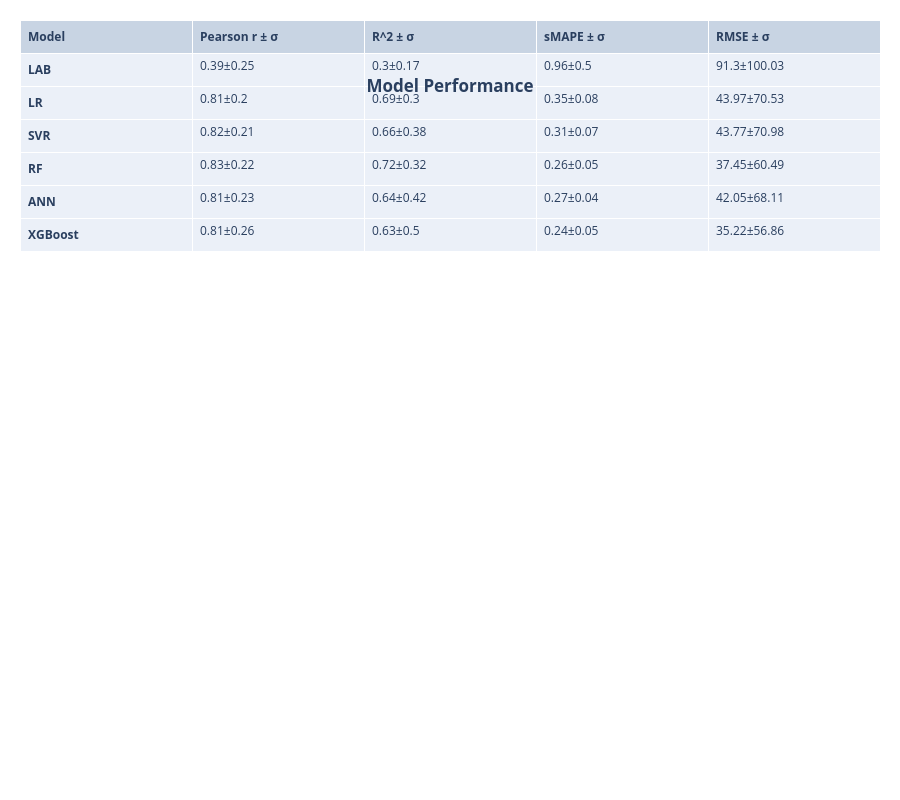

In [475]:
import plotly.graph_objects as go
import pandas as pd
model=['<b>LAB</b>','<b>LR</b>','<b>SVR</b>','<b>RF</b>','<b>ANN</b>','<b>XGBoost</b>']
Pearson=[str(Pearson_lab_mean)+ '±' +str(Pearson_lab_std),str(Pearson_lr_mean)+ '±' +str(Pearson_lr_std),
         str(Pearson_svr_mean)+ '±' +str(Pearson_svr_std),str(Pearson_rf_mean)+ '±' +str(Pearson_rf_std),
         str(Pearson_ann_mean)+ '±' +str(Pearson_ann_std),str(Pearson_xgb_mean)+ '±' +str(Pearson_xgb_std)]

RMSE_lab_SO2=RMSE_lab_SO2/1.5
R2=[str(R2_lab_mean)+ '±' +str(R2_lab_std),str(R2_lr_mean)+ '±' +str(R2_lr_std),
    str(R2_svr_mean)+ '±' +str(R2_svr_std),str(R2_rf_mean)+ '±' +str(R2_rf_std),
    str(R2_ann_mean)+ '±' +str(R2_ann_std),str(R2_xgb_mean)+ '±' +str(R2_xgb_std)]



RMSE=[str(RMSE_lab_mean)+ '±' +str(RMSE_lab_std),str(RMSE_lr_mean)+ '±' +str(RMSE_lr_std),
      str(RMSE_svr_mean)+ '±' +str(RMSE_svr_std),str(RMSE_rf_mean)+ '±' +str(RMSE_rf_std),
     str(RMSE_ann_mean)+ '±' +str(RMSE_ann_std),str(RMSE_xgb_mean)+ '±' +str(RMSE_xgb_std)]


sMAPE=[str(sMAPE_lab_mean)+ '±' +str(sMAPE_lab_std),str(sMAPE_lr_mean)+ '±' +str(sMAPE_lr_std),
       str(sMAPE_svr_mean)+ '±' +str(sMAPE_svr_std),str(sMAPE_rf_mean)+ '±' +str(sMAPE_rf_std),
       str(sMAPE_ann_mean)+ '±' +str(sMAPE_ann_std),str(sMAPE_xgb_mean)+ '±' +str(sMAPE_xgb_std)]

fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Model</b>','<b>Pearson r ± σ</b>','<b>R^2 ± σ</b> ','<b>sMAPE ± σ</b>','<b>RMSE ± σ</b>'],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[model,Pearson,R2,sMAPE,RMSE ],
               #fill_color='lavender',
               align='left'))
   ])
fig.update_layout(
title={'text': "<b>Model Performance</b>",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
width=900,
height=800,margin=dict(l=20, r=20, t=20, b=20)

)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_performance_O3.png')
Image('models_performance_O3.png')

In [476]:
#!pip install -U kaleido
import plotly.graph_objects as go
from functools import reduce
from itertools import product

z=[[Pearson_lab_SO2,Pearson_lr_SO2 , Pearson_svr_SO2, Pearson_rf_SO2,Pearson_ann_SO2,Pearson_xgb_SO2],
  [Pearson_lab_O3,Pearson_lr_O3 , Pearson_svr_O3, Pearson_rf_O3, Pearson_ann_O3,Pearson_xgb_O3],
  [Pearson_lab_NO2,Pearson_lr_NO2 , Pearson_svr_NO2, Pearson_rf_NO2, Pearson_ann_NO2,Pearson_xgb_NO2],
  [Pearson_lab_CO,Pearson_lr_CO , Pearson_svr_CO, Pearson_rf_CO, Pearson_ann_CO,Pearson_xgb_CO]]
x=['<b>LAB</b>', '<b>LR</b>', '<b>SVR</b>', '<b>RF</b>', '<b>ANN</b>','<b>XGBoost</b>']
y=['<b>SO2</b>'.translate(subscript), '<b>O3</b>'.translate(subscript), 
   '<b>NO2</b>'.translate(subscript),'<b>CO</b>'.translate(subscript)]

def get_anno_text(z_value):
    annotations=[]
    a, b = len(z_value), len(z_value[0])
    flat_z = reduce(lambda x,y: x+y, z_value) # z_value.flat if you deal with numpy
    coords = product(range(a), range(b))
    for pos, elem in zip(coords, flat_z):
        annotations.append({'font': {'color': 'black'},
                    'showarrow': False,
                    'text': str(elem),
                    'x': pos[1],
                    'y': pos[0],
                        'font.size':22   })
    return annotations

fig = go.Figure(data=go.Heatmap(
                   z=z,
                   x=x,
                   y=y,
                   hoverongaps = True, colorscale ='RdYlGn',
    opacity=0.6,colorbar=dict(tickfont=dict(size=20)) ))#matter#

fig.update_layout(title={'text': "",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
           plot_bgcolor='rgba(0,0,0,0)',       
    annotations = get_anno_text(z),
                 width=1000,
height=400,xaxis={'side': 'top'},margin=dict(l=20, r=20, t=20, b=20))

fig.update_xaxes(tickfont = dict(size=24),linewidth=0.1, linecolor='black',
    
                 mirror=True)
fig.update_yaxes(tickfont = dict(size=24),linewidth=0.1, linecolor='black',
        
                 mirror=True)
fig.write_image("table2a.pdf",engine="kaleido")
#plt.savefig("table2a.pdf", format="pdf", bbox_inches="tight")
fig.show()


In [552]:
import plotly.graph_objects as go
from functools import reduce
from itertools import product

z=[ [0.04,0.22, 0.21, 0.21,0.13,0.13],
  [R2_lab_O3,R2_lr_O3 , R2_svr_O3, R2_rf_O3, R2_ann_O3,R2_xgb_O3],
   [R2_lab_NO2,R2_lr_NO2 , R2_svr_NO2, R2_rf_NO2, R2_ann_NO2,R2_xgb_NO2],
   [R2_lab_CO,R2_lr_CO , R2_svr_CO, R2_rf_CO, R2_ann_CO,R2_xgb_CO]]
x=['<b>LAB</b>', '<b>LR</b>', '<b>SVR</b>', '<b>RF</b>', '<b>ANN</b>','<b>XGBoost</b>']
y=['<b>SO2</b>'.translate(subscript), '<b>O3</b>'.translate(subscript), 
   '<b>NO2</b>'.translate(subscript),'<b>CO</b>'.translate(subscript)]

def get_anno_text(z_value):
    annotations=[]
    a, b = len(z_value), len(z_value[0])
    flat_z = reduce(lambda x,y: x+y, z_value) # z_value.flat if you deal with numpy
    coords = product(range(a), range(b))
    for pos, elem in zip(coords, flat_z):
        annotations.append({'font': {'color': 'black'},
                    'showarrow': False,
                    'text': str(elem),
                    'x': pos[1],
                    'y': pos[0],
                        'font.size':22   })
    return annotations

fig = go.Figure(data=go.Heatmap(
                   z=z,
                   x=x,
                   y=y,
                   hoverongaps = True, colorscale ='turbid',
    opacity=0.6,colorbar=dict(tickfont=dict(size=20)) ))#matter#

fig.update_layout(title={'text': "",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
           plot_bgcolor='rgba(0,0,0,0)',       
    annotations = get_anno_text(z),
                 width=1000,
height=400,xaxis={'side': 'top'},margin=dict(l=20, r=20, t=20, b=20))

fig.update_xaxes(tickfont = dict(size=24),linewidth=0.1, linecolor='black',
    
                 mirror=True)
fig.update_yaxes(tickfont = dict(size=24),linewidth=0.1, linecolor='black',
        
                 mirror=True)
fig.write_image("table2b.pdf",engine="kaleido")
#plt.savefig("table2a.pdf", format="pdf", bbox_inches="tight")
fig.show()


In [553]:
RMSE_lab_O3=1.43
RMSE_lab_SO2=1.73
import plotly.graph_objects as go
from functools import reduce
from itertools import product
RMSE_lab_SO2=3.55
z=[ [round(1.73,2),round(RMSE_lr_SO2,2) , round(RMSE_svr_SO2,2),round(RMSE_rf_SO2,2), 
    round(RMSE_ann_SO2,2),round(RMSE_xgb_SO2,2)],
  [round(RMSE_lab_O3,2),round(RMSE_lr_O3,2) , round(RMSE_svr_O3,2), round(RMSE_rf_O3,2), 
   round(RMSE_ann_O3,2),round(RMSE_xgb_O3,2)],
    [round(RMSE_lab_NO2,2),round(RMSE_lr_NO2,2) , round(RMSE_svr_NO2,2), round(RMSE_rf_NO2,2), 
   round( RMSE_ann_NO2,2),round(RMSE_xgb_NO2,2)], 
   [round(RMSE_lab_CO,2),round(RMSE_lr_CO,2) , round(RMSE_svr_CO,2), round(RMSE_rf_CO,2), 
    round(RMSE_ann_CO,2),round(RMSE_xgb_CO,2)]]
x=['<b>LAB</b>', '<b>LR</b>', '<b>SVR</b>', '<b>RF</b>', '<b>ANN</b>','<b>XGBoost</b>']
y=['<b>SO2</b>'.translate(subscript), '<b>O3</b>'.translate(subscript), '<b>NO2</b>'.translate(subscript),'<b>CO</b>']

def get_anno_text(z_value):
    annotations=[]
    a, b = len(z_value), len(z_value[0])
    flat_z = reduce(lambda x,y: x+y, z_value) # z_value.flat if you deal with numpy
    coords = product(range(a), range(b))
    for pos, elem in zip(coords, flat_z):
        annotations.append({'font': {'color': 'black'},
                    'showarrow': False,
                    'text': str(elem),
                    'x': pos[1],
                    'y': pos[0],
                          'font.size':22 })
    return annotations

fig = go.Figure(data=go.Heatmap(
                   z=z,
                   x=x,
                   y=y,
                   hoverongaps = True, colorscale = 'turbid_r',opacity=0.6,colorbar=dict(tickfont=dict(size=20))))#matter#

fig.update_layout(title={'text': "",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
                plot_bgcolor='rgba(0,0,0,0)',   
    annotations = get_anno_text(z),
                 width=1000,
height=400,margin=dict(l=20, r=20, t=20, b=20))
fig.update_xaxes(tickfont = dict(size=24),linewidth=0.1, linecolor='black',
    
                 mirror=True,showticklabels=False)
fig.update_yaxes(tickfont = dict(size=24),linewidth=0.1, linecolor='black',
        
                 mirror=True)
fig.write_image("table2c.pdf")
fig.show()

import seaborn as sns
#+list(features_NO2)+list(features_SO2)+list(features_O3)
fi=list(features_CO)
fi=list(100*np.array(fi))
#+['NO2'.translate(subscript) for i in range(7)]+
#['SO2'.translate(subscript) for i in range(7)]+['O3'.translate(subscript) for i in range(7)]
pollutants=(['CO' for i in range(7)])
feature=['Net signal', 'Temperature', 'RH','Month','Day','Day of week','Hour' ]
#+feature+feature+feature
features=feature

data=[[fi[i],pollutants[i],features[i]] for i in range(len(fi))]

df=pd.DataFrame(data=data, columns=['fi','pollutant','features'])
fig= plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0)
percentage=fi
ax=sns.barplot(x="pollutant", y="fi", hue="features", data=df,
            palette=['gold','rebeccapurple','salmon','palevioletred','steelblue','darkkhaki','plum'])
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.ylabel( 'Feature importance (%)')
plt.xlabel('')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
#plt.grid(True)
plt.show()

fi=list(features_NO2)
fi=list(100*np.array(fi))
#+['NO2'.translate(subscript) for i in range(7)]+
#['SO2'.translate(subscript) for i in range(7)]+['O3'.translate(subscript) for i in range(7)]
pollutants=(['NO2'.translate(subscript) for i in range(7)])
feature=['Net signal', 'Temperature', 'RH','Month','Day','Day of week','Hour' ]
#+feature+feature+feature
features=feature

data=[[fi[i],pollutants[i],features[i]] for i in range(len(fi))]

df=pd.DataFrame(data=data, columns=['fi','pollutant','features'])
fig= plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0)
percentage=fi
ax=sns.barplot(x="pollutant", y="fi", hue="features", data=df,
            palette=['gold','rebeccapurple','salmon','palevioletred','steelblue','darkkhaki','plum'])
ax.legend_.remove()
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.ylabel( 'Feature importance (%)')
plt.xlabel('')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
#plt.grid(True)
plt.show()

fi=list(features_SO2)
fi=list(100*np.array(fi))
#+['NO2'.translate(subscript) for i in range(7)]+
#['SO2'.translate(subscript) for i in range(7)]+['O3'.translate(subscript) for i in range(7)]
pollutants=(['SO2'.translate(subscript) for i in range(7)])
feature=['Net signal', 'Temperature', 'RH','Month','Day','Day of week','Hour' ]
#+feature+feature+feature
features=feature

data=[[fi[i],pollutants[i],features[i]] for i in range(len(fi))]

df=pd.DataFrame(data=data, columns=['fi','pollutant','features'])
fig= plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.patch.set_facecolor('lightblue')
ax.patch.set_alpha(0)
percentage=fi
ax=sns.barplot(x="pollutant", y="fi", hue="features", data=df,
            palette=['gold','rebeccapurple','salmon','palevioletred','steelblue','darkkhaki','plum'])
ax.legend_.remove()
patches = ax.patches
for i in range(len(patches)):
   x= patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.ylabel( 'Feature importance (%)')
plt.xlabel('')
plt.legend(loc = 2, bbox_to_anchor = (1,1))
#plt.grid(True)
plt.show()

column=['features','CO','NO2'.translate(subscript),'SO2'.translate(subscript),'O3'.translate(subscript)]
data=[[features[i],100*features_CO[i],100*features_NO2[i],100*features_SO2[i],100*features_O3[i]] for i in range(7)]
df=pd.DataFrame(data=data, columns=['features','CO','NO2','SO2','O3'])
import seaborn as sns
fig= plt.figure(figsize=(15,5))
sns.set()
df.set_index('features').T.plot(kind='bar', stacked=True)
plt.legend(loc = 2, bbox_to_anchor = (1,1))

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]
harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

fig= plt.figure(figsize=(15,5))
fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="green")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [479]:
features_SO2

array([0.21229644, 0.1887443 , 0.17459372, 0.15688759, 0.11006767,
       0.15741029])

In [480]:
X.head()

Net Signal        Lab1       Temp         RH  Month  \
Date                                                                       
2019-10-07 11:15:00   59.059144  302.970688  34.553315  35.989954   10.0   
2019-10-07 11:30:00   77.837748  354.000037  35.579501  34.434183   10.0   
2019-10-07 11:45:00   30.444012  254.292063  36.280683  32.947056   10.0   
2019-10-07 12:00:00   23.801591  257.843074  35.947342  32.626694   10.0   
2019-10-07 12:15:00  144.718994  540.455918  36.060028  32.029356   10.0   

                     Day_of_week  Hour  
Date                                    
2019-10-07 11:15:00          0.0  11.0  
2019-10-07 11:30:00          0.0  11.0  
2019-10-07 11:45:00          0.0  11.0  
2019-10-07 12:00:00          0.0  12.0  
2019-10-07 12:15:00          0.0  12.0

In [481]:
features_CO=features_CO/sum(features_CO)
features_NO2=features_NO2/sum(features_NO2)
features_SO2=features_SO2/sum(features_SO2)
features_O3=features_O3/sum(features_O3)

In [482]:
A=[0,0]
B=[0]
C=[0,features_O3[6]]
features_co=np.array(list(features_CO)+A)
features_no2=np.array(list(features_NO2)+B)
features_so2=np.array(list(features_SO2)+A)
features_o3=np.array(list(features_O3[:6])+C)
data=[100*features_co,100*features_no2,100*features_o3]
df=pd.DataFrame(data=data, columns=['Net sensor signal', 'Temperature', 'RH','Month','Day of week','Hour',
                                    'O3 Concentraion'.translate(subscript),
                                    'NO2 Concentration'.translate(subscript) ] )
pollutants=['CO','NO2'.translate(subscript),'O3'.translate(subscript)]
df.insert(0, 'pollutants', pollutants)
#df['pollutants']=pollutants
new_cols = ['pollutants','Net sensor signal','O3 Concentraion'.translate(subscript),
            'NO2 Concentration'.translate(subscript) 
            , 'Temperature', 'RH','Month','Day of week','Hour']
df=df[new_cols]
df

pollutants  Net sensor signal  O₃ Concentraion  NO₂ Concentration  \
0         CO          84.257628         0.000000           0.000000   
1        NO₂          20.615867        12.847537           0.000000   
2         O₃           8.753469         0.000000          24.557536   

   Temperature         RH      Month  Day of week      Hour  
0     2.984387   3.328642   3.363817     1.168995  4.896531  
1     9.238699  39.393208  13.851317     2.648837  1.404536  
2     5.676959  15.357637  34.793046     8.053201  2.808152

<Figure size 720x360 with 0 Axes>

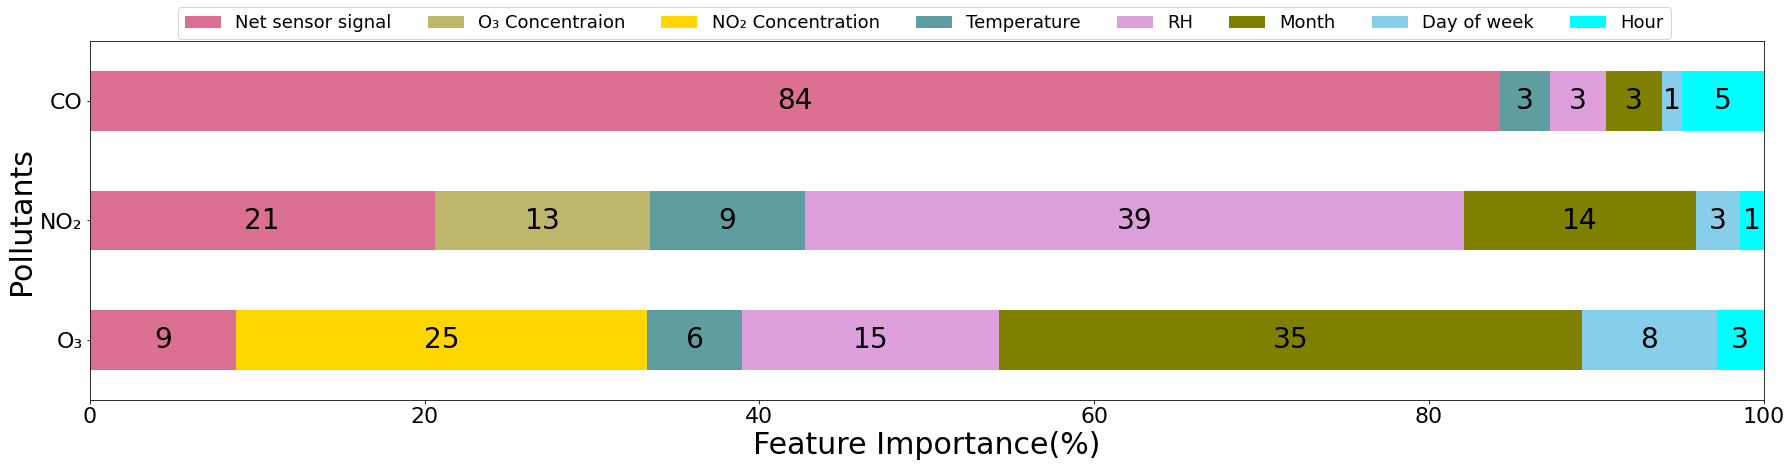

In [483]:
color=['palevioletred','darkkhaki','gold','cadetblue','plum','olive','skyblue','cyan']
ax= plt.figure(figsize=(10,5))
df.plot(
  x = 'pollutants', 
  kind = 'barh', 
  stacked = True,
  color=color,
    #Feature importance (%)  
  title = '',#(mean±0.7*std) 
  mark_right = True,
figsize=(30,6.6))
  
df_total = (df["Net sensor signal"] + df["Temperature"] + df["RH"]+df["Month"]+df["Day of week"]+df["Hour"]
            +df['O3 Concentraion'.translate(subscript)]+df['NO2 Concentration'.translate(subscript)])
df_rel = df[df.columns[1:]].div(df_total,0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        pc=np.round(pc)
        if pc>0:
            plt.text(cs - ab / 2, i, str(int(np.round(pc))) , 
                 va = 'center', ha = 'center', fontsize=28)
plt.legend( ncol=8, bbox_to_anchor = (0.95,1.12),fontsize=18)
plt.xlabel('Feature Importance(%)',fontsize=30)
plt.ylabel('Pollutants',fontsize=30)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlim(xmax=100)
plt.gca().invert_yaxis()
plt.show()

In [484]:
features_CO*100

array([84.25762799,  2.98438686,  3.32864234,  3.36381654,  1.16899513,
        4.89653113])

In [575]:
perc_SO2

array([21., 19., 17., 16., 11., 16.])

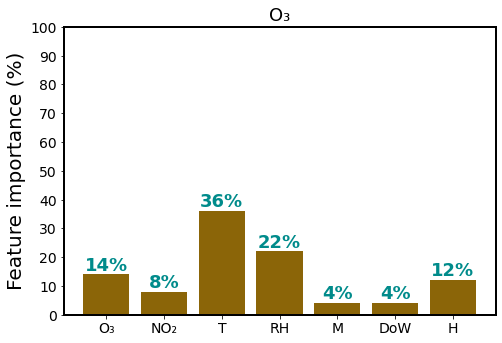

In [7]:
import numpy as np
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['O3'.translate(SUB),'NO2'.translate(SUB), 'T', 'RH', 'M', 'DoW','H']
students = [14,8,36,22,4,4,12]
graph=ax.bar(langs,students, color='#8B6508')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+1.5,
             str(students[i])+'%',
             ha='center',
             weight='bold',fontsize=18, color='#008B8B')
    i+=1
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,101, step=10))
plt.ylabel('Feature importance (%)', fontsize=20)
plt.setp(ax.spines.values(), linewidth=2)
plt.title('O3'.translate(SUB),fontsize=18)
plt.savefig("FI_O3.pdf", format="pdf", bbox_inches="tight")
plt.show()

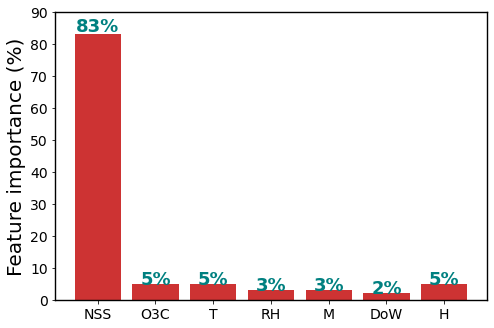

In [487]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['NSS','O3C', 'T', 'RH', 'M', 'DoW','H']
students =[83,5,5,3,3,2,5]
graph=ax.bar(langs,students, color='#CD3333')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(students[i])+'%',
             ha='center',
             weight='bold',fontsize=18, color='teal')
    i+=1
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,100, step=10))
plt.ylabel('Feature importance (%)', fontsize=20)
plt.setp(ax.spines.values(), linewidth=1.4)
#plt.title(r"$O_3$",fontsize=18)
plt.savefig("fig6b.pdf", format="pdf", bbox_inches="tight")
plt.show()

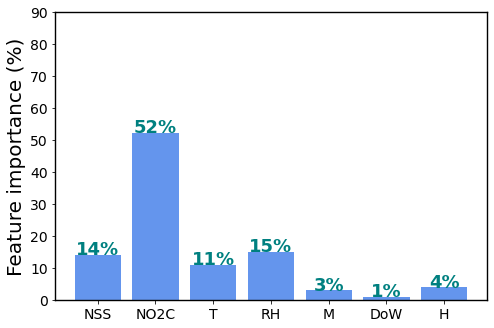

In [488]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['NSS','NO2C', 'T', 'RH', 'M', 'DoW','H']
students = [14,52,11,15,3,1,4]
graph=ax.bar(langs,students, color='#6495ED')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(students[i])+'%',
             ha='center',
             weight='bold',fontsize=18, color='teal')
    i+=1
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,100, step=10))
plt.ylabel('Feature importance (%)', fontsize=20)
plt.setp(ax.spines.values(), linewidth=1.4)
#plt.title(r"$O_3$",fontsize=18)
plt.savefig("fig6c.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [489]:
fi_so2=np.round(features_SO2,2)*100
fi_So2=[]
for  i in range(len(fi_so2)):
    fi_So2.append(int(fi_so2[i]))
fi_So2

[21, 19, 17, 16, 11, 16]

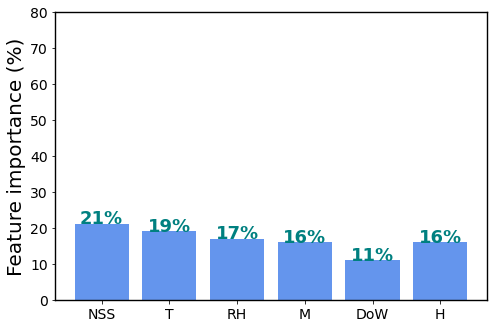

In [490]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['NSS', 'T', 'RH', 'M', 'DoW','H']
students = fi_So2
graph=ax.bar(langs,students, color='#6495ED')
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(students[i])+'%',
             ha='center',
             weight='bold',fontsize=18, color='teal')
    i+=1
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,90, step=10))
plt.ylabel('Feature importance (%)', fontsize=20)
plt.setp(ax.spines.values(), linewidth=1.4)
#plt.title(r"$O_3$",fontsize=18)
plt.savefig("fig6d.pdf", format="pdf", bbox_inches="tight")
plt.show()

Text(0.5, 1.0, 'CO')

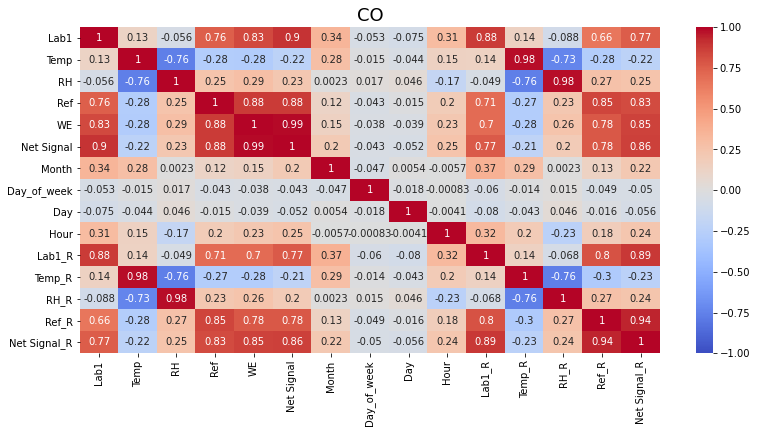

In [491]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(CO_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

Text(0.5, 1.0, 'CO')

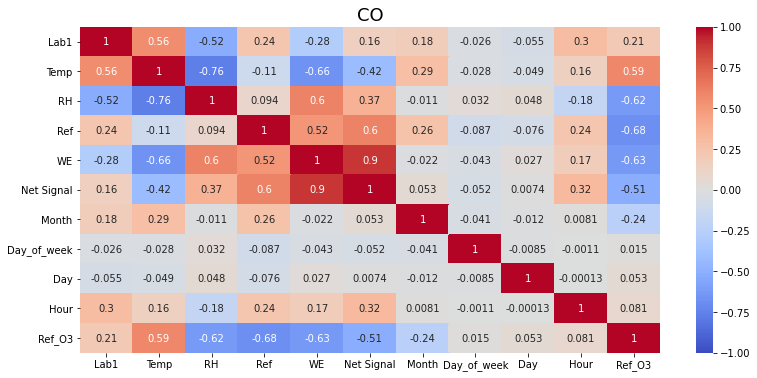

In [492]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(NO2_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

Text(0.5, 1.0, 'CO')

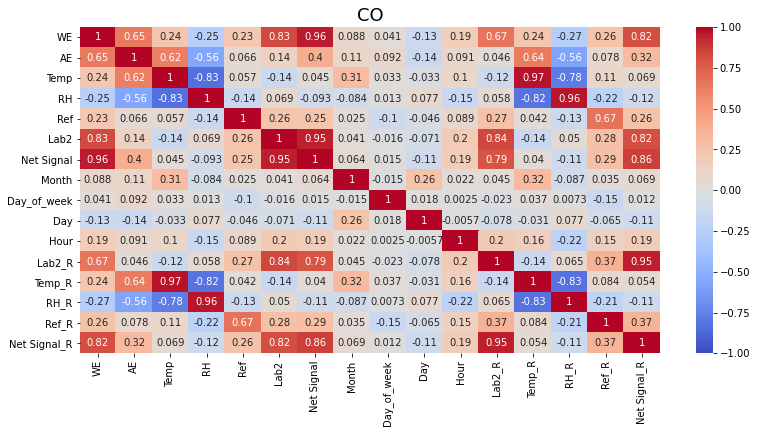

In [493]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(SO2_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

Text(0.5, 1.0, 'CO')

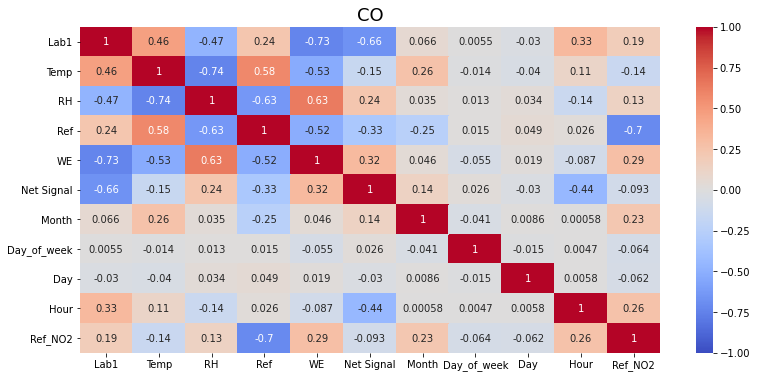

In [494]:
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.figure(figsize=(13,6))
sns.heatmap(O3_Data.corr(), annot = True, vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm')
plt.title('CO',fontsize=18)

# Cross Sensitivities

# NO2

In [495]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Pearson_NO2_inc=[0.89,0.92,0.97,0.96,0.96]
R2_NO2_inc=[0.79,0.84,0.94,0.92,0.92]
RMSE_NO2_inc=[5.7,5,3,3.5,3.6]

Pearson_NO2_Ninc=[0.67,0.79,0.95,0.93,0.91]
R2_NO2_Ninc=[0.45,0.62,0.9,0.86,0.83]
RMSE_NO2_Ninc=[9.4,7.8,4.1,4.7,5.3]


<function matplotlib.pyplot.legend(*args, **kwargs)>

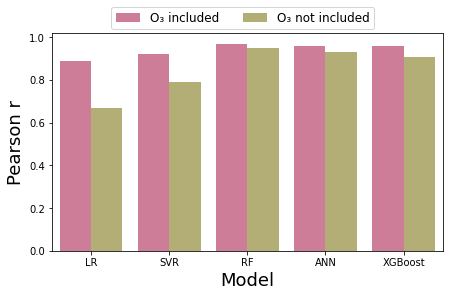

In [496]:
Pearson=Pearson_NO2_inc+Pearson_NO2_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],Pearson[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'Pearson r','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Pearson r", hue="Classification",data=df,palette=['palevioletred','darkkhaki'],
ci=None)
plt.legend(['O3 included'.translate(subscript), 'O3 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.15),fontsize=12)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('Pearson r',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

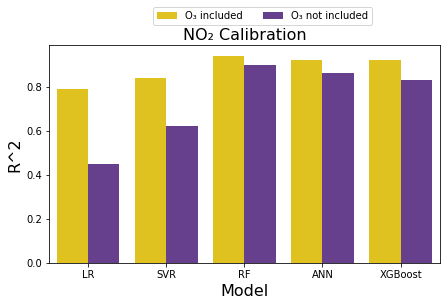

In [497]:
R2=R2_NO2_inc+R2_NO2_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],R2[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'R2','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="R2", hue="Classification",data=df,palette=['gold','rebeccapurple'],
ci=None)
plt.legend(['O3 included'.translate(subscript), 'O3 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.2),fontsize=10)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('R^2',fontsize=16)
plt.xlabel('Model',fontsize=16)
plt.title('NO2 Calibration'.translate(subscript),fontsize=16)
plt.legend

In [498]:
RS1=np.array(R2_NO2_inc)-np.array(R2_NO2_Ninc)
import plotly.graph_objs as go
model= ['<b>LR</b>', '<b>SVR</b>', '<b>RF</b>', '<b>ANN</b>', '<b>XGBoost</b>']
perc=RS1
data = [go.Bar(
   x = model,
   y =perc,
marker_color='#BDB76B')]

data2 = [go.Bar(
   x = model,
   y =perc,
marker_color='teal')]


fig = go.Figure(data=data)
fig = go.Figure(data=data2)

fig.update_layout(autosize=False,
    width=600,
    height=450)
fig.update_yaxes(title_text="<b>∆R^2</b>")
fig.show()

In [499]:
import plotly.graph_objects as px
import numpy
  
  
# creating random data through randomint 
# function of numpy.random 
np.random.seed(42)
  
random_x= np.random.randint(1,101,100) 
random_y= np.random.randint(1,101,100)
  
x =model
  
fig= px.Figure(data=[go.Bar(
    name = 'R^2',
    x = x,
    y =perc,
    marker_color='#BDB76B'
   ),
                       go.Bar(
    name = 'NRMSE',
    x = x,
    y = [0.21,0.17,0.09, 0.09,0.1],
    marker_color='teal'
   )
])

fig.update_layout(autosize=False,
    width=600,
    height=500,
    legend=dict( yanchor="bottom",
    y=0.8,
    x=0.7,
    
    orientation="v"
)              
                 )
fig.update_yaxes(title_text="<b>Improvement</b>")
                   
fig.show()


In [500]:
x = ['LR', 'SVR', 'RF', 'ANN', 'XGBoost']
y1=perc
y2=[0.21,0.17,0.09, 0.09,0.1]


In [501]:
y1

array([0.34, 0.22, 0.04, 0.06, 0.09])

[0.34 0.22 0.04 0.06 0.09]


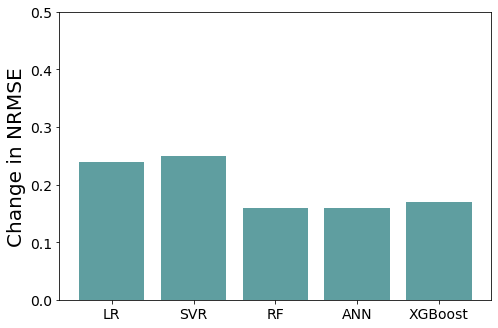

In [502]:
x = ['LR', 'SVR', 'RF', 'ANN', 'XGBoost']
y1=perc
print(y1)
y2=[0.24,0.25,0.16, 0.16,0.17]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = x
students = y2
graph=ax.bar(langs,students, color='#5F9EA0')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,0.6, step=0.1))
plt.ylabel('Change in NRMSE', fontsize=20)
#plt.title(r"$O_3$",fontsize=18)
plt.show()

In [503]:
A=np.mean(O3_Data['Ref'].to_list())
A

18.537916661697498

# importing package
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(9,5))  
# create data
x =np.arange(5)
width = 0.40
#y1=[0.21,0.17,0.09, 0.09,0.1]
#y2=[0.24,0.25,0.16, 0.16,0.17]
#y1=np.array(RMSE_O3_Ninc)/A
y2=Per
# plot data in grouped manner of bar type
plt.bar(x, y2, width, color='#E9967A')
#plt.bar(x+0.2, y2, width, color='#53868B')
plt.xticks(x, ['LR', 'SVR', 'RF', 'ANN', 'XGBoost'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,0.41, step=0.1))
plt.ylabel('Improvement in R^2', fontsize=20)
#plt.legend([r"$NO_2$"  +' not included',r"$NO_2$" +' included'], fontsize=16)
#plt.title(r"$O_3$",fontsize=18)
plt.show()

<function matplotlib.pyplot.legend(*args, **kwargs)>

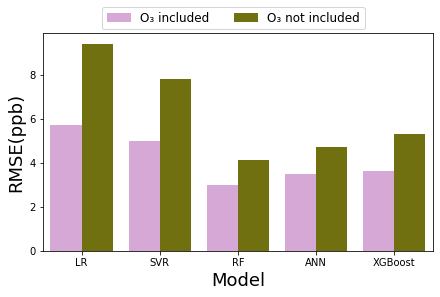

In [504]:
RMSE=RMSE_NO2_inc+RMSE_NO2_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],RMSE[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'RMSE','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="RMSE", hue="Classification",data=df,palette=['plum','olive'],
ci=None)
plt.legend(['O3 included'.translate(subscript), 'O3 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.15),fontsize=12)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('RMSE(ppb)',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.legend

# O3

In [505]:
Pearson_O3_inc=[0.94,0.94,0.99,0.99,0.98]
R2_O3_inc=[0.89,0.89,0.98,0.97,0.97]
RMSE_O3_inc=[5,5,2.2,2.6,2.8]

Pearson_O3_Ninc=[0.77,0.77,0.98,0.97,0.92]
R2_O3_Ninc=[0.59,0.59,0.95,0.93,0.85]
RMSE_O3_Ninc=[9.6,9.7,3.3,3.9,5.7]

<BarContainer object of 5 artists>

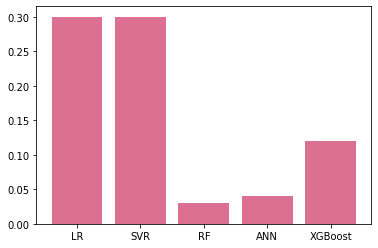

In [506]:
Per=(np.array(R2_O3_inc)-np.array(R2_O3_Ninc))
Model=['LR','SVR','RF','ANN','XGBoost']
plt.bar(Model,Per, color='palevioletred')


<function matplotlib.pyplot.legend(*args, **kwargs)>

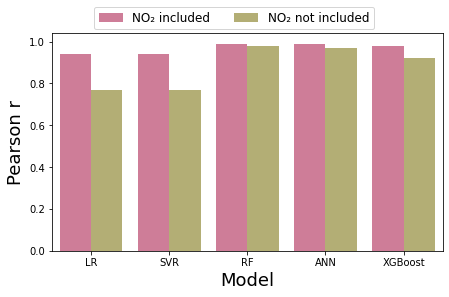

In [507]:
Pearson=Pearson_O3_inc+Pearson_O3_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],Pearson[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'Pearson r','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Pearson r", hue="Classification",data=df,palette=['palevioletred','darkkhaki'],
ci=None)
plt.legend(['NO2 included'.translate(subscript), 'NO2 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.15),fontsize=12)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('Pearson r',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

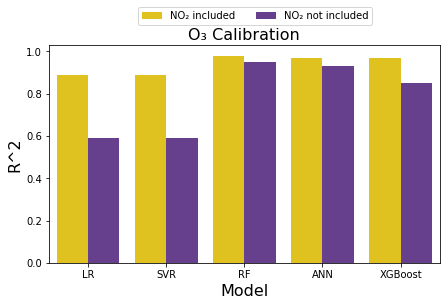

In [508]:
R2=R2_O3_inc+R2_O3_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],R2[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'R2','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="R2", hue="Classification",data=df,palette=['gold','rebeccapurple'],
ci=None)
plt.legend(['NO2 included'.translate(subscript), 'NO2 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.2),fontsize=10)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('R^2',fontsize=16)
plt.xlabel('Model',fontsize=16)
plt.title('O3 Calibration'.translate(subscript),fontsize=16)
plt.legend

In [509]:
RS2=np.array(R2_O3_inc)-np.array(R2_O3_Ninc)
import plotly.graph_objs as go
model= ['<b>LR</b>', '<b>SVR</b>', '<b>RF</b>', '<b>ANN</b>', '<b>XGBoost</b>']
perc=RS2
data = [go.Bar(
   x = model,
   y =perc,
marker_color='#BDB76B')]
fig = go.Figure(data=data)
fig.update_layout(autosize=False,
    width=600,
    height=450)
fig.update_yaxes(title_text="<b>ΔR^2</b>")
fig.show()

In [510]:
import plotly.graph_objects as px
import numpy
  
  
# creating random data through randomint 
# function of numpy.random 
np.random.seed(42)
  
random_x= np.random.randint(1,101,100) 
random_y= np.random.randint(1,101,100)
  
x =model
  
fig= px.Figure(data=[go.Bar(
    name = 'R^2',
    x = x,
    y =perc,
    marker_color='#BDB76B',
    showlegend=False
   ),
                       go.Bar(
    name = 'NRMSE',
    x = x,
    y = [0.24,0.25,0.16, 0.16,0.17],
    marker_color='teal',
    showlegend=False
   )
])

fig.update_layout(autosize=False,
    width=600,
    height=500,
    legend=dict( yanchor="bottom",
    y=0.8,
    x=0.7,
    
    orientation="v"
)              
                 )
fig.update_yaxes(title_text="<b>Improvement</b>")
                   
fig.show()

<function matplotlib.pyplot.legend(*args, **kwargs)>

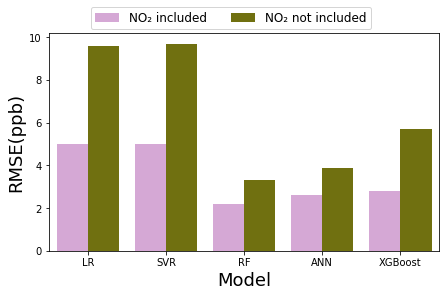

In [511]:
RMSE=RMSE_O3_inc+RMSE_O3_Ninc
Model=['LR','SVR','RF','ANN','XGBoost']
Models=Model+Model
Class1=['NO2 included' for i in range(5)]
Class2=['NO2 not included' for i in range(5)]
Classification=Class1+Class2
data=[[Models[i],RMSE[i],Classification[i] ] for i in range(len(Models))]
df=pd.DataFrame(data=data, columns=['Model', 'RMSE','Classification'])
#df=df.sample(frac=1)
#df.head()

fig= plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="RMSE", hue="Classification",data=df,palette=['plum','olive'],
ci=None)
plt.legend(['NO2 included'.translate(subscript), 'NO2 not included'.translate(subscript)],ncol = 4  , 
           bbox_to_anchor = (0.84,1.15),fontsize=12)
#plt.ylabel( 'Average ' + r'$O_{3}$' + ' Concentration (μg/m³)')
#plt.title('NO2 Calibration'.translate(subscript), fontsize=18)
plt.ylabel('RMSE(ppb)',fontsize=18)
plt.xlabel('Model',fontsize=18)
plt.legend

In [512]:
CO_Data.describe()

Lab1          Temp            RH           Ref            WE  \
count  44410.000000  44410.000000  44410.000000  44410.000000  44410.000000   
mean     429.943093     17.004471     67.824015    470.335330    478.858387   
std      261.601677      6.896313     17.598287    387.672973    126.689217   
min        1.791498      1.036051     17.250176      0.000000    256.788333   
25%      241.499252     11.616140     55.156370    224.056375    399.297016   
50%      358.867755     15.749574     72.635100    336.546475    435.427285   
75%      552.570855     21.292791     82.418383    562.578413    509.422103   
max     3109.716101     40.955089     92.803787   8111.000000    999.928219   

         Net Signal         Month   Day_of_week           Day          Hour  \
count  44410.000000  44410.000000  44410.000000  44410.000000  44410.000000   
mean     153.660032      6.774172      3.021189     16.424476     11.653321   
std      123.054562      4.450200      2.016176      8.181190      6.884547   
min        0.337479      1.000000      0.000000      1.000000      0.000000   
25%       72.331157      3.000000      1.000000     10.000000      6.000000   
50%      111.267265     10.000000      3.000000     17.000000     12.000000   
75%      185.960025     11.000000      5.000000     23.000000     18.000000   
max      845.380238     12.000000      6.000000     31.000000     23.000000   

             Lab1_R        Temp_R          RH_R         Ref_R  Net Signal_R  
count  44396.000000  44396.000000  44396.000000  44396.000000  44396.000000  
mean     429.857000     17.002562     67.824974    470.423656    153.643208  
std      240.763272      6.845525     17.451832    349.889164    112.280488  
min       27.781150      1.087357     17.387920      7.525452      8.863214  
25%      253.809716     11.650332     55.319878    238.880147     77.685435  
50%      366.113638     15.763740     72.575719    349.886162    115.585522  
75%      557.013507     21.237692     82.297588    569.555582    186.550180  
max     1494.153652     40.474471     92.732457   2345.594711    639.036521

In [513]:
from scipy.stats import fligner
from scipy import stats
from scipy.stats import ttest_rel
Sen=CO_Data['Lab1'].to_list()
Ref=CO_Data['Ref'].to_list()

In [514]:
ttest_rel(Ref,Sen)

Ttest_relResult(statistic=33.30004482849734, pvalue=3.536561431633842e-240)

In [515]:
stat, p = fligner(Sen,Ref)
p

7.989119807699815e-62

In [516]:
stats.ttest_ind(pred, y_test)

Ttest_indResult(statistic=0.42385264888375396, pvalue=0.6716896107204227)

In [517]:
stats.shapiro(Sen)
# Output: (0.9550848603248596, 0.7756242156028748)

stats.shapiro(Sen)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.8855657577514648, pvalue=0.0)

In [518]:
stats.levene(Sen, Ref)

LeveneResult(statistic=986.281459499516, pvalue=2.624142469302017e-215)

In [519]:
d=np.array(Sen)-np.array(Ref)

from scipy.stats import wilcoxon
w, p = wilcoxon(d)
w,p

(416579632.0, 2.3875195555034148e-176)

In [520]:
from scipy.stats import ttest_rel

# Python paired sample t-test


In [521]:
stats.shapiro(Sen)

ShapiroResult(statistic=0.8855657577514648, pvalue=0.0)

In [522]:
stats.shapiro(Ref)

ShapiroResult(statistic=0.7723101377487183, pvalue=0.0)

In [523]:
stats.ttest_rel(Sen,Ref)

Ttest_relResult(statistic=-33.30004482849734, pvalue=3.536561431633842e-240)

In [524]:
d=np.array(Sen)-np.array(Ref)
w, p = wilcoxon(d)
w,p

(416579632.0, 2.3875195555034148e-176)

import folium
# define the world map

mexico_latitude = 35.152
mexico_longitude =33.347786
# define the world map centered around Canada with a higher zoom level
mexico_map = folium.Map(location=[mexico_latitude, mexico_longitude],attr=False, tiles='mapquestopen',zoom_start=16, alpha=0)
# display world map
folium.Marker([35.153,33.347801],
   ).add_to(mexico_map)
mexico_map

In [525]:
# MDQ and  MPC

# NO2

 ### Constant  u_r

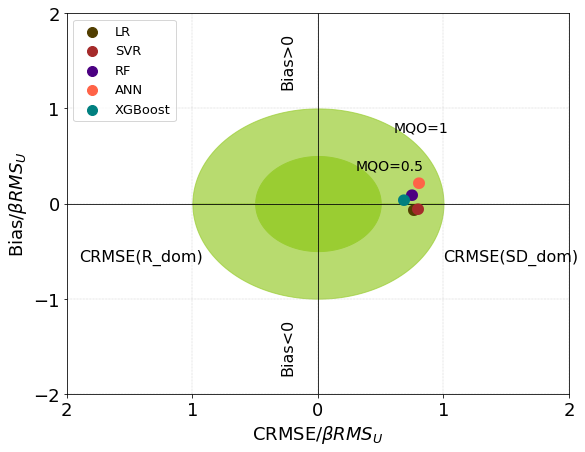

In [526]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 1
 
a = radius * np.cos( theta )
b = radius * np.sin( theta )

radius1=0.5

c = radius1 * np.cos( theta )
d = radius1 * np.sin( theta )

fig= plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
point1 = [0.2, 2]
point2 = [0.2, 2]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
#plt.text(CRMSE_LAB[0],MBE_LAB[0] , '•', rotation=90, va='center',fontsize = 40, color='#426eff')
Bias1_U_XGB_NO2**2+CRMSE1_U_XGB_NO2**2
plt.text(CRMSE_U_LR_NO2,Bias_U_LR_NO2 , '•', rotation=90, va='center',fontsize = 40, color='#513e00')
plt.text(CRMSE_U_SVR_NO2,Bias_U_SVR_NO2 , '•', rotation=90, va='center',fontsize = 40, color='brown')
plt.text(CRMSE_U_RF_NO2,Bias_U_RF_NO2 , '•', rotation=90, va='center',fontsize = 40, color='indigo')
plt.text(CRMSE_U_ANN_NO2,Bias_U_ANN_NO2 , '•', rotation=90, va='center',fontsize = 40, color='tomato')
plt.text(CRMSE_U_XGB_NO2,Bias_U_XGB_NO2 , '•', rotation=90, va='center',fontsize = 40, color='teal')
#plt.scatter(10,10,color='#426eff',s=100,alpha=1)
plt.scatter(10,10,color='#513e00',s=100)
plt.scatter(10,10,color='brown',s=100)
plt.scatter(10,10,color='indigo',s=100)
plt.scatter(10,10,color='tomato',s=100)
plt.scatter(10,10,color='teal',s=100)
plt.legend(['LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=13)
plt.plot(x_values, y_values, color='black')
plt.Circle((0, 0), 1, color='black', linewidth=10)
plt.Circle((0, 0), 1.1, fill=False, linewidth=2)
plt.vlines([0], -2, 2, color='black', linewidth=0.8)
plt.hlines([0], -2, 2, color='black', linewidth=0.8)
plt.plot(x_values, y_values, color='black')
plt.text(-1.9, -0.6, 'CRMSE(R_dom)', fontsize = 16, color='black')
plt.text(1, -0.6, 'CRMSE(SD_dom)', fontsize = 16, color='black')
plt.text(-0.3, -1.5, 'Bias<0', rotation=90, va='center',fontsize = 16, color='black')
plt.text(-0.3, 1.5, 'Bias>0', rotation=90, va='center',fontsize = 16, color='black')
plt.text(0.3, 0.4, 'MQO=0.5', rotation=0, va='center',fontsize = 14, color='black')
plt.text(0.6, 0.8, 'MQO=1', rotation=0, va='center',fontsize = 14, color='black')
plt.fill_between(c, d, color='yellowgreen', alpha=1)
plt.fill_between(a, b, color='yellowgreen', alpha=0.7)
plt.xlabel('CRMSE/'+r'$βRMS_{U}$',fontsize=18)
plt.ylabel('Bias/'+r'$βRMS_{U}$',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xticks(color='w')
plt.ylim([-2, 2])
plt.xlim([-2, 2])
ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([-2,-1,0,1,2])
ax.set_xticklabels(['2','1','0','1','2'])
#ax.plot([0, 1], [0, 1], transform=ax.transAxes)
#ax.plot([0, -1], [0, 1], transform=ax.transAxes)
#ax.plot(x_values, y_values, color='black')
#plt.yticks(color='w')
#plt.title('CO',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.savefig("MPC_NO2_C.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Variable U_r

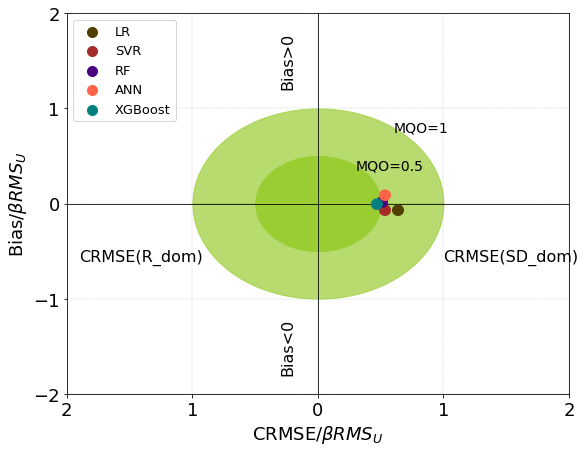

In [527]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 1
 
a = radius * np.cos( theta )
b = radius * np.sin( theta )

radius1=0.5

c = radius1 * np.cos( theta )
d = radius1 * np.sin( theta )

fig= plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
point1 = [0.2, 2]
point2 = [0.2, 2]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
#plt.text(CRMSE_LAB[0],MBE_LAB[0] , '•', rotation=90, va='center',fontsize = 40, color='#426eff')
Bias1_U_XGB_NO2**2+CRMSE1_U_XGB_NO2**2
plt.text(CRMSE1_U_LR_NO2,Bias1_U_LR_NO2 , '•', rotation=90, va='center',fontsize = 40, color='#513e00')
plt.text(CRMSE1_U_SVR_NO2,Bias1_U_SVR_NO2 , '•', rotation=90, va='center',fontsize = 40, color='brown')
plt.text(CRMSE1_U_RF_NO2,Bias1_U_RF_NO2 , '•', rotation=90, va='center',fontsize = 40, color='indigo')
plt.text(CRMSE1_U_ANN_NO2,Bias1_U_ANN_NO2 , '•', rotation=90, va='center',fontsize = 40, color='tomato')
plt.text(CRMSE1_U_XGB_NO2,Bias1_U_XGB_NO2 , '•', rotation=90, va='center',fontsize = 40, color='teal')
#plt.scatter(10,10,color='#426eff',s=100,alpha=1)
plt.scatter(10,10,color='#513e00',s=100)
plt.scatter(10,10,color='brown',s=100)
plt.scatter(10,10,color='indigo',s=100)
plt.scatter(10,10,color='tomato',s=100)
plt.scatter(10,10,color='teal',s=100)
plt.legend(['LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=13)
plt.plot(x_values, y_values, color='black')
plt.Circle((0, 0), 1, color='black', linewidth=10)
plt.Circle((0, 0), 1.1, fill=False, linewidth=2)
plt.vlines([0], -2, 2, color='black', linewidth=0.8)
plt.hlines([0], -2, 2, color='black', linewidth=0.8)
plt.plot(x_values, y_values, color='black')
plt.text(-1.9, -0.6, 'CRMSE(R_dom)', fontsize = 16, color='black')
plt.text(1, -0.6, 'CRMSE(SD_dom)', fontsize = 16, color='black')
plt.text(-0.3, -1.5, 'Bias<0', rotation=90, va='center',fontsize = 16, color='black')
plt.text(-0.3, 1.5, 'Bias>0', rotation=90, va='center',fontsize = 16, color='black')
plt.text(0.3, 0.4, 'MQO=0.5', rotation=0, va='center',fontsize = 14, color='black')
plt.text(0.6, 0.8, 'MQO=1', rotation=0, va='center',fontsize = 14, color='black')
plt.fill_between(c, d, color='yellowgreen', alpha=1)
plt.fill_between(a, b, color='yellowgreen', alpha=0.7)
plt.xlabel('CRMSE/'+r'$βRMS_{U}$',fontsize=18)
plt.ylabel('Bias/'+r'$βRMS_{U}$',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xticks(color='w')
plt.ylim([-2, 2])
plt.xlim([-2, 2])
ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([-2,-1,0,1,2])
ax.set_xticklabels(['2','1','0','1','2'])
#ax.plot([0, 1], [0, 1], transform=ax.transAxes)
#ax.plot([0, -1], [0, 1], transform=ax.transAxes)
#ax.plot(x_values, y_values, color='black')
#plt.yticks(color='w')
#plt.title('CO',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.savefig("MPC_NO2_V.pdf", format="pdf", bbox_inches="tight")
plt.show()

# O3

## Constant U_r

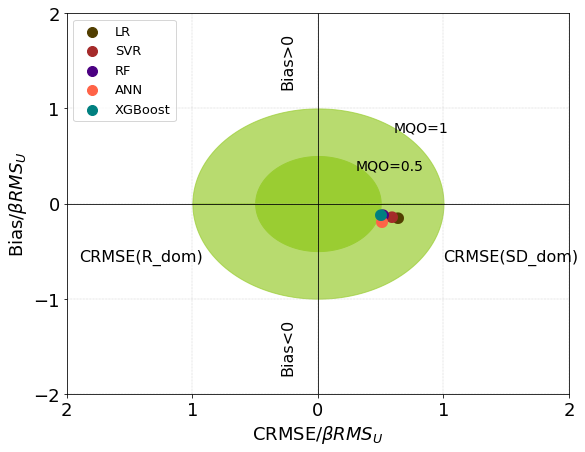

In [528]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 1
 
a = radius * np.cos( theta )
b = radius * np.sin( theta )

radius1=0.5

c = radius1 * np.cos( theta )
d = radius1 * np.sin( theta )

fig= plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
point1 = [0.2, 2]
point2 = [0.2, 2]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
#plt.text(CRMSE_LAB[0],MBE_LAB[0] , '•', rotation=90, va='center',fontsize = 40, color='#426eff')
plt.text(CRMSE_U_LR_O3,Bias_U_LR_O3 , '•', rotation=90, va='center',fontsize = 40, color='#513e00')
plt.text(CRMSE_U_SVR_O3,Bias_U_SVR_O3 , '•', rotation=90, va='center',fontsize = 40, color='brown')
plt.text(CRMSE_U_RF_O3,Bias_U_RF_O3 , '•', rotation=90, va='center',fontsize = 40, color='indigo')
plt.text(CRMSE_U_ANN_O3,Bias_U_ANN_O3 , '•', rotation=90, va='center',fontsize = 40, color='tomato')
plt.text(CRMSE_U_XGB_O3,Bias_U_XGB_O3 , '•', rotation=90, va='center',fontsize = 40, color='teal')
#plt.scatter(10,10,color='#426eff',s=100,alpha=1)
plt.scatter(10,10,color='#513e00',s=100)
plt.scatter(10,10,color='brown',s=100)
plt.scatter(10,10,color='indigo',s=100)
plt.scatter(10,10,color='tomato',s=100)
plt.scatter(10,10,color='teal',s=100)
plt.legend(['LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=13)
plt.plot(x_values, y_values, color='black')
plt.Circle((0, 0), 1, color='black', linewidth=10)
plt.Circle((0, 0), 1.1, fill=False, linewidth=2)
plt.vlines([0], -2, 2, color='black', linewidth=0.8)
plt.hlines([0], -2, 2, color='black', linewidth=0.8)
plt.plot(x_values, y_values, color='black')
plt.text(-1.9, -0.6, 'CRMSE(R_dom)', fontsize = 16, color='black')
plt.text(1, -0.6, 'CRMSE(SD_dom)', fontsize = 16, color='black')
plt.text(-0.3, -1.5, 'Bias<0', rotation=90, va='center',fontsize = 16, color='black')
plt.text(-0.3, 1.5, 'Bias>0', rotation=90, va='center',fontsize = 16, color='black')
plt.text(0.3, 0.4, 'MQO=0.5', rotation=0, va='center',fontsize = 14, color='black')
plt.text(0.6, 0.8, 'MQO=1', rotation=0, va='center',fontsize = 14, color='black')
plt.fill_between(c, d, color='yellowgreen', alpha=1)
plt.fill_between(a, b, color='yellowgreen', alpha=0.7)
plt.xlabel('CRMSE/'+r'$βRMS_{U}$',fontsize=18)
plt.ylabel('Bias/'+r'$βRMS_{U}$',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xticks(color='w')
plt.ylim([-2, 2])
plt.xlim([-2, 2])
ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([-2,-1,0,1,2])
ax.set_xticklabels(['2','1','0','1','2'])
#ax.plot([0, 1], [0, 1], transform=ax.transAxes)
#ax.plot([0, -1], [0, 1], transform=ax.transAxes)
#ax.plot(x_values, y_values, color='black')
#plt.yticks(color='w')
#plt.title('CO',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.savefig("MPC_O3_C.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Variable U_r 

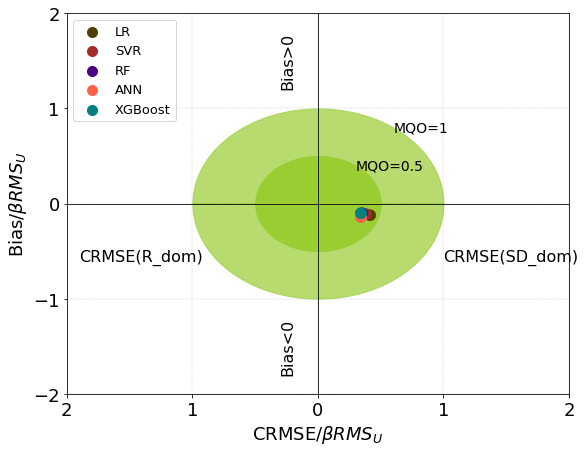

In [529]:
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 1
 
a = radius * np.cos( theta )
b = radius * np.sin( theta )

radius1=0.5

c = radius1 * np.cos( theta )
d = radius1 * np.sin( theta )

fig= plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
#ax.patch.set_facecolor('lightblue')
#ax.patch.set_alpha(0.3)
point1 = [0.2, 2]
point2 = [0.2, 2]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
#plt.text(CRMSE_LAB[0],MBE_LAB[0] , '•', rotation=90, va='center',fontsize = 40, color='#426eff')
plt.text(CRMSE1_U_LR_O3,Bias1_U_LR_O3 , '•', rotation=90, va='center',fontsize = 40, color='#513e00')
plt.text(CRMSE1_U_SVR_O3,Bias1_U_SVR_O3 , '•', rotation=90, va='center',fontsize = 40, color='brown')
plt.text(CRMSE1_U_RF_O3,Bias1_U_RF_O3 , '•', rotation=90, va='center',fontsize = 40, color='indigo')
plt.text(CRMSE1_U_ANN_O3,Bias1_U_ANN_O3 , '•', rotation=90, va='center',fontsize = 40, color='tomato')
plt.text(CRMSE1_U_XGB_O3,Bias1_U_XGB_O3 , '•', rotation=90, va='center',fontsize = 40, color='teal')
#plt.scatter(10,10,color='#426eff',s=100,alpha=1)
plt.scatter(10,10,color='#513e00',s=100)
plt.scatter(10,10,color='brown',s=100)
plt.scatter(10,10,color='indigo',s=100)
plt.scatter(10,10,color='tomato',s=100)
plt.scatter(10,10,color='teal',s=100)
plt.legend(['LR','SVR','RF','ANN','XGBoost'],loc = 2, bbox_to_anchor = (0,1), fontsize=13)
plt.plot(x_values, y_values, color='black')
plt.Circle((0, 0), 1, color='black', linewidth=10)
plt.Circle((0, 0), 1.1, fill=False, linewidth=2)
plt.vlines([0], -2, 2, color='black', linewidth=0.8)
plt.hlines([0], -2, 2, color='black', linewidth=0.8)
plt.plot(x_values, y_values, color='black')
plt.text(-1.9, -0.6, 'CRMSE(R_dom)', fontsize = 16, color='black')
plt.text(1, -0.6, 'CRMSE(SD_dom)', fontsize = 16, color='black')
plt.text(-0.3, -1.5, 'Bias<0', rotation=90, va='center',fontsize = 16, color='black')
plt.text(-0.3, 1.5, 'Bias>0', rotation=90, va='center',fontsize = 16, color='black')
plt.text(0.3, 0.4, 'MQO=0.5', rotation=0, va='center',fontsize = 14, color='black')
plt.text(0.6, 0.8, 'MQO=1', rotation=0, va='center',fontsize = 14, color='black')
plt.fill_between(c, d, color='yellowgreen', alpha=1)
plt.fill_between(a, b, color='yellowgreen', alpha=0.7)
plt.xlabel('CRMSE/'+r'$βRMS_{U}$',fontsize=18)
plt.ylabel('Bias/'+r'$βRMS_{U}$',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.xticks(color='w')
plt.ylim([-2, 2])
plt.xlim([-2, 2])
ax.set_xticks([-2,-1,0,1,2])
ax.set_yticks([-2,-1,0,1,2])
ax.set_xticklabels(['2','1','0','1','2'])
#ax.plot([0, 1], [0, 1], transform=ax.transAxes)
#ax.plot([0, -1], [0, 1], transform=ax.transAxes)
#ax.plot(x_values, y_values, color='black')
#plt.yticks(color='w')
#plt.title('CO',fontsize=18)
plt.grid(linestyle='-.',linewidth=0.3)
plt.savefig("MPC_O3_V.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [530]:
CO_Data.head()

Lab1       Temp         RH        Ref          WE  \
Date                                                                            
2019-10-02 12:15:00  2676.586421  25.765087  48.441408  170.30085  969.463967   
2019-10-02 12:20:00  1694.726608  26.120078  47.716553  140.82115  735.729752   
2019-10-02 15:45:00  2911.798418  30.418466  50.153181  247.17775  982.831716   
2019-10-03 15:50:00   555.780140  29.441429  52.018571  399.25210  488.950000   
2019-10-03 15:55:00   514.393544  29.401071  52.805119  284.54245  452.916857   

                     Net Signal  Month  Day_of_week  Day  Hour  Lab1_R  \
Date                                                                     
2019-10-02 12:15:00  817.534721   10.0          2.0  2.0  12.0     NaN   
2019-10-02 12:20:00  509.284536   10.0          2.0  2.0  12.0     NaN   
2019-10-02 15:45:00  845.380238   10.0          2.0  2.0  15.0     NaN   
2019-10-03 15:50:00  168.141429   10.0          3.0  3.0  15.0     NaN   
2019-10-03 15:55:00  136.740190   10.0          3.0  3.0  15.0     NaN   

                     Temp_R  RH_R  Ref_R  Net Signal_R  
Date                                                    
2019-10-02 12:15:00     NaN   NaN    NaN           NaN  
2019-10-02 12:20:00     NaN   NaN    NaN           NaN  
2019-10-02 15:45:00     NaN   NaN    NaN           NaN  
2019-10-03 15:50:00     NaN   NaN    NaN           NaN  
2019-10-03 15:55:00     NaN   NaN    NaN           NaN

# Tolerance

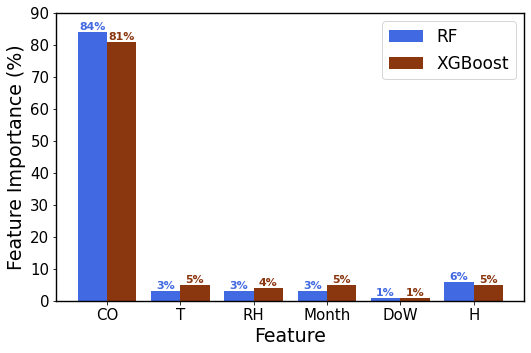

In [531]:
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(6.5,4))
ax = fig.add_axes([0,0,1,1])
x= ['NO2 conc.','T','RH','Month','DoW','H']
students1=[84,3,3,3,1,6]
students2=[81,5,4,5,1,5] 

x = np.arange(6)
wid= 0.4
graph1=ax.bar(x-0.2,students1,wid, color='#4169E1', alpha=1)
graph2=ax.bar(x+0.2,students2,wid, color='#8A360F', alpha=1)
plt.legend(['RF','XGBoost'],fontsize=17)
i= 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+0.7,
             str(students1[i])+'%',
             ha='center',
             weight='bold',fontsize=11, color='#4169E1', alpha=1)
    i+=1
i=0
for p in graph2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+0.7,
             str(students2[i])+'%',
             ha='center',
             weight='bold',fontsize=11, color='#8A360F', alpha=1)
    i+=1
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(['CO'.translate(subscript), 'T', 'RH', 'Month', 'DoW','H'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yticks(np.arange(0,91, step=10))
plt.xlabel('Feature', fontsize=19)
plt.ylabel('Feature Importance (%)', fontsize=19)
plt.setp(ax.spines.values(), linewidth=1.4)
#plt.title(r"$O_3$",fontsize=18)
plt.savefig("FI_CO.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [532]:
df

Model  RMSE    Classification
0       LR   5.0      NO2 included
1      SVR   5.0      NO2 included
2       RF   2.2      NO2 included
3      ANN   2.6      NO2 included
4  XGBoost   2.8      NO2 included
5       LR   9.6  NO2 not included
6      SVR   9.7  NO2 not included
7       RF   3.3  NO2 not included
8      ANN   3.9  NO2 not included
9  XGBoost   5.7  NO2 not included

<ipython-input-533-6a2e00bfcec2>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



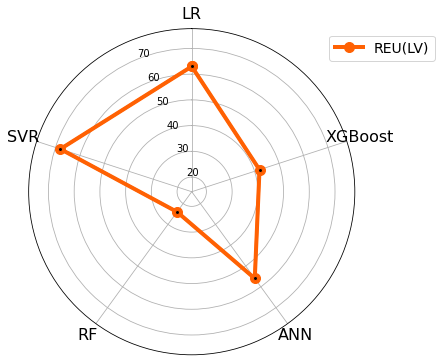

In [533]:
import matplotlib.pyplot as plt
import numpy as np
B=[63,68,24,56,42]
C=[40,24,6,13,11]

A=[[B[i]] for i in range (5)]
import pandas as pd

df= pd.DataFrame (A, columns=['Bias'])

def plot_polar(df, error_alpha=0):
    # add last row to complete cycle (otherwise plot lines don't connect)
    df = df.append(df.iloc[0, :])
    B=df['Bias'].to_list()
    #convert index to radians
    radians = np.linspace(0, 2 * np.pi, num=5, endpoint=False)
    df.index = [radians[day] for day in df.index]
    plt.figure(figsize=(6, 6))
    ax = plt.axes(polar=True)
    ax.set_theta_zero_location('N')
    # Set up labels
    ax.set_xticks(radians)
    ax.set_rticks([10,20,30,40,50,60,70])
    ax.set_rautorange=True
    ax.set_xticklabels([ 'LR', 'SVR', 'RF', 'ANN','XGBoost'], size=16)

    m1=df.plot(ax=ax,color=['#FF6103','#00CED1'], lw=4,marker="o",markersize=10,)
    m2=df.plot(ax=ax,color=['#FF6103','#00CED1'], lw=3,marker="o",markersize=4,markerfacecolor='black')#k'
    colors=['#00CED1' for i in range(5)]
    radii = 10 * np.random.rand(5)
    
    #ax.bar(radians, radii, width=width, bottom=0.0, color=colors, alpha=0.5)
    # need to lookup line color for shaded error region
    line_colors = {line.get_label(): line.get_color() for line in ax.get_lines()}
    def plot_errors(series):
        sem = series.sem()
        ax.fill_between(np.append(radians, 0), 
                        series - sem, series + sem,
                        color=line_colors[series.name], alpha=error_alpha)
    df.apply(plot_errors)
    ax.legend(['REU(LV)'],loc=2,bbox_to_anchor = (0.9,1), fontsize=14)
    #ax.get_legend().remove()
    ax.grid(True)
    #plt.text(0.43*np.pi,24 , '10')
    plt.savefig("BP_CO.pdf", format="pdf",bbox_inches="tight",dpi=1000)
plot_polar(df, error_alpha=0)

In [534]:
import plotly.graph_objects as go

fig = go.Figure(go.Barpolar(
    r=Bias_CO,
    theta= np.linspace(0, 360, num=6, endpoint=False),
    width=[20,20,20,20,20,20],
    marker_color=["#709BFF", '#709BFF', '#709BFF', '#709BFF', '#709BFF','#709BFF'],
    marker_line_color="black",
    marker_line_width=1.5,
    opacity=0.9
    
))

fig.update_layout(
    template=None,
    polar = dict(
        radialaxis = dict(range=[0,70], showticklabels=False,showgrid=False, ticks='',gridwidth=1.4),
        angularaxis = dict(showticklabels=False, ticks='',dtick=60,linewidth=1.5)
    )
)
fig.write_image("BP_CO1.pdf")
fig.show()



In [535]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
r, theta = np.mgrid[0.1:1:3j, 0:360:2j]
# %%
T = np.linspace(0,100,3)
#T=np.array([0,10,25,30,50,70])


color = np.ones(r.shape) * T[:,np.newaxis]
fig = go.Figure(go.Barpolar(
    r=r.ravel(),
    theta=theta.ravel(),
    marker_color=color.ravel(),
    marker={"showscale": True,
            "colorscale": px.colors.sequential.Blues  ,},
    opacity=0.4))



margin =10
fig.update_layout(
    showlegend=True,
    paper_bgcolor="white",
    plot_bgcolor='white',
    polar=dict(
        #radialaxis_layer="above traces",
        angularaxis_direction="clockwise",
        angularaxis_color="black",
        angularaxis_dtick=72,
        angularaxis_showgrid=True,
        radialaxis_showgrid=True,
        radialaxis_showline=False,
        angularaxis_gridcolor='black',
        angularaxis_gridwidth=1.5,
        radialaxis_tickvals=[],  # Radii ticks
        bargap=0,  # Ensure cells will touch
        hole=0,  # Center gap
    ),

)
fig.write_image("BP_CO3.pdf")
fig.show()

In [536]:
Bias_SO2

[73, 35.0, 39.0, 33.0, 37.0, 34.0]

In [537]:
T = np.linspace(0,60,7)
T

array([ 0., 10., 20., 30., 40., 50., 60.])

In [538]:
list(np.arange(0,5,1))

[0, 1, 2, 3, 4]

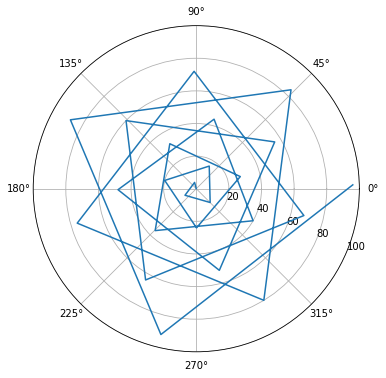

<Figure size 432x432 with 0 Axes>

In [539]:
import numpy as np
import matplotlib.pyplot as plt
import random


#r = np.arange(0, 2, 0.01)
r =[i*4 for i in range(25)]
ind=(np.array([i for i in range(25)])/25)*2
theta = 2 * np.pi * ind
theta= np.linspace(0, 360, num=25, endpoint=False)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(6, 6))
plt.figure(figsize=(6, 6))
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([20,40,60,80,100])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
#ax.set_xticklabels(['10%', '20%', '30%', '40%', '50%','60%', '70%', '80%'], size=16)
ax.grid(True)

#ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [540]:
import plotly.graph_objects as go
import plotly.offline as pyo


categories = ['Tc=20%', 'Tc=40%', 'Tc=60%', 'Tc=80%', 'Tc=100%']
categories = [*categories, categories[0]]

restaurant_1 = [40,24,16,13,11]
restaurant_2 = [40,29,22,18,15]
restaurant_3 = [3, 4, 5, 3, 5]
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=restaurant_2, theta=categories, fill='toself', name='Restaurant 2',fillcolor='#FF7F50'),
        go.Scatterpolar(r=restaurant_1, theta=categories, fill='toself', name='Restaurant 1',fillcolor='#00CED1')
        
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Restaurant comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True,
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)'
    )
)

#pyo.plot(fig)
fig.show()

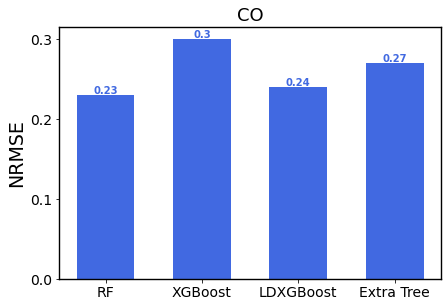

In [541]:
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(5.3,3.5))
ax = fig.add_axes([0,0,1,1])
x= ['RF', 'XGBoost', 'LDXGBoost', 'Extra Tree']
students1=[0.23,0.3,0.24,0.27]

x = np.arange(4)
wid=0.6
graph1=ax.bar(x,students1,wid, color='#4169E1', alpha=1)
#plt.legend(['15min','60min'],title='Data resolution')
i= 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+0.002,
             str(students1[i]),
             ha='center',
             weight='bold',fontsize=10, color='#4169E1', alpha=1)
    i+=1

ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['RF', 'XGBoost', 'LDXGBoost', 'Extra Tree'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,0.31, step=0.1))
#plt.xlabel('Tolerance,Tc (%)', fontsize=19)
plt.ylabel('NRMSE', fontsize=19)
plt.setp(ax.spines.values(), linewidth=1.4)
plt.title("CO",fontsize=18)
plt.savefig("CO_NRMSE.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [542]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
r, theta = np.mgrid[0.1:1:8j, 0:360:2j]
# %%
T = np.linspace(0,100,8)
#T=np.array([0,10,25,30,50,70])


color = np.ones(r.shape) * T[:,np.newaxis]
fig = go.Figure(go.Barpolar(
    r=r.ravel(),
    theta=theta.ravel(),
    marker_color=color.ravel(),
    marker={"showscale": True,
            "colorscale": px.colors.sequential.Oranges   ,},
    opacity=0.5)
               
               
               )



margin =10
fig.update_layout(
    showlegend=True,
    paper_bgcolor="white",
    plot_bgcolor='white',
    polar=dict(
        #radialaxis_layer="above traces",
        angularaxis_direction="clockwise",
        angularaxis_color="black",
        angularaxis_dtick=60,
        angularaxis_showgrid=True,
        radialaxis_showgrid=True,
        radialaxis_showline=False,
        angularaxis_gridcolor='black',
        angularaxis_gridwidth=1.5,
        radialaxis_tickvals=[],  # Radii ticks
        bargap=0,  # Ensure cells will touch
        hole=0,  # Center gap
    ),

)
fig.write_image("BP_CO3_OPC.pdf")
fig.show()

<ipython-input-543-be59dbd92817>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



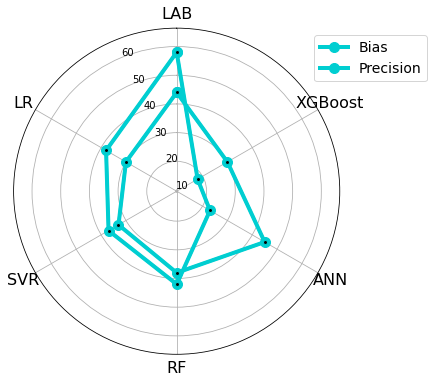

In [543]:
import matplotlib.pyplot as plt
import numpy as np
B=[58,38,37,42,23,18]
C=[44,30,33,38,45,30]

A=[[B[i],C[i]] for i in range (6)]
import pandas as pd

df= pd.DataFrame (A, columns=['Bias','precision'])

def plot_polar(df, error_alpha=0):
    # add last row to complete cycle (otherwise plot lines don't connect)
    df = df.append(df.iloc[0, :])
    B=df['Bias'].to_list()
    #convert index to radians
    radians = np.linspace(0, 2 * np.pi, num=6, endpoint=False)
    df.index = [radians[day] for day in df.index]
    plt.figure(figsize=(6, 6))
    ax = plt.axes(polar=True)
    ax.set_theta_zero_location('N')
    # Set up labels
    ax.set_xticks(radians)
    ax.set_rticks([10,20,30,40,50,60,70])
    ax.set_rautorange=True
    ax.set_xticklabels(['LAB', 'LR', 'SVR', 'RF', 'ANN','XGBoost'], size=16)

    m1=df.plot(ax=ax,color=['#00CED1','#00CED1'], lw=4,marker="o",markersize=10,)
    m2=df.plot(ax=ax,color=['#00CED1','#00CED1'], lw=3,marker="o",markersize=4,markerfacecolor='black')#k'
    colors=['#00CED1' for i in range(5)]
    radii = 10 * np.random.rand(5)
    
    #ax.bar(radians, radii, width=width, bottom=0.0, color=colors, alpha=0.5)
    # need to lookup line color for shaded error region
    line_colors = {line.get_label(): line.get_color() for line in ax.get_lines()}
    def plot_errors(series):
        sem = series.sem()
        ax.fill_between(np.append(radians, 0), 
                        series - sem, series + sem,
                        color=line_colors[series.name], alpha=error_alpha)
    df.apply(plot_errors)
    ax.legend(['Bias','Precision'],loc=2,bbox_to_anchor = (0.9,1), fontsize=14)
    #ax.get_legend().remove()
    ax.grid(True)
    #plt.text(0.43*np.pi,24 , '10')
    plt.savefig("BP_CO_OPC.pdf", format="pdf",bbox_inches="tight",dpi=1000)
plot_polar(df, error_alpha=0)